![TP](../TeachersPro-logo-color.png)

# Interviews Analytics - Topic Modeling

### Lenin Escobar <lenin.escobar@net.teacherspro.com> - Descriptive analytics (06-February-2022)

In [1]:
%config IPCompleter.greedy=True
%load_ext memory_profiler
%matplotlib inline
%run InterviewAnalysisHelper.ipynb
%run InterviewAnalysisGeneralHelper.ipynb
%run InterviewAnalysisPlot.ipynb

/opt/conda/envs/py39/lib/python3.9/site-packages/google/colab/data_table.py:30: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils import traitlets as _traitlets
/opt/conda/envs/py39/lib/python3.9/site-packages/plotly/graph_objs/__init__.py:287: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ipywidgets.__version__) >= LooseVersion("7.0.0"):
/opt/conda/envs/py39/lib/python3.9/site-packages/plotly/graph_objs/__init__.py:287: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ipywidgets.__version__) >= LooseVersion("7.0.0"):
/opt/conda/envs/py39/lib/python3.9/site-packages/plotly/graph_objs/__init__.py:287: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ipywidgets.__version__) >= LooseVersion("7.0.0"):
/opt/conda/envs/py39/lib/python3.9/site-packages/plo

In [2]:
#import pyLDAvis
#print(pyLDAvis.__version__)

In [3]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
#import os
#print (os.environ['CONDA_DEFAULT_ENV'])

In [5]:
#import pyparsing
#pyparsing.__version__

In [6]:
#import spacy
#print(spacy.__version__)

In [7]:
#import sys
#print(sys.version)

<h1 style="background-color:#D7F5FF;font-size:300%;">What is topic modeling?</h1>
<p>In machine learning and natural language processing, a topic model is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents.</p>
<p>The topics found, being abstract, should be named according to the context of the analysis.</p>
<p>All the text documents combined is known as the corpus.</p>
<p>Let's assume we have 10 articles, each of them written in 200 words and we decided to identify 5 topics then each article belongs to each topic by percentage of similarity.</p>

<h1 style="background-color:#D7F5FF;font-size:300%;">Loading excel file</h1>

In [8]:
data_ori = pd.read_excel(r"data/Escalae_research.xlsx", sheet_name="Preguntas", header=0)

In [9]:
data_ori.head(5)

PAÍS Nombre de tu entidad educativa.  \
0  Costa Rica              COLEGIO METODISTA    
1  Costa Rica              COLEGIO METODISTA    
2  Costa Rica               Colegio Metodista   
3  Costa Rica               Colegio Metodista   
4  Costa Rica               COLEGIO METODISTA   

  Tipo de cargo en la entidad educativa:  \
0           Miembro del equipo directivo   
1           Miembro del equipo directivo   
2                       Docente Primaria   
3                       Docente Primaria   
4                       Docente Primaria   

  8. En qué momentos he aprendido más durante el último año, en relación con el flujo de trabajo seguido para la transformación.  \
0  Se transformó. Aprendimos a operar en forma vi...                                                                               
1  Se transformó. Aprendimos a operar en forma vi...                                                                               
2                 Llevo cursos de forma individual.                                                                                
3                                                NaN                                                                               
4  CUANDO HAY REUNIONES EN DONDE SE COMPARTE LAS ...                                                                               

  13. ¿Cuál es la razón o razones de tu respuesta anterior?  \
0  La capacidad técnica de los facilitadores (com...          
1  La capacidad técnica de los facilitadores (com...          
2                               Todas las anteriores          
3      La cantidad de trabajo realizado (intensidad)          
4      La cantidad de trabajo realizado (intensidad)          

  14. Respecto al proceso de transformación educativa, ¿qué objetivos se deberían tener presentes para el próximo curso?  \
0                  Consolidar metodologías activas.                                                                        
1                  Consolidar metodologías activas.                                                                        
2  Dejar de pensar que los docentes no están capa...                                                                       
3                                                NaN                                                                       
4  AQUELLOS QUE CONLLEVEN A MEJORAR LA TRANSFORMA...                                                                       

  15. Respecto al proceso de transformación educativa, ¿qué mejorarías o cambiarías para el próximo curso?  \
0                      Incrementar la investigación                                                          
1                      Incrementar la investigación                                                          
2  La capacitación, está no debe ser impuesta al ...                                                         
3                                                NaN                                                         
4  ALGUNAS DE LAS TÉCNICAS QUE EN ALGÚN MOMENTO S...                                                         

  16. ¿Cómo emplearás lo que has aprendido en el proceso de transformación en CPA para el próximo curso?  
0  La aplicación de lo que se aprende es el mayor...                                                      
1  La aplicación de lo que se aprende es el mayor...                                                      
2                               No tengo respuesta.                                                       
3                                                NaN                                                      
4  COMBINANDO UNA O DOS TÉCNICAS QUE FACILITEN EL...

In [10]:
data_mod = data_ori.copy()

<h1 style="background-color:#D7F5FF;font-size:300%;">Formatting the original data source</h1>

<h3 style="background-color:#D7F5FF;font-size:300%;">Let's rename the columns</h3>

In [11]:
data_mod.columns

Index(['PAÍS', 'Nombre de tu entidad educativa.',
       'Tipo de cargo en la entidad educativa:',
       '8. En qué momentos he aprendido más durante el último año, en relación con el flujo de trabajo seguido para la transformación.',
       '13. ¿Cuál es la razón o razones de tu respuesta anterior?',
       '14. Respecto al proceso de transformación educativa, ¿qué objetivos se deberían tener presentes para el próximo curso?',
       '15. Respecto al proceso de transformación educativa, ¿qué mejorarías o cambiarías para el próximo curso?',
       '16. ¿Cómo emplearás lo que has aprendido en el proceso de transformación en CPA para el próximo curso?'],
      dtype='object')

In [12]:
data_mod = data_mod.rename(columns={"PAÍS": "Country", "Nombre de tu entidad educativa.": "Educational_Entity"
                        , "Tipo de cargo en la entidad educativa:": "Educational_Entity_Type"
                        , "8. En qué momentos he aprendido más durante el último año, en relación con el flujo de trabajo seguido para la transformación.": "Question_8"
                        , "13. ¿Cuál es la razón o razones de tu respuesta anterior?": "Question_13"
                        , "14. Respecto al proceso de transformación educativa, ¿qué objetivos se deberían tener presentes para el próximo curso?": "Question_14"
                        , "15. Respecto al proceso de transformación educativa, ¿qué mejorarías o cambiarías para el próximo curso?": "Question_15"
                        , "16. ¿Cómo emplearás lo que has aprendido en el proceso de transformación en CPA para el próximo curso?": "Question_16"})

In [13]:
data_mod.dtypes

Country                    object
Educational_Entity         object
Educational_Entity_Type    object
Question_8                 object
Question_13                object
Question_14                object
Question_15                object
Question_16                object
dtype: object

In [14]:
#data_mod.astype({'Country': 'string', 'Educational_Entity': 'string'
#                           ,'Educational_Entity_Type': 'string', 'Question_8': 'string'
#                           ,'Question_13': 'string', 'Question_14': 'string'
#                           ,'Question_15': 'string', 'Question_16': 'string'}).dtypes

In [15]:
data_types_dict = {'Country': 'string', 'Educational_Entity': 'string'
                           ,'Educational_Entity_Type': 'string', 'Question_8': 'string'
                           ,'Question_13': 'string', 'Question_14': 'string'
                           ,'Question_15': 'string', 'Question_16': 'string'}

In [16]:
data_mod = data_mod.astype(data_types_dict)

In [17]:
data_mod.dtypes

Country                    string
Educational_Entity         string
Educational_Entity_Type    string
Question_8                 string
Question_13                string
Question_14                string
Question_15                string
Question_16                string
dtype: object

In [18]:
cleaningHelper = CleaningHelper(version = "1.0")
print(cleaningHelper)

Cleaning helper version 1.0


In [19]:
data_mod = data_mod.replace('nan', np.nan)

In [20]:
data_mod

Country               Educational_Entity  \
0     Costa Rica               COLEGIO METODISTA    
1     Costa Rica               COLEGIO METODISTA    
2     Costa Rica                Colegio Metodista   
3     Costa Rica                Colegio Metodista   
4     Costa Rica                COLEGIO METODISTA   
...          ...                              ...   
1917        Perú  Divino maestro chatito la arena   
1918        Perú                   Los Educadores   
1919        Perú             I.E. LEÓN XIII-CIRCA   
1920        Perú            I.E Salvador Lavalle.   
1921        Perú                    Simón Bolívar   

                Educational_Entity_Type  \
0          Miembro del equipo directivo   
1          Miembro del equipo directivo   
2                      Docente Primaria   
3                      Docente Primaria   
4                      Docente Primaria   
...                                 ...   
1917  Docente Secundaria / Bachillerato   
1918       Miembro del equipo directivo   
1919  Docente Secundaria / Bachillerato   
1920  Docente Secundaria / Bachillerato   
1921       Miembro del equipo directivo   

                                             Question_8  \
0     Se transformó. Aprendimos a operar en forma vi...   
1     Se transformó. Aprendimos a operar en forma vi...   
2                    Llevo cursos de forma individual.    
3                                                  <NA>   
4     CUANDO HAY REUNIONES EN DONDE SE COMPARTE LAS ...   
...                                                 ...   
1917                                               <NA>   
1918  Desde que empezamos aplicar las estrategias fo...   
1919                                            Siempre   
1920  en las interacciones que se dan mediante las r...   
1921                                       Últimos años   

                                            Question_13  \
0     La capacidad técnica de los facilitadores (com...   
1     La capacidad técnica de los facilitadores (com...   
2                                  Todas las anteriores   
3         La cantidad de trabajo realizado (intensidad)   
4         La cantidad de trabajo realizado (intensidad)   
...                                                 ...   
1917  La calidad general del trabajo realizado (acor...   
1918  La aplicabilidad de lo recibido en nuestra ent...   
1919                                               <NA>   
1920  La calidad general del trabajo realizado (acor...   
1921              Los materiales y contenidos recibidos   

                                            Question_14  \
0                     Consolidar metodologías activas.    
1                     Consolidar metodologías activas.    
2     Dejar de pensar que los docentes no están capa...   
3                                                  <NA>   
4     AQUELLOS QUE CONLLEVEN A MEJORAR LA TRANSFORMA...   
...                                                 ...   
1917                           De inveztigacion escolar   
1918  Fortalecer en los docentes la capacidad de bri...   
1919  La practica reflexiva en función a optimizar l...   
1920  seguir reforzando la relaciòn entre  colegas y...   
1921  La evaluación y retroalimentación con ejemplos...   

                                            Question_15  \
0                         Incrementar la investigación    
1                         Incrementar la investigación    
2     La capacitación, está no debe ser impuesta al ...   
3                                                  <NA>   
4     ALGUNAS DE LAS TÉCNICAS QUE EN ALGÚN MOMENTO S...   
...                                                 ...   
1917                  Los retos de educacon en el s.xxi   
1918                  La cantidad de trabajo realizado.   
1919  Organizar los tiempos para las coordinaciones ...   
1920  ir mejorando las capacidades de liderazgo en t...   
1921     Que los temas sean de interés de los docentes    

                   

In [21]:
#There should be no null
cleaningHelper.get_nulls_data(data_mod)

Total  PercNotNull
Question_8                 292        84.81
Question_16                235        87.77
Question_15                225        88.29
Question_14                203        89.44
Question_13                 31        98.39
Country                      0       100.00
Educational_Entity           0       100.00
Educational_Entity_Type      0       100.00

<h1 style="background-color:powderblue;">Raw Data Plotting</h1>

In [22]:
plottingHelper = PlottingHelper(version = "1.0")
plottingHelper._df_cat = data_mod
#print(plottingHelper)

In [23]:
#HTML('<script src="https://cdn.plot.ly/plotly-latest.min.js"></script>')
#widget = widgets.IntSlider()
#display(widget)
#ipywidgets.interactive_output(plottingHelper.func_count_cat_plotty, \
#                x_var_size=ipywidgets.IntSlider(layout={'border': '1px solid black'}, min=1, max=100, value=10, step=1, description="Num.Records"), \
#                x_var = ipywidgets.Dropdown(layout={'border': '1px solid black'}, options=["Question_8","Question_16","Question_15","Question_14", \
#                                                                                           "Question_13","Country","Educational_Entity","Educational_Entity_Type"], description="Feature"), \
#                x_var_asc = ipywidgets.Checkbox(layout={'border': '1px solid black'}, value=False, description="Asc. Order"), \
#                ax_title = ipywidgets.Textarea(layout={'border': '1px solid black'}, value="Data by Feature", description="Title") \
#               );

In [24]:
#ui_IntSlider = ipywidgets.IntSlider(layout={'border': '1px solid black'}, min=1, max=100, value=10, step=1, description="Num.Records")
#ui_Dropdown = ipywidgets.Dropdown(layout={'border': '1px solid black'}, options=["Question_8","Question_16","Question_15","Question_14", \
#                                                                                           "Question_13","Country","Educational_Entity","Educational_Entity_Type"], description="Feature")
#ui_Checkbox = ipywidgets.Checkbox(layout={'border': '1px solid black'}, value=False, description="Asc. Order")
#ui_Textarea = ipywidgets.Textarea(layout={'border': '1px solid black'}, value="Data by Feature", description="Title")
#ui_HBox = ipywidgets.HBox([ui_IntSlider, ui_Dropdown, ui_Checkbox, ui_Textarea])

#ui_out = ipywidgets.interactive_output(plottingHelper.func_count_cat_plotty, {'x_var_size': ui_IntSlider, 'x_var': ui_Dropdown, 'x_var_asc': ui_Checkbox, 'ax_title': ui_Textarea})

#display(ui_HBox, ui_out)


<h1 style="background-color:powderblue;">Data cleaning - Initializing</h1>

In [25]:
#!python -m spacy download en_core_web_lg

In [26]:
#import pyparsing
#pyparsing.__version__

In [27]:
#!python -m spacy download es_core_news_lg

In [28]:
#I decided to use the largest one
spacy_lg = spacy.load('es_core_news_lg')

In [29]:
# sets of punctuation in variable result 
punctuation_str = string.punctuation  
punctuation_str #I want to know if @ is actually include

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
#Stop words Set
#stop_words = spacy.lang.en.stop_words.STOP_WORDS
stop_words = cleaningHelper.get_custom_stop_words(spacy_ = spacy_lg)

In [31]:
#English parser object
parser = spacy.lang.es.Spanish()

In [32]:
cleaningCorpus = CleaningCorpus(version = "1.0", spacy_ = spacy_lg, parser_ = parser, punctuation_str_ = punctuation_str, stop_words_ = stop_words)
print(cleaningCorpus)

Cleaning Tweets version 1.0


<h1 style="background-color:powderblue;">Data cleaning - By column</h1>

<h3 style="background-color:powderblue;">Preparing - Question 8</h3>

In [33]:
data_mod_tmp_8 = data_mod[['Question_8']].copy()
data_mod_tmp_8 = data_mod_tmp_8.dropna()
df_doc_tokens_8 = cleaningCorpus.get_words_df(df_proc = data_mod_tmp_8, df_proc_col = "Question_8")

In [34]:
df_doc_tokens_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5336 entries, 0 to 5335
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   token_  5336 non-null   object
dtypes: object(1)
memory usage: 41.8+ KB


In [35]:
#df_doc_tokens_8

In [36]:
#df_doc_tokens_8.groupby(['token_']).token_.value_counts().nlargest(5)

In [37]:
#Top 10 tokens
df_doc_tokens_grp_8 = df_doc_tokens_8[['token_']].groupby(['token_'])['token_'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(10)
df_doc_tokens_grp_8

token_  count
213     colegiado    287
998       reunión    180
390       docente    110
93    aprendizaje    110
140           año    103
89       aprender     94
167  capacitación     92
484    estudiante     88
803           par     87
506   experiencia     85

In [38]:
ls_doc_tokens_8 = cleaningCorpus.get_words_list(df_Tweets_ = df_doc_tokens_8)
#ls_doc_tokens_8

In [39]:
word_freq_8 = collections.Counter(ls_doc_tokens_8)
#word_freq.most_common(10)

In [40]:
df_word_freq_8 = pd.DataFrame.from_dict(word_freq_8, orient='index').reset_index()
df_word_freq_8 = df_word_freq_8.rename(columns={'index':'word', 0:'count'})
df_word_freq_8.nlargest(10,['count'])

word  count
532     colegiado    287
16        reunión    180
13    aprendizaje    110
51        docente    110
87            año    103
1        aprender     94
72   capacitación     92
60     estudiante     88
373           par     87
85    experiencia     85

<h3 style="background-color:powderblue;">Word Cloud - Question 8</h3>

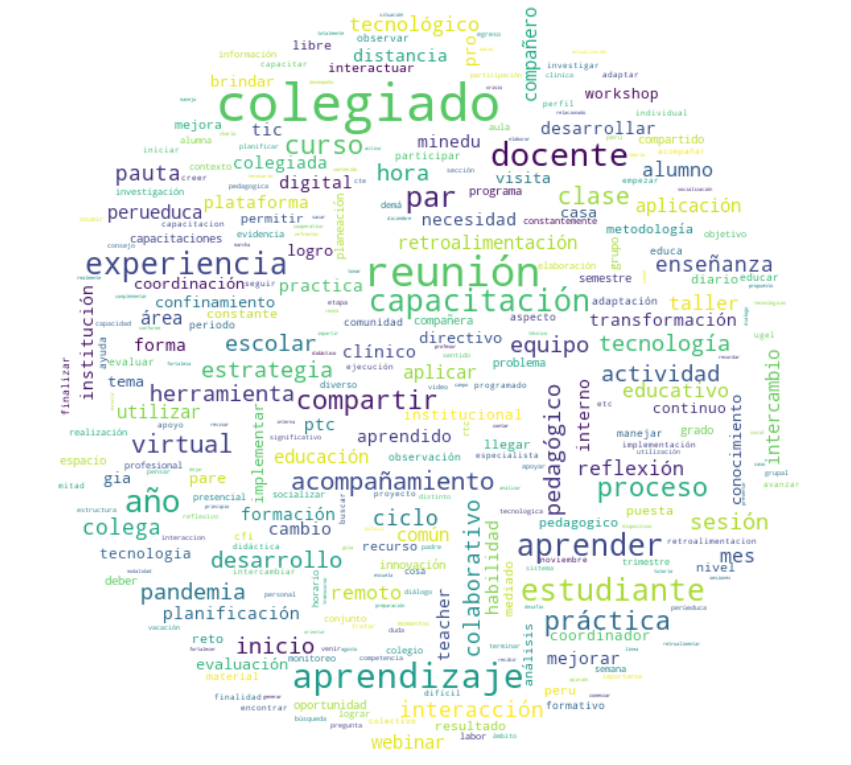

In [41]:
#Instantiate mask
char_mask = np.array(Image.open("circle.png")) 
#Instantiate the wordcloud object
wc = wordcloud.WordCloud(background_color='white', max_words=300, stopwords=stop_words, collocations=False, max_font_size=40, random_state=42, mask=char_mask)
# Generate word cloud
wc=wc.generate(" ".join(ls_doc_tokens_8).lower())
# Show word cloud
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<h3 style="background-color:powderblue;">Preparing - Question 13</h3>

In [42]:
data_mod_tmp_13 = data_mod[['Question_13']].copy()
data_mod_tmp_13 = data_mod_tmp_13.dropna()
df_doc_tokens_13 = cleaningCorpus.get_words_df(df_proc = data_mod_tmp_13, df_proc_col = "Question_13")

In [43]:
df_doc_tokens_13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15826 entries, 0 to 15825
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   token_  15826 non-null  object
dtypes: object(1)
memory usage: 123.8+ KB


In [44]:
#df_doc_tokens_8

In [45]:
#df_doc_tokens_8.groupby(['token_']).token_.value_counts().nlargest(5)

In [46]:
#Top 10 tokens
df_doc_tokens_grp_13 = df_doc_tokens_13[['token_']].groupby(['token_'])['token_'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(10)
#df_doc_tokens_grp_13

token_  count
203  tecnológico    778
108  herramienta    778
168   plataforma    777
30       calidad    703
5         acorde    703
156      pactado    703
183     recibido    700
188    resultado    628
143  metodología    627
174   producción    627

In [47]:
ls_doc_tokens_13 = cleaningCorpus.get_words_list(df_Tweets_ = df_doc_tokens_13)
#ls_doc_tokens_13

In [48]:
word_freq_13 = collections.Counter(ls_doc_tokens_13)
#word_freq.most_common(10)

In [49]:
df_word_freq_13 = pd.DataFrame.from_dict(word_freq_13, orient='index').reset_index()
df_word_freq_13 = df_word_freq_13.rename(columns={'index':'word', 0:'count'})
df_word_freq_13.nlargest(10,['count'])

word  count
532     colegiado    287
16        reunión    180
13    aprendizaje    110
51        docente    110
87            año    103
1        aprender     94
72   capacitación     92
60     estudiante     88
373           par     87
85    experiencia     85

<h3 style="background-color:powderblue;">Word Cloud - Question 13</h3>

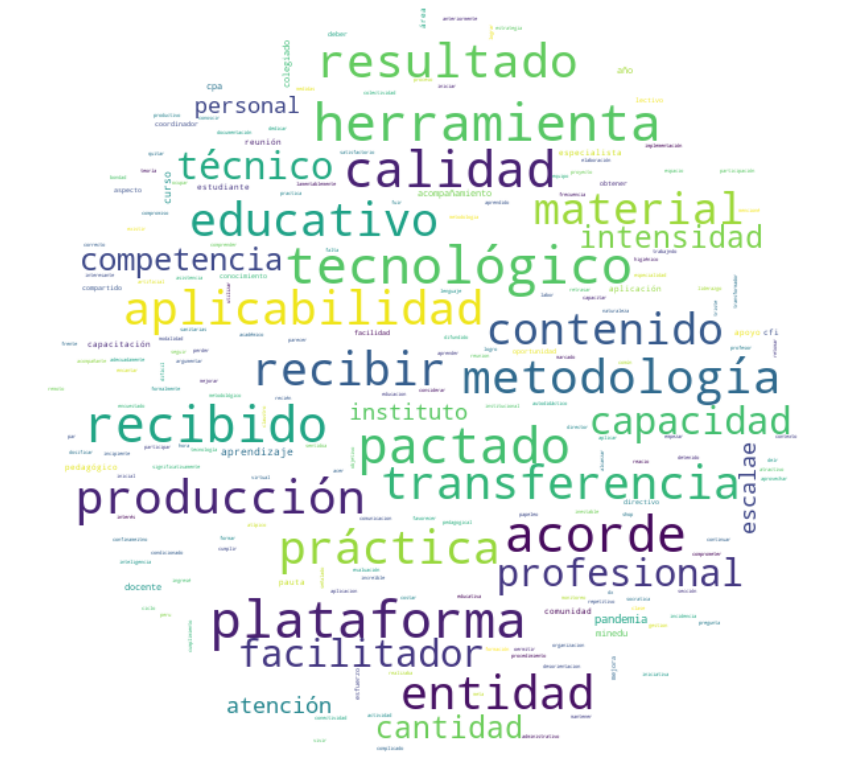

In [50]:
#Instantiate mask
char_mask = np.array(Image.open("circle.png")) 
#Instantiate the wordcloud object
wc = wordcloud.WordCloud(background_color='white', max_words=300, stopwords=stop_words, collocations=False, max_font_size=40, random_state=42, mask=char_mask)
# Generate word cloud
wc=wc.generate(" ".join(ls_doc_tokens_13).lower())
# Show word cloud
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<h3 style="background-color:powderblue;">Preparing - Question 14</h3>

In [51]:
data_mod_tmp_14 = data_mod[['Question_14']].copy()
data_mod_tmp_14 = data_mod_tmp_14.dropna()
df_doc_tokens_14 = cleaningCorpus.get_words_df(df_proc = data_mod_tmp_14, df_proc_col = "Question_14")

In [52]:
df_doc_tokens_14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7053 entries, 0 to 7052
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   token_  7053 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [53]:
#df_doc_tokens_14

In [54]:
#df_doc_tokens_14.groupby(['token_']).token_.value_counts().nlargest(5)

In [55]:
#Top 10 tokens
df_doc_tokens_grp_14 = df_doc_tokens_14[['token_']].groupby(['token_'])['token_'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(10)
#df_doc_tokens_grp_14

token_  count
549        docente    209
143    aprendizaje    175
698     estudiante    167
1010       mejorar    146
578      educativo    139
1409        seguir    102
822    herramienta     85
687     estrategia     82
236   capacitación     81
712     evaluación     80

In [56]:
ls_doc_tokens_14 = cleaningCorpus.get_words_list(df_Tweets_ = df_doc_tokens_14)
#ls_doc_tokens_14

In [57]:
word_freq_14 = collections.Counter(ls_doc_tokens_14)
#word_freq_14.most_common(10)

In [58]:
df_word_freq_14 = pd.DataFrame.from_dict(word_freq_14, orient='index').reset_index()
df_word_freq_14 = df_word_freq_14.rename(columns={'index':'word', 0:'count'})
df_word_freq_14.nlargest(10,['count'])

word  count
5         docente    209
44    aprendizaje    175
50     estudiante    167
13        mejorar    146
48      educativo    139
114        seguir    102
75    herramienta     85
288    estrategia     82
28   capacitación     81
19     evaluación     80

<h3 style="background-color:powderblue;">Word Cloud - Question 14</h3>

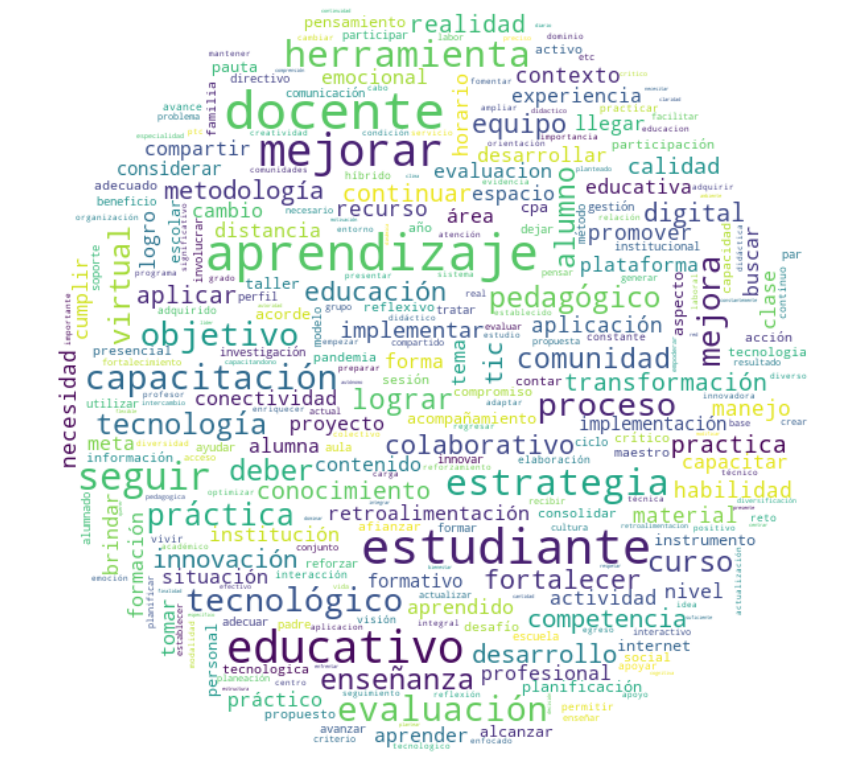

In [59]:
#Instantiate mask
char_mask = np.array(Image.open("circle.png")) 
#Instantiate the wordcloud object
wc = wordcloud.WordCloud(background_color='white', max_words=300, stopwords=stop_words, collocations=False, max_font_size=40, random_state=42, mask=char_mask)
# Generate word cloud
wc=wc.generate(" ".join(ls_doc_tokens_14).lower())
# Show word cloud
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<h3 style="background-color:powderblue;">Preparing - Question 15</h3>

In [60]:
data_mod_tmp_15 = data_mod[['Question_15']].copy()
data_mod_tmp_15 = data_mod_tmp_15.dropna()
df_doc_tokens_15 = cleaningCorpus.get_words_df(df_proc = data_mod_tmp_15, df_proc_col = "Question_15")

In [61]:
df_doc_tokens_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   token_  6012 non-null   object
dtypes: object(1)
memory usage: 47.1+ KB


In [62]:
#df_doc_tokens_15

In [63]:
#df_doc_tokens_15.groupby(['token_']).token_.value_counts().nlargest(5)

In [64]:
#Top 10 tokens
df_doc_tokens_grp_15 = df_doc_tokens_15[['token_']].groupby(['token_'])['token_'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(10)
#df_doc_tokens_grp_15

token_  count
1000       mejorar    175
527        docente    136
661     estudiante    110
128    aprendizaje    105
652     estrategia     86
400          curso     79
208   capacitación     67
792    herramienta     60
1258       proceso     59
1422        seguir     57

In [65]:
ls_doc_tokens_15 = cleaningCorpus.get_words_list(df_Tweets_ = df_doc_tokens_15)
#ls_doc_tokens_15

In [66]:
word_freq_15 = collections.Counter(ls_doc_tokens_15)
#word_freq_15.most_common(10)

In [67]:
df_word_freq_15 = pd.DataFrame.from_dict(word_freq_15, orient='index').reset_index()
df_word_freq_15 = df_word_freq_15.rename(columns={'index':'word', 0:'count'})
df_word_freq_15.nlargest(10,['count'])

word  count
102       mejorar    175
5         docente    136
24     estudiante    110
47    aprendizaje    105
339    estrategia     86
13          curso     79
2    capacitación     67
49    herramienta     60
72        proceso     59
136        seguir     57

<h3 style="background-color:powderblue;">Word Cloud - Question 15</h3>

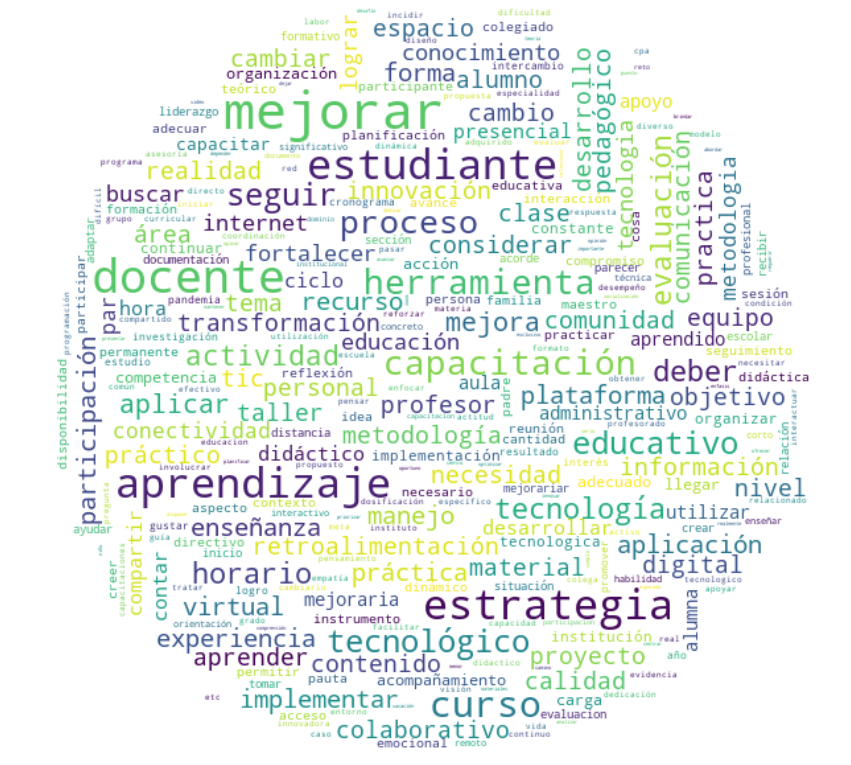

In [68]:
#Instantiate mask
char_mask = np.array(Image.open("circle.png")) 
#Instantiate the wordcloud object
wc = wordcloud.WordCloud(background_color='white', max_words=300, stopwords=stop_words, collocations=False, max_font_size=40, random_state=42, mask=char_mask)
# Generate word cloud
wc=wc.generate(" ".join(ls_doc_tokens_15).lower())
# Show word cloud
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<h3 style="background-color:powderblue;">Preparing - Question 16</h3>

In [70]:
data_mod_tmp_16 = data_mod[['Question_16']].copy()
data_mod_tmp_16 = data_mod_tmp_16.dropna()
df_doc_tokens_16 = cleaningCorpus.get_words_df(df_proc = data_mod_tmp_16, df_proc_col = "Question_16")

In [71]:
df_doc_tokens_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6252 entries, 0 to 6251
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   token_  6252 non-null   object
dtypes: object(1)
memory usage: 49.0+ KB


In [ ]:
#df_doc_tokens_16

In [ ]:
#df_doc_tokens_16.groupby(['token_']).token_.value_counts().nlargest(5)

In [72]:
#Top 10 tokens
df_doc_tokens_grp_16 = df_doc_tokens_16[['token_']].groupby(['token_'])['token_'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(10)
#df_doc_tokens_grp_16

token_  count
584    estudiante    268
129   aprendizaje    251
1129     práctica    200
104       aplicar    141
459       docente    121
870       mejorar    121
126     aprendido    119
1064     practica    117
1094      proceso     99
999    pedagógico     97

In [73]:
ls_doc_tokens_16 = cleaningCorpus.get_words_list(df_Tweets_ = df_doc_tokens_16)
#ls_doc_tokens_16

In [74]:
word_freq_16 = collections.Counter(ls_doc_tokens_16)
#word_freq_16.most_common(10)

In [75]:
df_word_freq_16 = pd.DataFrame.from_dict(word_freq_16, orient='index').reset_index()
df_word_freq_16 = df_word_freq_16.rename(columns={'index':'word', 0:'count'})
df_word_freq_16.nlargest(10,['count'])

word  count
27    estudiante    268
46   aprendizaje    251
79      práctica    200
68       aplicar    141
80       docente    121
121      mejorar    121
119    aprendido    119
208     practica    117
66       proceso     99
222   pedagógico     97

<h3 style="background-color:powderblue;">Word Cloud - Question 16</h3>

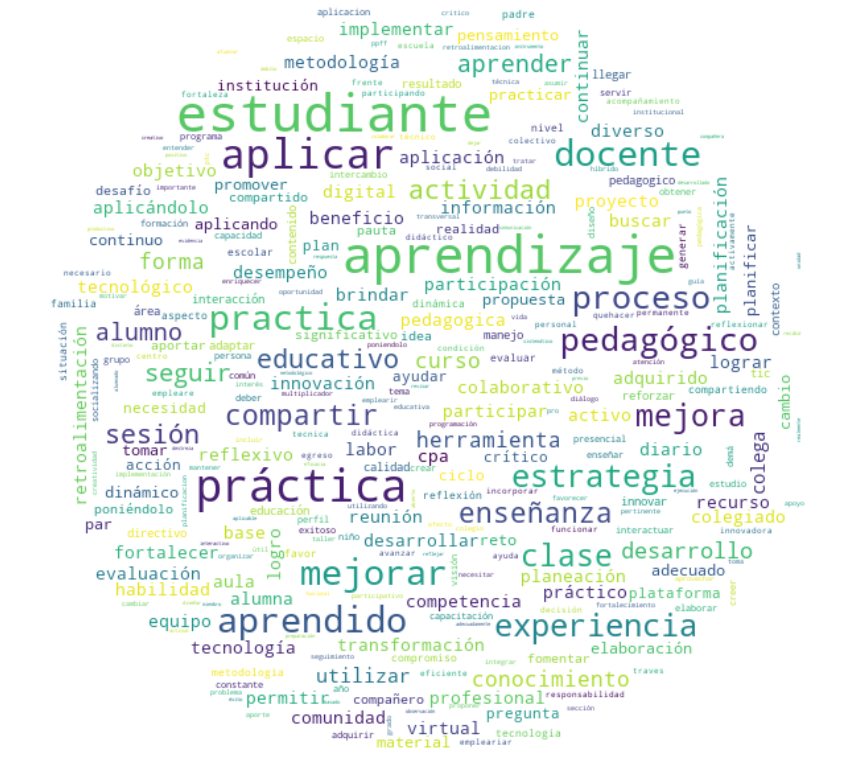

In [76]:
#Instantiate mask
char_mask = np.array(Image.open("circle.png")) 
#Instantiate the wordcloud object
wc = wordcloud.WordCloud(background_color='white', max_words=300, stopwords=stop_words, collocations=False, max_font_size=40, random_state=42, mask=char_mask)
# Generate word cloud
wc=wc.generate(" ".join(ls_doc_tokens_16).lower())
# Show word cloud
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<h1 style="background-color:powderblue;">Topic-modelling</h1>

<h3 style="background-color:powderblue;">Appending - Questions</h3>

In [117]:
data_mod_tmp_8_total = data_mod_tmp_8.rename(columns={'Question_8':'Answer'})
data_mod_tmp_13_total = data_mod_tmp_13.rename(columns={'Question_13':'Answer'})
data_mod_tmp_14_total = data_mod_tmp_14.rename(columns={'Question_14':'Answer'})
data_mod_tmp_15_total = data_mod_tmp_15.rename(columns={'Question_15':'Answer'})
data_mod_tmp_16_total = data_mod_tmp_16.rename(columns={'Question_16':'Answer'})

In [118]:
#len(data_mod_tmp_8_total) + len(data_mod_tmp_13_total) + len(data_mod_tmp_14_total) + len(data_mod_tmp_15_total) + len(data_mod_tmp_16_total)

In [119]:
data_mod_tmp_total = data_mod_tmp_8_total.append(data_mod_tmp_13_total, ignore_index=True)
data_mod_tmp_total = data_mod_tmp_total.append(data_mod_tmp_14_total, ignore_index=True)
data_mod_tmp_total = data_mod_tmp_total.append(data_mod_tmp_15_total, ignore_index=True)
data_mod_tmp_total = data_mod_tmp_total.append(data_mod_tmp_16_total, ignore_index=True)

In [120]:
data_mod_tmp_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8624 entries, 0 to 8623
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Answer  8624 non-null   string
dtypes: string(1)
memory usage: 67.5 KB


In [123]:
data_mod_tmp_total.head(3)

Answer  \
0  Se transformó. Aprendimos a operar en forma vi...   
1  Se transformó. Aprendimos a operar en forma vi...   
2                 Llevo cursos de forma individual.    

                                processed_Answer_str  
0  transformar aprender operar forma virtual enco...  
1  transformar aprender operar forma virtual enco...  
2                             curso forma individual

In [122]:
tqdm.pandas()
data_mod_tmp_total["processed_Answer_str"] = data_mod_tmp_total["Answer"].apply(cleaningCorpus.get_token_list)

In [124]:
data_mod_tmp_total.head(3)

Answer  \
0  Se transformó. Aprendimos a operar en forma vi...   
1  Se transformó. Aprendimos a operar en forma vi...   
2                 Llevo cursos de forma individual.    

                                processed_Answer_str  
0  transformar aprender operar forma virtual enco...  
1  transformar aprender operar forma virtual enco...  
2                             curso forma individual

In [125]:
#Count Vectorizer
#countVectorizer = CountVectorizer(min_df=0.02)
countVectorizer = CountVectorizer()
countVectorizerData = countVectorizer.fit_transform(data_mod_tmp_total["processed_Answer_str"])
print(type(countVectorizer))

<class 'sklearn.feature_extraction.text.CountVectorizer'>


In [ ]:
#print(countVectorizer.get_feature_names())

In [ ]:
#print(countVectorizerData.toarray())

In [126]:
#TF-IDF
vectorizer = TfidfVectorizer(
    #min_df=0.1, 
    #max_df=1.0, 
    stop_words=stop_words, lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
#data_vectorized = vectorizer.fit_transform(corpus)
data_vectorized = vectorizer.fit_transform(data_mod_tmp_total["processed_Answer_str"])
print(vectorizer.get_feature_names())

['----', '-----', '-------', '-aplicaci', '-aprendizaje', '-empleando', '-estimular', '-incidir', '-reflexivo', 'abierto', 'abordado', 'abordar', 'abril', 'abrir', 'absolviendo', 'abundante', 'acabar', 'acad', 'academia', 'academico', 'academicos', 'acampamiento', 'acceder', 'accesibilidad', 'accesibl', 'accesible', 'accesibles', 'acceso', 'acci', 'accion', 'aceleradamente', 'acelerar', 'aceptable', 'aceptar', 'acer', 'acerc', 'acerca', 'acercamiento', 'acercar', 'acertadamente', 'acertiva', 'acertivo', 'acierto', 'aclarar', 'acogida', 'acompa', 'acon', 'aconsejar', 'acordado', 'acorde', 'actitud', 'actitudes', 'activaci', 'activamente', 'activar', 'activdad', 'activiades', 'actividad', 'actividadds', 'actividades', 'actividadespropuesta', 'activitad', 'activitats', 'activo', 'acto', 'actor', 'actual', 'actualidad', 'actualiz', 'actualizaci', 'actualizacion', 'actualizado', 'actualizandome', 'actualizandose', 'actualizar', 'actuar', 'acumular', 'acurdo', 'adapt', 'adaptable', 'adaptaci

/opt/conda/envs/py39/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['adem', 'adi', 'afirm', 'agreg', 'alg', 'anta', 'aqu', 'asegur', 'available', 'balancing', 'com', 'coment', 'consider', 'coverage', 'dej', 'dem', 'despu', 'detr', 'est', 'explic', 'expres', 'freely', 'hab', 'habr', 'html', 'http', 'indic', 'inform', 'lextek', 'list', 'lla', 'llas', 'lleg', 'llos', 'ltima', 'ltimas', 'ltimo', 'ltimos', 'manifest', 'manuals', 'mencion', 'nde', 'ndo', 'nes', 'ning', 'nta', 'ntas', 'nto', 'ntos', 'onix', 'podr', 'qued', 'qui', 'quiz', 'realiz', 'sas', 'seg', 'size', 'sos', 'sta', 'stas', 'ste', 'stopword', 'stopwords', 'stos', 'tambi', 'ten', 'tendr', 'todav', 'trav', 'txt', 'www', 'ximo', 'ximos'] not in stop_words.



In [127]:
print(len(vectorizer.get_feature_names()))

3212


In [ ]:
#vectorizer.get_feature_names()

In [128]:
data_vectorized.shape

(8624, 3212)

In [129]:
data_vectorized.shape[0]

8624

In [130]:
type(data_vectorized)

scipy.sparse._csr.csr_matrix

In [131]:
data_vectorized.shape

(8624, 3212)

In [132]:
print(data_vectorized.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [133]:
data_vectorized_csc = data_vectorized.tocsc(copy=False)

In [134]:
#print(data_vectorized_csc)

In [135]:
data_vectorized_csc.shape

(8624, 3212)

In [136]:
NUM_TOPICS = 10
NUM_PASSES = 5

In [ ]:
#####################
#Working with gensim#
#####################

In [ ]:
#data_mod_tmp_total["processed_Answer_str"]

In [139]:
data_mod_tmp_total["processed_Answer_str_tokens"] = data_mod_tmp_total["processed_Answer_str"].apply(cleaningCorpus.get_tokens)

In [140]:
data_mod_tmp_total["processed_Answer_str_tokens"]

0       [transformar, aprender, operar, forma, virtual...
1       [transformar, aprender, operar, forma, virtual...
2                              [curso, forma, individual]
3       [reunión, comparte, experiencias, adquiridas, ...
4                          [puesta, práctica, tecnología]
                              ...                        
8619                                         [sula, niño]
8620           [compartir, aprendido, reunión, colegiado]
8621    [aplicar, práctica, pedagógíca, logro, aprendi...
8622    [establecer, comunicaciòn, màs, ameno, padre, ...
8623                      [utilizar, ejecutar, aprendido]
Name: processed_Answer_str_tokens, Length: 8624, dtype: object

In [141]:
id2word = Dictionary(data_mod_tmp_total["processed_Answer_str_tokens"])
print(len(id2word))

INFO - 19:36:13: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 19:36:13: built Dictionary(3436 unique tokens: ['activo', 'aprender', 'aprendizaje', 'conjunto', 'didáctica']...) from 8624 documents (total 40731 corpus positions)
INFO - 19:36:13: Dictionary lifecycle event {'msg': "built Dictionary(3436 unique tokens: ['activo', 'aprender', 'aprendizaje', 'conjunto', 'didáctica']...) from 8624 documents (total 40731 corpus positions)", 'datetime': '2022-02-13T19:36:13.583003', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-glibc2.31', 'event': 'created'}


3436


In [142]:
# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.99)
print(len(id2word))

INFO - 19:36:17: discarding 1896 tokens: [('adquiridas', 1), ('comparte', 1), ('conversación', 1), ('particularmente', 1), ('tutora', 1), ('siteo', 1), ('liceo', 1), ('enriquecedor', 1), ('experto', 1), ('multiedad', 1)]...
INFO - 19:36:17: keeping 1540 tokens which were in no less than 2 and no more than 8537 (=99.0%) documents
INFO - 19:36:17: resulting dictionary: Dictionary(1540 unique tokens: ['activo', 'aprender', 'aprendizaje', 'conjunto', 'didáctica']...)


1540


In [143]:
# Creating a corpus object 
corpus = [id2word.doc2bow(d) for d in data_mod_tmp_total["processed_Answer_str_tokens"]]

In [144]:
#Base lda model
base_model_start_time = time.time()
base_model = LdaMulticore(corpus=corpus, num_topics=NUM_TOPICS, id2word=id2word, workers=12, passes=NUM_PASSES)
base_model_end_time = time.time()

INFO - 19:36:45: using symmetric alpha at 0.1
INFO - 19:36:45: using symmetric eta at 0.1
INFO - 19:36:45: using serial LDA version on this node
INFO - 19:36:45: running online LDA training, 10 topics, 5 passes over the supplied corpus of 8624 documents, updating every 24000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 19:36:45: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 19:36:45: training LDA model using 12 processes
INFO - 19:36:45: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 19:36:45: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 19:36:45: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 19:36:45: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding q

INFO - 19:36:53: PROGRESS: pass 4, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 19:36:53: PROGRESS: pass 4, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 19:36:53: PROGRESS: pass 4, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 19:36:53: PROGRESS: pass 4, dispatched chunk #4 = documents up to #8624/8624, outstanding queue size 5
INFO - 19:36:54: topic #9 (0.100): 0.040*"practica" + 0.039*"docente" + 0.033*"aplicar" + 0.030*"compartir" + 0.024*"pedagógico" + 0.022*"estudiante" + 0.021*"experiencia" + 0.019*"colaborativo" + 0.018*"evaluación" + 0.018*"él"
INFO - 19:36:54: topic #1 (0.100): 0.081*"práctica" + 0.073*"educativo" + 0.065*"recibir" + 0.063*"transferencia" + 0.063*"entidad" + 0.063*"aplicabilidad" + 0.044*"recibido" + 0.044*"material" + 0.041*"contenido" + 0.033*"tecnológico"
INFO - 19:36:54: topic #2 (0.100): 0.047*"mejorar" + 0.023*"educación" + 0.017*"práctica" + 0.0

In [145]:
# Filtering for words 
words = [re.findall(r'"([^"]*)"',t[1]) for t in base_model.print_topics()]

INFO - 19:37:07: topic #0 (0.100): 0.029*"docente" + 0.023*"horario" + 0.022*"actividad" + 0.022*"retroalimentación" + 0.014*"tecnologia" + 0.013*"alumno" + 0.013*"innovación" + 0.013*"enseñanza" + 0.013*"proyecto" + 0.012*"escolar"
INFO - 19:37:07: topic #1 (0.100): 0.081*"práctica" + 0.073*"educativo" + 0.065*"recibir" + 0.063*"transferencia" + 0.063*"entidad" + 0.063*"aplicabilidad" + 0.044*"recibido" + 0.044*"material" + 0.041*"contenido" + 0.033*"tecnológico"
INFO - 19:37:07: topic #2 (0.100): 0.047*"mejorar" + 0.023*"educación" + 0.017*"práctica" + 0.015*"estrategia" + 0.012*"calidad" + 0.011*"educativo" + 0.011*"docente" + 0.010*"aprendizaje" + 0.010*"recurso" + 0.010*"contexto"
INFO - 19:37:07: topic #3 (0.100): 0.051*"curso" + 0.029*"tecnología" + 0.027*"desarrollo" + 0.026*"seguir" + 0.023*"docente" + 0.022*"mejorar" + 0.022*"alumno" + 0.012*"proceso" + 0.012*"educativo" + 0.012*"transformación"
INFO - 19:37:07: topic #4 (0.100): 0.096*"aprendizaje" + 0.081*"estudiante" + 0.0

In [146]:
# Create Topics
topics = [' '.join(t[0:10]) for t in words]

In [147]:
# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
docente horario actividad retroalimentación tecnologia alumno innovación enseñanza proyecto escolar

------ Topic 1 ------
práctica educativo recibir transferencia entidad aplicabilidad recibido material contenido tecnológico

------ Topic 2 ------
mejorar educación práctica estrategia calidad educativo docente aprendizaje recurso contexto

------ Topic 3 ------
curso tecnología desarrollo seguir docente mejorar alumno proceso educativo transformación

------ Topic 4 ------
aprendizaje estudiante proceso mejorar educativo mejora comunidad enseñanza estrategia aplicar

------ Topic 5 ------
colegiado cantidad intensidad reunión clase virtual estudiante hora docente él

------ Topic 6 ------
herramienta tecnológico capacitación plataforma docente año aprendizaje práctica aprender experiencia

------ Topic 7 ------
calidad acorde pactado metodología resultado producción estrategia par equipo acompañamiento

------ Topic 8 ------
profesional competencia capacidad técn

In [148]:
# Compute Perplexity
# a measure of how good the model is. lower the better
base_model_1_start_time = time.time()
base_perplexity = base_model.log_perplexity(corpus)
print('\nPerplexity: ', base_perplexity)
base_model_1_end_time = time.time()

INFO - 19:37:35: -5.692 per-word bound, 51.7 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words



Perplexity:  -5.6917191372272855


In [150]:
# Compute Coherence Score
coherence_model = CoherenceModel(model=base_model, texts=data_mod_tmp_total["processed_Answer_str_tokens"], 
                                   dictionary=id2word, coherence='c_v')

In [151]:
coherence_lda_model_base = coherence_model.get_coherence()
print('\nCoherence Score: ', coherence_lda_model_base)

INFO - 19:39:04: using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO - 19:39:05: serializing accumulator to return to master...
INFO - 19:39:05: serializing accumulator to return to master...
INFO - 19:39:05: serializing accumulator to return to master...
INFO - 19:39:05: accumulator serialized
INFO - 19:39:05: accumulator serialized
INFO - 19:39:05: accumulator serialized
INFO - 19:39:05: 3 accumulators retrieved from output queue
INFO - 19:39:05: accumulated word occurrence stats for 7289 virtual documents



Coherence Score:  0.4352093264704745


In [152]:
#Creating Topic Distance Visualization 
#pyLDAvis.enable_notebook()
gensimvis_data = gensimvis.prepare(base_model, corpus, id2word)
gensimvis_data

/opt/conda/envs/py39/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/envs/py39/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/envs/py39/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/envs/py39/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.321285 -0.009292       1        1  22.179025
1     -0.258202 -0.056944       2        1  14.370434
4      0.064960 -0.064543       3        1  10.940196
9      0.198312 -0.020743       4        1  10.300562
6      0.063034 -0.086292       5        1   9.022283
3      0.109583 -0.080152       6        1   7.422882
2      0.079821 -0.021849       7        1   6.641474
5      0.077590  0.225362       8        1   6.622412
7     -0.135601  0.096508       9        1   6.464957
0      0.121789  0.017945      10        1   6.035776, topic_info=            Term        Freq       Total Category  logprob  loglift
826      pactado  656.000000  656.000000  Default  30.0000  30.0000
46       calidad  710.000000  710.000000  Default  29.0000  29.0000
500       acorde  680.000000  680.000000  Default  28.0000  28.0000
438    colegiado  310.000000  310.000

In [154]:
vectorizer = CountVectorizer()
data_vectorized = vectorizer.fit_transform(data_mod_tmp_total["processed_Answer_str"])

In [155]:
data_vectorized

<8624x3376 sparse matrix of type '<class 'numpy.int64'>'
	with 40276 stored elements in Compressed Sparse Row format>

In [ ]:
#print('The scikit-learn version is {}.'.format(sklearn.__version__))

In [ ]:
#import sklearn
#print(sklearn.__version__)

In [156]:
gs_model_start_time = time.time()

# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
gs_model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
gs_model.fit(data_vectorized)
GridSearchCV(cv=None, error_score='raise',
             estimator=LatentDirichletAllocation(batch_size=128, 
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1, 
                                                 learning_decay=0.7, 
                                                 learning_method=None,
                                                 learning_offset=10.0, 
                                                 max_doc_update_iter=100, 
                                                 max_iter=10,
                                                 mean_change_tol=0.001, 
                                                 n_components=10, 
                                                 n_jobs=1,
                                                 perp_tol=0.1, 
                                                 random_state=None,
                                                 topic_word_prior=None, 
                                                 total_samples=1000000.0, 
                                                 verbose=0),
             #iid=True, 
             n_jobs=1,
             param_grid={'n_topics': [10, 15, 20, 25, 30], 
                         'learning_decay': [0.5, 0.7, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
             scoring=None, verbose=0)

gs_model_end_time = time.time()

In [157]:
# Best Model
best_lda_model = gs_model.best_estimator_

# Model Parameters
print("Best Model's Params: ", gs_model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", gs_model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.9, 'n_components': 10}
Best Log Likelihood Score:  -66586.42410916678
Model Perplexity:  371.86174116012745


In [ ]:
#Just to avoid Uncaught exception in ZMQStream callback error
time.sleep(5)

In [158]:
customComputation = CustomComputation(version = "1.0")
print(customComputation)

Custom Computation version 1.0


In [159]:
# Can take a long time to run.
model_1_3_start_time = time.time()

model_1_3_list_topic, model_1_3_coherence_values_topic, model_1_3_num_topic_lst, model_1_3_perplexity_lst = customComputation.compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=data_mod_tmp_total["processed_Answer_str_tokens"],
                                                        start=2, limit=200, step=6, passes=1, alpha='symmetric',
                                                        Decay = 0.5, iterations=50)
model_1_3_end_time = time.time()

INFO - 19:59:18: using symmetric alpha at 0.5
INFO - 19:59:18: using symmetric eta at 0.5
INFO - 19:59:18: using serial LDA version on this node
INFO - 19:59:18: running online LDA training, 2 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 19:59:18: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 19:59:18: training LDA model using 3 processes
INFO - 19:59:18: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 19:59:18: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 19:59:18: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 19:59:18: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queu

INFO - 19:59:32: serializing accumulator to return to master...
INFO - 19:59:32: accumulator serialized
INFO - 19:59:32: serializing accumulator to return to master...
INFO - 19:59:32: accumulator serialized
INFO - 19:59:32: accumulator serialized
INFO - 19:59:32: 3 accumulators retrieved from output queue
INFO - 19:59:32: accumulated word occurrence stats for 6671 virtual documents
INFO - 19:59:36: -5.944 per-word bound, 61.6 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 19:59:36: using symmetric alpha at 0.07142857142857142
INFO - 19:59:36: using symmetric eta at 0.07142857142857142
INFO - 19:59:36: using serial LDA version on this node
INFO - 19:59:36: running online LDA training, 14 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 19:59:36: too few updates, training might not converge; consider incre

INFO - 19:59:45: topic #1 (0.050): 0.042*"práctica" + 0.035*"herramienta" + 0.032*"tecnológico" + 0.031*"practica" + 0.026*"plataforma" + 0.026*"mejorar" + 0.022*"profesional" + 0.022*"pedagógico" + 0.021*"educativo" + 0.021*"aplicar"
INFO - 19:59:45: topic #7 (0.050): 0.055*"aprendizaje" + 0.054*"mejorar" + 0.035*"docente" + 0.029*"actividad" + 0.022*"él" + 0.018*"seguir" + 0.017*"año" + 0.016*"práctica" + 0.016*"estrategia" + 0.016*"estudiante"
INFO - 19:59:45: topic #6 (0.050): 0.028*"competencia" + 0.026*"herramienta" + 0.026*"profesional" + 0.023*"metodología" + 0.021*"mejorar" + 0.021*"tecnológico" + 0.020*"capacidad" + 0.019*"técnico" + 0.019*"facilitador" + 0.019*"producción"
INFO - 19:59:45: topic #8 (0.050): 0.031*"colegiado" + 0.027*"aprendizaje" + 0.021*"practicar" + 0.020*"estudiante" + 0.017*"experiencia" + 0.016*"mejorar" + 0.013*"él" + 0.012*"calidad" + 0.012*"aprender" + 0.012*"material"
INFO - 19:59:45: topic #12 (0.050): 0.062*"práctica" + 0.025*"estudiante" + 0.024*

INFO - 19:59:56: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 19:59:56: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 19:59:56: PROGRESS: pass 0, dispatched chunk #4 = documents up to #8624/8624, outstanding queue size 5
INFO - 19:59:57: merging changes from 6624 documents into a model of 8624 documents
INFO - 19:59:57: topic #22 (0.031): 0.039*"recibido" + 0.033*"docente" + 0.031*"material" + 0.027*"contenido" + 0.023*"mejorar" + 0.021*"compartir" + 0.020*"aprendizaje" + 0.019*"curso" + 0.018*"capacitación" + 0.015*"personal"
INFO - 19:59:57: topic #24 (0.031): 0.042*"herramienta" + 0.033*"estudiante" + 0.030*"tecnológico" + 0.025*"plataforma" + 0.021*"resultado" + 0.020*"material" + 0.019*"recibido" + 0.018*"contenido" + 0.018*"mejorar" + 0.018*"metodología"
INFO - 19:59:57: topic #2 (0.031): 0.039*"tecnológico" + 0.036*"herramienta" + 0.032*"profesional" + 0.031*"plataforma" 

INFO - 20:00:04: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=38, decay=0.5, chunksize=2000) in 1.99s', 'datetime': '2022-02-13T20:00:04.739800', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-glibc2.31', 'event': 'created'}
INFO - 20:00:04: using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO - 20:00:05: serializing accumulator to return to master...
INFO - 20:00:05: serializing accumulator to return to master...
INFO - 20:00:05: accumulator serialized
INFO - 20:00:05: accumulator serialized
INFO - 20:00:05: serializing accumulator to return to master...
INFO - 20:00:05: accumulator serialized
INFO - 20:00:05: 3 accumulators retrieved from output queue
INFO - 20:00:05: accumulated word occurrence stats for 7181 virtual documents
INFO - 20:00:10: -6.680 per-word bound, 102.

INFO - 20:00:19: topic #27 (0.020): 0.069*"docente" + 0.024*"él" + 0.022*"deber" + 0.022*"aprendizaje" + 0.017*"compartir" + 0.017*"herramienta" + 0.013*"objetivo" + 0.013*"acompañamiento" + 0.011*"digital" + 0.011*"necesidad"
INFO - 20:00:19: topic diff=43.389145, rho=1.000000
INFO - 20:00:19: -9.032 per-word bound, 523.6 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:00:19: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:00:19: topic #17 (0.020): 0.036*"estudiante" + 0.027*"práctica" + 0.027*"recibido" + 0.023*"docente" + 0.021*"educativo" + 0.020*"aprendizaje" + 0.019*"mejorar" + 0.017*"instituto" + 0.017*"atención" + 0.017*"escalae"
INFO - 20:00:19: topic #10 (0.020): 0.061*"herramienta" + 0.041*"acorde" + 0.039*"plataforma" + 0.037*"pactado" + 0.037*"tecnológico" + 0.037*"calidad" + 0.029*"contenido" + 0.025*"recibido" + 0.024*"material" + 0.022*"educativo"
INFO - 20:00:19: topic #36 (0.020): 0.036*"docente" +

WARNING - 20:00:34: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:00:34: training LDA model using 3 processes
INFO - 20:00:34: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:00:34: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:00:34: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:00:34: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:00:34: PROGRESS: pass 0, dispatched chunk #4 = documents up to #8624/8624, outstanding queue size 5
INFO - 20:00:36: merging changes from 6624 documents into a model of 8624 documents
INFO - 20:00:36: topic #16 (0.016): 0.041*"herramienta" + 0.030*"aprendizaje" + 0.030*"tecnológico" + 0.027*"producción" + 0.027*"metodología" + 0.027*"plataforma" + 0.027

INFO - 20:00:45: topic #66 (0.015): 0.049*"herramienta" + 0.044*"tecnológico" + 0.040*"plataforma" + 0.033*"recibido" + 0.032*"educativo" + 0.030*"contenido" + 0.029*"material" + 0.023*"estudiante" + 0.023*"resultado" + 0.022*"producción"
INFO - 20:00:45: topic diff=1.691996, rho=0.481571
INFO - 20:00:46: -10.363 per-word bound, 1317.4 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:00:46: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=68, decay=0.5, chunksize=2000) in 2.13s', 'datetime': '2022-02-13T20:00:46.171213', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-glibc2.31', 'event': 'created'}
INFO - 20:00:46: using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO - 20:00:46: serializing accumulator to return to master...
INFO - 20:00

INFO - 20:01:02: topic #65 (0.013): 0.040*"herramienta" + 0.038*"educativo" + 0.035*"tecnológico" + 0.032*"resultado" + 0.031*"plataforma" + 0.031*"producción" + 0.027*"metodología" + 0.021*"facilitador" + 0.021*"acorde" + 0.021*"calidad"
INFO - 20:01:02: topic #9 (0.013): 0.051*"calidad" + 0.048*"acorde" + 0.048*"pactado" + 0.042*"herramienta" + 0.040*"tecnológico" + 0.037*"plataforma" + 0.035*"metodología" + 0.032*"resultado" + 0.032*"producción" + 0.024*"práctica"
INFO - 20:01:02: topic #38 (0.013): 0.038*"material" + 0.038*"plataforma" + 0.038*"contenido" + 0.038*"recibido" + 0.038*"herramienta" + 0.038*"tecnológico" + 0.038*"resultado" + 0.032*"metodología" + 0.032*"producción" + 0.022*"práctica"
INFO - 20:01:02: topic diff=73.116684, rho=1.000000
INFO - 20:01:03: -12.505 per-word bound, 5812.9 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:01:03: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:01:03: topic #2

INFO - 20:01:14: 3 accumulators retrieved from output queue
INFO - 20:01:14: accumulated word occurrence stats for 7042 virtual documents
INFO - 20:01:21: -8.683 per-word bound, 410.9 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:01:21: using symmetric alpha at 0.010869565217391304
INFO - 20:01:21: using symmetric eta at 0.010869565217391304
INFO - 20:01:21: using serial LDA version on this node
INFO - 20:01:21: running online LDA training, 92 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:01:21: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:01:21: training LDA model using 3 processes
INFO - 20:01:21: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:01:21: PRO

INFO - 20:01:37: topic #44 (0.010): 0.041*"práctica" + 0.037*"educativo" + 0.033*"recibir" + 0.032*"entidad" + 0.032*"aplicabilidad" + 0.031*"transferencia" + 0.027*"pactado" + 0.026*"acorde" + 0.025*"aprendizaje" + 0.025*"calidad"
INFO - 20:01:37: topic #87 (0.010): 0.071*"educativo" + 0.037*"recibido" + 0.034*"contenido" + 0.034*"material" + 0.031*"estrategia" + 0.028*"capacidad" + 0.027*"profesional" + 0.027*"facilitador" + 0.027*"competencia" + 0.027*"técnico"
INFO - 20:01:37: topic #21 (0.010): 0.044*"recibido" + 0.036*"acorde" + 0.036*"cantidad" + 0.036*"calidad" + 0.035*"pactado" + 0.034*"material" + 0.034*"contenido" + 0.029*"herramienta" + 0.029*"aplicabilidad" + 0.029*"transferencia"
INFO - 20:01:37: topic #62 (0.010): 0.056*"educativo" + 0.049*"recibir" + 0.049*"aplicabilidad" + 0.049*"entidad" + 0.049*"práctica" + 0.049*"transferencia" + 0.037*"contenido" + 0.035*"cantidad" + 0.035*"intensidad" + 0.035*"plataforma"
INFO - 20:01:37: topic diff=1.715672, rho=0.481571
INFO - 2

INFO - 20:01:55: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:01:55: PROGRESS: pass 0, dispatched chunk #4 = documents up to #8624/8624, outstanding queue size 5
INFO - 20:01:56: merging changes from 6624 documents into a model of 8624 documents
INFO - 20:01:56: topic #8 (0.009): 0.052*"tecnológico" + 0.044*"plataforma" + 0.044*"herramienta" + 0.042*"recibir" + 0.042*"educativo" + 0.042*"entidad" + 0.042*"práctica" + 0.042*"aplicabilidad" + 0.041*"transferencia" + 0.032*"técnico"
INFO - 20:01:56: topic #63 (0.009): 0.071*"práctica" + 0.060*"aplicabilidad" + 0.059*"educativo" + 0.058*"entidad" + 0.057*"recibir" + 0.056*"transferencia" + 0.031*"cantidad" + 0.031*"intensidad" + 0.027*"acorde" + 0.027*"calidad"
INFO - 20:01:56: topic #58 (0.009): 0.043*"educativo" + 0.041*"práctica" + 0.034*"aplicabilidad" + 0.034*"recibir" + 0.034*"entidad" + 0.034*"transferencia" + 0.033*"herramienta" + 0.030*"tecnológico" + 0.027*"plataforma" + 0

INFO - 20:02:07: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=116, decay=0.5, chunksize=2000) in 1.78s', 'datetime': '2022-02-13T20:02:07.103982', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-glibc2.31', 'event': 'created'}
INFO - 20:02:07: using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO - 20:02:07: serializing accumulator to return to master...
INFO - 20:02:07: serializing accumulator to return to master...
INFO - 20:02:07: accumulator serialized
INFO - 20:02:07: serializing accumulator to return to master...
INFO - 20:02:07: accumulator serialized
INFO - 20:02:07: accumulator serialized
INFO - 20:02:07: 3 accumulators retrieved from output queue
INFO - 20:02:07: accumulated word occurrence stats for 7492 virtual documents
INFO - 20:02:14: -11.898 per-word bound, 38

INFO - 20:02:27: topic #65 (0.008): 0.027*"recibido" + 0.027*"actividad" + 0.027*"ciclo" + 0.027*"creer" + 0.027*"contenido" + 0.027*"mejorar" + 0.027*"competencia" + 0.013*"personal" + 0.013*"entregar" + 0.013*"permitir"
INFO - 20:02:27: topic diff=121.117668, rho=1.000000
INFO - 20:02:27: -22.678 per-word bound, 6708462.1 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:02:27: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:02:27: topic #5 (0.008): 0.042*"tecnológico" + 0.041*"herramienta" + 0.037*"aprendizaje" + 0.035*"capacidad" + 0.031*"plataforma" + 0.031*"facilitador" + 0.031*"técnico" + 0.031*"profesional" + 0.031*"competencia" + 0.022*"recibido"
INFO - 20:02:27: topic #96 (0.008): 0.057*"práctica" + 0.057*"técnico" + 0.049*"capacidad" + 0.049*"entidad" + 0.049*"competencia" + 0.049*"facilitador" + 0.049*"profesional" + 0.049*"transferencia" + 0.049*"educativo" + 0.049*"recibir"
INFO - 20:02:27: topic #117 (0

INFO - 20:02:47: using serial LDA version on this node
INFO - 20:02:47: running online LDA training, 140 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:02:47: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:02:47: training LDA model using 3 processes
INFO - 20:02:47: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:02:47: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:02:47: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:02:47: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:02:47: PROGRESS: pass 0, dispatched chunk #4 = documents up to #8624/

INFO - 20:03:00: topic #106 (0.007): 0.038*"herramienta" + 0.038*"pactado" + 0.038*"acorde" + 0.038*"tecnológico" + 0.038*"plataforma" + 0.038*"calidad" + 0.019*"aplicabilidad" + 0.019*"habilidad" + 0.019*"intensidad" + 0.019*"seguimiento"
INFO - 20:03:00: topic #17 (0.007): 0.044*"profesional" + 0.043*"tecnológico" + 0.043*"plataforma" + 0.043*"herramienta" + 0.042*"capacidad" + 0.042*"facilitador" + 0.041*"competencia" + 0.041*"técnico" + 0.041*"educativo" + 0.040*"resultado"
INFO - 20:03:00: topic diff=1.087324, rho=0.481571
INFO - 20:03:01: -27.899 per-word bound, 250313344.7 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:03:01: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=146, decay=0.5, chunksize=2000) in 2.03s', 'datetime': '2022-02-13T20:03:01.171805', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x8

INFO - 20:03:25: topic #41 (0.006): 0.054*"educativo" + 0.054*"contenido" + 0.054*"avance" + 0.054*"considerar" + 0.027*"comunidad" + 0.027*"deber" + 0.027*"resultado" + 0.027*"profesional" + 0.027*"metodología" + 0.027*"ciclo"
INFO - 20:03:25: topic #35 (0.006): 0.056*"acompañamiento" + 0.056*"webinar" + 0.056*"sesión" + 0.056*"experiencia" + 0.056*"gias" + 0.056*"interno" + 0.056*"workshop" + 0.056*"clínico" + 0.056*"rtc" + 0.056*"planificación"
INFO - 20:03:25: topic #104 (0.006): 0.068*"recibido" + 0.051*"metodología" + 0.051*"contenido" + 0.051*"tecnológico" + 0.049*"resultado" + 0.049*"plataforma" + 0.049*"producción" + 0.049*"herramienta" + 0.048*"material" + 0.032*"competencia"
INFO - 20:03:25: topic #125 (0.006): 0.056*"plataforma" + 0.056*"herramienta" + 0.056*"tecnológico" + 0.048*"calidad" + 0.048*"pactado" + 0.048*"acorde" + 0.048*"producción" + 0.048*"resultado" + 0.048*"metodología" + 0.036*"técnico"
INFO - 20:03:25: topic diff=151.526810, rho=1.000000
INFO - 20:03:26: -

INFO - 20:03:40: serializing accumulator to return to master...
INFO - 20:03:40: serializing accumulator to return to master...
INFO - 20:03:40: accumulator serialized
INFO - 20:03:40: accumulator serialized
INFO - 20:03:40: serializing accumulator to return to master...
INFO - 20:03:40: accumulator serialized
INFO - 20:03:40: 3 accumulators retrieved from output queue
INFO - 20:03:40: accumulated word occurrence stats for 7694 virtual documents
INFO - 20:03:50: -20.752 per-word bound, 1766005.4 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:03:50: using symmetric alpha at 0.0058823529411764705
INFO - 20:03:50: using symmetric eta at 0.0058823529411764705
INFO - 20:03:50: using serial LDA version on this node
INFO - 20:03:50: running online LDA training, 170 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNI

INFO - 20:04:05: -43.216 per-word bound, 10215974339313.3 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:04:05: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:04:05: topic #127 (0.006): 0.040*"calidad" + 0.040*"acorde" + 0.040*"práctica" + 0.040*"pactado" + 0.032*"educativo" + 0.027*"recibir" + 0.027*"intensidad" + 0.027*"material" + 0.027*"resultado" + 0.027*"recibido"
INFO - 20:04:05: topic #116 (0.006): 0.072*"aprendizaje" + 0.049*"comunidad" + 0.041*"educativo" + 0.037*"generar" + 0.037*"innovación" + 0.037*"mejora" + 0.037*"curso" + 0.037*"profesor" + 0.037*"centro" + 0.037*"calidad"
INFO - 20:04:05: topic #134 (0.006): 0.086*"aprendido" + 0.074*"pregunta" + 0.037*"utilizar" + 0.037*"atención" + 0.037*"él" + 0.037*"clase" + 0.037*"metacognitiva" + 0.037*"ayudar" + 0.037*"estudiante" + 0.037*"movilizar"
INFO - 20:04:05: topic #44 (0.006): 0.050*"mejora" + 0.050*"compartir" + 0.047*"aprendizaje" + 0.044*"desafí

INFO - 20:04:30: training LDA model using 3 processes
INFO - 20:04:30: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:04:30: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:04:30: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:04:30: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:04:30: PROGRESS: pass 0, dispatched chunk #4 = documents up to #8624/8624, outstanding queue size 5
INFO - 20:04:31: merging changes from 6000 documents into a model of 8624 documents
INFO - 20:04:31: topic #109 (0.005): 0.057*"aplicabilidad" + 0.056*"producción" + 0.055*"contenido" + 0.055*"práctica" + 0.054*"recibir" + 0.054*"entidad" + 0.054*"educativo" + 0.052*"transferencia" + 0.052*"resultado" + 0.051*"metodología"
INFO - 20:04:31: topic #187 (0.005): 0.077*"recibido" + 0.050*"resultad

INFO - 20:04:48: topic #14 (0.005): 0.042*"entidad" + 0.042*"práctica" + 0.042*"aplicabilidad" + 0.042*"recibir" + 0.042*"transferencia" + 0.041*"educativo" + 0.041*"tecnológico" + 0.041*"herramienta" + 0.041*"plataforma" + 0.040*"profesional"
INFO - 20:04:48: topic diff=0.924117, rho=0.481571
INFO - 20:04:48: -43.265 per-word bound, 10567435653175.3 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:04:48: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=194, decay=0.5, chunksize=2000) in 1.85s', 'datetime': '2022-02-13T20:04:48.904984', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-glibc2.31', 'event': 'created'}
INFO - 20:04:48: using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO - 20:04:49: serializing accumulator to return to master

In [160]:
#Buiding the iterable dataframe for current model
model_1_3_iterables = [model_1_3_num_topic_lst, model_1_3_list_topic, model_1_3_coherence_values_topic, model_1_3_perplexity_lst]
lst_cols =['num_top', 'topics', 'coherence', 'perplexity']
generalProcess = GeneralProcess(version = "1.0")
df_model_1_3_iterables = generalProcess.create_df_from_lists(lst_pf = model_1_3_iterables, lst_cols = lst_cols)

In [161]:
#Model from iterations
df_model_1_3_iterables_coherence_sorted = customComputation.select_sorted_value(df = df_model_1_3_iterables, col_name = 'coherence', top_num_topics = 5)
df_model_1_3_iterables_num_top_sorted = customComputation.select_sorted_value(df = df_model_1_3_iterables_coherence_sorted, col_name = 'num_top', top_num_topics = 1)
df_model_1_3_iterables_num_top_sorted

num_top                                             topics  coherence  \
0        2  LdaModel(num_terms=1540, num_topics=2, decay=0...   0.522872   

   perplexity  
0   -5.705874

In [162]:
df_model_1_3_iterables_num_top_sorted.topics.iloc[0].decay

0.5

In [163]:
df_model_1_3_iterables_num_top_sorted.topics.iloc[0].passes

1

In [164]:
df_model_1_3_iterables_num_top_sorted.topics.iloc[0].iterations

50

In [165]:
df_model_1_3_iterables_num_top_sorted.coherence

0    0.522872
Name: coherence, dtype: float64

In [166]:
df_model_1_3_iterables_num_top_sorted.num_top

0    2
Name: num_top, dtype: int64

In [167]:
df_model_1_3_iterables_num_top_sorted.perplexity

0   -5.705874
Name: perplexity, dtype: float64

In [ ]:
#model_1_3_list_topic 
#model_1_3_coherence_values_topic 
#model_1_3_num_topic_lst 
#model_perplexity_lst

In [169]:
#Just to avoid Uncaught exception in ZMQStream callback error
time.sleep(5)

In [170]:
# Can take a long time to run.
model_1_4_start_time = time.time()
model_1_4_list_topic, model_1_4_coherence_values_topic, model_1_4_num_topic_lst, model_1_4_perplexity_lst = customComputation.compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=data_mod_tmp_total["processed_Answer_str_tokens"],
                                                        start=2, limit=200, step=6, passes=1, alpha='asymmetric',
                                                        Decay = 0.5, iterations=50)
model_1_4_end_time = time.time()

INFO - 20:06:10: using asymmetric alpha [0.63060194, 0.36939806]
INFO - 20:06:10: using symmetric eta at 0.5
INFO - 20:06:10: using serial LDA version on this node
INFO - 20:06:10: running online LDA training, 2 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:06:10: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:06:10: training LDA model using 3 processes
INFO - 20:06:10: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:06:10: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:06:10: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:06:10: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/862

INFO - 20:06:22: serializing accumulator to return to master...
INFO - 20:06:22: accumulator serialized
INFO - 20:06:22: serializing accumulator to return to master...
INFO - 20:06:22: serializing accumulator to return to master...
INFO - 20:06:22: accumulator serialized
INFO - 20:06:22: accumulator serialized
INFO - 20:06:22: 3 accumulators retrieved from output queue
INFO - 20:06:22: accumulated word occurrence stats for 6516 virtual documents
INFO - 20:06:25: -6.023 per-word bound, 65.0 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:06:25: using asymmetric alpha [0.16027838, 0.1264762, 0.10444838, 0.088955395, 0.077464916, 0.06860333, 0.061561063, 0.055830006, 0.05107514, 0.04706662, 0.043641515, 0.040681098, 0.0380968, 0.03582123]
INFO - 20:06:25: using symmetric eta at 0.07142857142857142
INFO - 20:06:25: using serial LDA version on this node
INFO - 20:06:25: running online LDA training, 14 topics, 1 passes over the supplied corpus of 8

INFO - 20:06:35: topic diff=16.136814, rho=1.000000
INFO - 20:06:36: -7.438 per-word bound, 173.4 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:06:36: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:06:36: topic #19 (0.024): 0.072*"educativo" + 0.052*"práctica" + 0.044*"entidad" + 0.043*"transferencia" + 0.043*"recibir" + 0.043*"aplicabilidad" + 0.032*"tecnológico" + 0.028*"herramienta" + 0.025*"docente" + 0.024*"plataforma"
INFO - 20:06:36: topic #18 (0.025): 0.037*"práctica" + 0.035*"docente" + 0.024*"acorde" + 0.023*"estudiante" + 0.021*"aplicar" + 0.019*"educativo" + 0.019*"proceso" + 0.019*"practica" + 0.018*"aplicabilidad" + 0.018*"transferencia"
INFO - 20:06:36: topic #2 (0.086): 0.042*"práctica" + 0.037*"educativo" + 0.030*"profesional" + 0.028*"recibir" + 0.028*"entidad" + 0.027*"transferencia" + 0.027*"competencia" + 0.027*"aplicabilidad" + 0.026*"capacidad" + 0.024*"técnico"
INFO - 20:06:36: topic #1 (0

INFO - 20:06:47: using symmetric eta at 0.03125
INFO - 20:06:47: using serial LDA version on this node
INFO - 20:06:47: running online LDA training, 32 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:06:47: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:06:47: training LDA model using 3 processes
INFO - 20:06:47: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:06:47: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:06:47: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:06:47: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:06:47: PROGRESS: pass 

INFO - 20:06:56: topic #36 (0.012): 0.041*"recibido" + 0.039*"facilitador" + 0.038*"técnico" + 0.038*"capacidad" + 0.038*"competencia" + 0.037*"profesional" + 0.037*"resultado" + 0.037*"metodología" + 0.037*"producción" + 0.034*"calidad"
INFO - 20:06:56: topic #2 (0.060): 0.033*"herramienta" + 0.031*"tecnológico" + 0.030*"plataforma" + 0.027*"material" + 0.023*"contenido" + 0.023*"recibido" + 0.021*"metodología" + 0.019*"resultado" + 0.018*"práctica" + 0.018*"aprendizaje"
INFO - 20:06:56: topic #1 (0.068): 0.037*"docente" + 0.021*"capacitación" + 0.021*"práctica" + 0.018*"herramienta" + 0.017*"educativo" + 0.017*"colegiado" + 0.017*"tecnológico" + 0.016*"aprendido" + 0.015*"aprendizaje" + 0.015*"practica"
INFO - 20:06:56: topic #0 (0.079): 0.033*"aprendizaje" + 0.032*"mejorar" + 0.029*"estudiante" + 0.024*"práctica" + 0.021*"calidad" + 0.018*"acorde" + 0.018*"pactado" + 0.017*"docente" + 0.014*"herramienta" + 0.014*"aplicar"
INFO - 20:06:56: topic diff=1.571765, rho=0.500000
INFO - 20:

INFO - 20:07:08: using symmetric eta at 0.02
INFO - 20:07:08: using serial LDA version on this node
INFO - 20:07:08: running online LDA training, 50 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:07:08: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:07:08: training LDA model using 3 processes
INFO - 20:07:08: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:07:08: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:07:08: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:07:08: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:07:08: PROGRESS: pass 0, 

INFO - 20:07:18: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:07:18: topic #55 (0.007): 0.046*"participar" + 0.046*"docente" + 0.030*"mejora" + 0.030*"estudiante" + 0.023*"enunciar" + 0.023*"laptop" + 0.023*"ciclo" + 0.023*"aprendizajes" + 0.023*"capacitación" + 0.023*"interna"
INFO - 20:07:18: topic #54 (0.007): 0.060*"fortalecer" + 0.054*"práctica" + 0.050*"docente" + 0.035*"evaluación" + 0.033*"compartir" + 0.027*"desarrollar" + 0.020*"habilidad" + 0.020*"profesionalmente" + 0.020*"competencia" + 0.020*"aspecto"
INFO - 20:07:18: topic #2 (0.048): 0.049*"estudiante" + 0.040*"aprendizaje" + 0.019*"docente" + 0.019*"capacitación" + 0.018*"experiencia" + 0.017*"estrategia" + 0.017*"tecnología" + 0.016*"mejorar" + 0.014*"forma" + 0.014*"compartir"
INFO - 20:07:18: topic #1 (0.054): 0.036*"calidad" + 0.032*"mejorar" + 0.032*"acorde" + 0.031*"pactado" + 0.024*"docente" + 0.023*"herramienta" + 0.019*"cantidad" + 0.019*"plataforma" + 0.019*"intensidad" + 0.018

INFO - 20:07:27: accumulated word occurrence stats for 7353 virtual documents
INFO - 20:07:32: -6.821 per-word bound, 113.0 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:07:32: using asymmetric alpha [0.053199314, 0.04744568, 0.04281512, 0.03900805, 0.035822734, 0.03311836, 0.030793646, 0.02877389, 0.027002774, 0.025437051, 0.024042951, 0.022793721, 0.021667896, 0.020648047, 0.019719888, 0.018871583, 0.01809325, 0.01737658, 0.016714519, 0.016101057, 0.015531031, 0.014999987, 0.014504057, 0.014039871, 0.013604475, 0.013195272, 0.012809966, 0.012446524, 0.012103135, 0.011778185, 0.011470228, 0.011177965, 0.0109002255, 0.010635953, 0.010384192, 0.010144074, 0.00991481, 0.00969568, 0.009486027, 0.009285248, 0.009092793, 0.0089081535, 0.008730863, 0.008560492, 0.008396642, 0.008238948, 0.008087068, 0.007940685, 0.0077995085, 0.007663263, 0.007531697, 0.0074045714, 0.007281666, 0.0071627744, 0.0070477026, 0.00693627, 0.0068283062, 0.0067236517, 0

INFO - 20:07:41: merging changes from 6624 documents into a model of 8624 documents
INFO - 20:07:41: topic #73 (0.005): 0.066*"recibido" + 0.050*"material" + 0.050*"contenido" + 0.047*"plataforma" + 0.047*"tecnológico" + 0.047*"herramienta" + 0.036*"producción" + 0.036*"resultado" + 0.036*"metodología" + 0.033*"acorde"
INFO - 20:07:41: topic #72 (0.005): 0.062*"práctica" + 0.057*"educativo" + 0.056*"recibir" + 0.056*"transferencia" + 0.056*"aplicabilidad" + 0.055*"entidad" + 0.033*"producción" + 0.033*"resultado" + 0.031*"metodología" + 0.022*"calidad"
INFO - 20:07:41: topic #2 (0.041): 0.039*"recibido" + 0.036*"herramienta" + 0.032*"tecnológico" + 0.030*"docente" + 0.030*"material" + 0.029*"plataforma" + 0.029*"contenido" + 0.020*"metodología" + 0.018*"resultado" + 0.017*"práctica"
INFO - 20:07:41: topic #1 (0.045): 0.032*"competencia" + 0.031*"educativo" + 0.029*"capacidad" + 0.029*"profesional" + 0.028*"facilitador" + 0.028*"técnico" + 0.027*"práctica" + 0.023*"calidad" + 0.022*"rec

INFO - 20:07:50: topic #1 (0.043): 0.039*"educativo" + 0.037*"práctica" + 0.028*"entidad" + 0.028*"aplicabilidad" + 0.028*"recibido" + 0.028*"recibir" + 0.028*"transferencia" + 0.021*"material" + 0.020*"contenido" + 0.019*"estudiante"
INFO - 20:07:50: topic #0 (0.048): 0.025*"aprendizaje" + 0.018*"práctica" + 0.018*"herramienta" + 0.018*"estudiante" + 0.018*"competencia" + 0.017*"mejorar" + 0.017*"tecnológico" + 0.017*"profesional" + 0.017*"proceso" + 0.016*"aplicar"
INFO - 20:07:50: topic diff=1.395823, rho=0.481571
INFO - 20:07:50: -9.512 per-word bound, 730.2 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:07:50: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=80, decay=0.5, chunksize=2000) in 1.95s', 'datetime': '2022-02-13T20:07:50.696655', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-glibc2.31

INFO - 20:08:07: using symmetric eta at 0.010869565217391304
INFO - 20:08:07: using serial LDA version on this node
INFO - 20:08:07: running online LDA training, 92 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:08:07: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:08:07: training LDA model using 3 processes
INFO - 20:08:07: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:08:07: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:08:07: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:08:07: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:08:07: PR

INFO - 20:08:18: topic #1 (0.038): 0.044*"técnico" + 0.043*"profesional" + 0.043*"competencia" + 0.043*"capacidad" + 0.042*"facilitador" + 0.033*"tecnológico" + 0.033*"herramienta" + 0.033*"plataforma" + 0.032*"acorde" + 0.031*"pactado"
INFO - 20:08:18: topic #0 (0.041): 0.029*"educativo" + 0.027*"herramienta" + 0.027*"práctica" + 0.023*"calidad" + 0.022*"acorde" + 0.022*"recibir" + 0.021*"pactado" + 0.021*"tecnológico" + 0.021*"aplicabilidad" + 0.021*"transferencia"
INFO - 20:08:18: topic diff=91.160080, rho=1.000000
INFO - 20:08:18: -12.409 per-word bound, 5437.8 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:08:18: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:08:18: topic #97 (0.004): 0.071*"docente" + 0.048*"i.e." + 0.036*"escuchar" + 0.036*"voz" + 0.036*"participación" + 0.036*"reunión" + 0.036*"espacio" + 0.024*"estudiante" + 0.023*"capacitación" + 0.023*"área"
INFO - 20:08:18: topic #96 (0.004): 0.028*"ca

INFO - 20:08:28: topic diff=1.385235, rho=0.481571
INFO - 20:08:28: -12.118 per-word bound, 4443.6 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:08:28: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=104, decay=0.5, chunksize=2000) in 1.74s', 'datetime': '2022-02-13T20:08:28.618410', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-glibc2.31', 'event': 'created'}
INFO - 20:08:28: using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO - 20:08:29: serializing accumulator to return to master...
INFO - 20:08:29: serializing accumulator to return to master...
INFO - 20:08:29: accumulator serialized
INFO - 20:08:29: serializing accumulator to return to master...
INFO - 20:08:29: accumulator serialized
INFO - 20:08:29: accumulator serialized
IN

INFO - 20:08:46: using symmetric eta at 0.008620689655172414
INFO - 20:08:46: using serial LDA version on this node
INFO - 20:08:46: running online LDA training, 116 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:08:46: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:08:46: training LDA model using 3 processes
INFO - 20:08:46: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:08:46: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:08:46: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:08:46: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:08:46: P

INFO - 20:08:58: topic #2 (0.030): 0.044*"educativo" + 0.041*"práctica" + 0.038*"entidad" + 0.038*"recibir" + 0.037*"transferencia" + 0.037*"aplicabilidad" + 0.033*"pactado" + 0.033*"calidad" + 0.032*"acorde" + 0.030*"herramienta"
INFO - 20:08:58: topic #1 (0.033): 0.053*"tecnológico" + 0.049*"herramienta" + 0.046*"plataforma" + 0.032*"educativo" + 0.027*"práctica" + 0.026*"acorde" + 0.026*"calidad" + 0.026*"recibido" + 0.026*"pactado" + 0.023*"aplicabilidad"
INFO - 20:08:58: topic #0 (0.036): 0.025*"herramienta" + 0.024*"tecnológico" + 0.022*"educativo" + 0.021*"recibido" + 0.020*"estudiante" + 0.019*"plataforma" + 0.018*"docente" + 0.018*"resultado" + 0.017*"metodología" + 0.017*"aprendizaje"
INFO - 20:08:58: topic diff=115.074974, rho=1.000000
INFO - 20:08:58: -17.915 per-word bound, 247121.7 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:08:58: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:08:58: topic #120 (

INFO - 20:09:08: topic #2 (0.029): 0.035*"educativo" + 0.026*"estudiante" + 0.021*"calidad" + 0.017*"pactado" + 0.017*"acorde" + 0.016*"docente" + 0.015*"práctica" + 0.015*"aplicar" + 0.014*"tecnológico" + 0.014*"él"
INFO - 20:09:08: topic #1 (0.032): 0.024*"tecnológico" + 0.023*"estudiante" + 0.021*"aprendizaje" + 0.021*"herramienta" + 0.017*"docente" + 0.015*"clase" + 0.014*"mejorar" + 0.014*"utilizar" + 0.014*"aplicar" + 0.013*"recurso"
INFO - 20:09:08: topic #0 (0.035): 0.031*"recibido" + 0.029*"herramienta" + 0.025*"calidad" + 0.024*"resultado" + 0.024*"acorde" + 0.024*"tecnológico" + 0.023*"metodología" + 0.023*"pactado" + 0.023*"plataforma" + 0.023*"material"
INFO - 20:09:08: topic diff=1.214909, rho=0.481571
INFO - 20:09:08: -16.262 per-word bound, 78585.6 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:09:08: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=128, decay=0.5, chunksize=2000) in 1.76s', 'da

INFO - 20:09:19: serializing accumulator to return to master...
INFO - 20:09:19: serializing accumulator to return to master...
INFO - 20:09:19: serializing accumulator to return to master...
INFO - 20:09:19: accumulator serialized
INFO - 20:09:19: accumulator serialized
INFO - 20:09:19: accumulator serialized
INFO - 20:09:19: 3 accumulators retrieved from output queue
INFO - 20:09:19: accumulated word occurrence stats for 7641 virtual documents
INFO - 20:09:27: -11.510 per-word bound, 2915.7 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:09:27: using asymmetric alpha [0.03261242, 0.03007096, 0.027896972, 0.026016127, 0.024372885, 0.022924889, 0.021639295, 0.020490235, 0.019457053, 0.018523062, 0.017674632, 0.01690052, 0.016191373, 0.01553934, 0.01493779, 0.014381077, 0.01386437, 0.013383505, 0.012934879, 0.012515353, 0.012122186, 0.01175297, 0.011405579, 0.011078135, 0.010768968, 0.010476588, 0.010199666, 0.009937005, 0.009687534, 0.0094502

INFO - 20:09:38: using symmetric eta at 0.00684931506849315
INFO - 20:09:38: using serial LDA version on this node
INFO - 20:09:38: running online LDA training, 146 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:09:38: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:09:38: training LDA model using 3 processes
INFO - 20:09:38: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:09:38: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:09:38: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:09:38: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:09:38: PR

INFO - 20:09:50: merging changes from 6624 documents into a model of 8624 documents
INFO - 20:09:50: topic #151 (0.002): 0.001*"abrir" + 0.001*"colaboración" + 0.001*"visto" + 0.001*"considerado" + 0.001*"interdisciplinariamente" + 0.001*"sociedad" + 0.001*"sugerido" + 0.001*"transmitir" + 0.001*"complicar" + 0.001*"profesionalmente"
INFO - 20:09:50: topic #149 (0.002): 0.042*"práctica" + 0.040*"competencia" + 0.039*"técnico" + 0.039*"capacidad" + 0.039*"facilitador" + 0.038*"profesional" + 0.026*"tendencia" + 0.026*"tradicional" + 0.026*"instituto" + 0.026*"dar"
INFO - 20:09:50: topic #2 (0.027): 0.043*"práctica" + 0.039*"tecnológico" + 0.038*"herramienta" + 0.038*"plataforma" + 0.036*"educativo" + 0.035*"resultado" + 0.034*"transferencia" + 0.034*"aplicabilidad" + 0.034*"entidad" + 0.034*"metodología"
INFO - 20:09:50: topic #1 (0.029): 0.052*"herramienta" + 0.050*"tecnológico" + 0.048*"plataforma" + 0.037*"metodología" + 0.035*"recibido" + 0.035*"resultado" + 0.034*"producción" + 0.0

INFO - 20:10:00: topic #0 (0.030): 0.044*"práctica" + 0.043*"educativo" + 0.040*"recibir" + 0.040*"entidad" + 0.040*"aplicabilidad" + 0.040*"transferencia" + 0.027*"calidad" + 0.026*"plataforma" + 0.025*"herramienta" + 0.025*"acorde"
INFO - 20:10:00: topic diff=151.038681, rho=1.000000
INFO - 20:10:01: -28.889 per-word bound, 497213170.9 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:10:01: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:10:01: topic #156 (0.002): 0.040*"educativo" + 0.033*"pactado" + 0.033*"recibido" + 0.033*"práctica" + 0.033*"entidad" + 0.033*"recibir" + 0.033*"transferencia" + 0.033*"aplicabilidad" + 0.033*"acorde" + 0.033*"calidad"
INFO - 20:10:01: topic #153 (0.002): 0.033*"entidad" + 0.033*"herramienta" + 0.033*"capacidad" + 0.033*"profesional" + 0.033*"producción" + 0.032*"recibir" + 0.032*"resultado" + 0.032*"metodología" + 0.032*"plataforma" + 0.032*"educativo"
INFO - 20:10:01: topic #2 (

INFO - 20:10:11: topic #2 (0.025): 0.029*"docente" + 0.027*"aprendizaje" + 0.022*"educativo" + 0.022*"recurso" + 0.019*"práctica" + 0.019*"aplicación" + 0.015*"objetivo" + 0.014*"proceso" + 0.013*"tecnológico" + 0.013*"estudiante"
INFO - 20:10:11: topic #1 (0.027): 0.036*"práctica" + 0.029*"educativo" + 0.027*"tecnológico" + 0.024*"transferencia" + 0.024*"aplicabilidad" + 0.024*"recibir" + 0.024*"entidad" + 0.022*"herramienta" + 0.022*"calidad" + 0.022*"pactado"
INFO - 20:10:11: topic #0 (0.029): 0.039*"herramienta" + 0.038*"tecnológico" + 0.037*"recibido" + 0.036*"plataforma" + 0.035*"resultado" + 0.035*"metodología" + 0.034*"práctica" + 0.034*"producción" + 0.034*"educativo" + 0.030*"entidad"
INFO - 20:10:11: topic diff=1.052162, rho=0.481571
INFO - 20:10:12: -25.900 per-word bound, 62604919.7 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:10:12: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=164, decay=0.5

INFO - 20:10:23: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=170, decay=0.5, chunksize=2000) in 1.66s', 'datetime': '2022-02-13T20:10:23.185328', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-glibc2.31', 'event': 'created'}
INFO - 20:10:23: using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO - 20:10:23: serializing accumulator to return to master...
INFO - 20:10:23: serializing accumulator to return to master...
INFO - 20:10:23: accumulator serialized
INFO - 20:10:23: accumulator serialized
INFO - 20:10:23: serializing accumulator to return to master...
INFO - 20:10:23: accumulator serialized
INFO - 20:10:23: 3 accumulators retrieved from output queue
INFO - 20:10:24: accumulated word occurrence stats for 7526 virtual documents
INFO - 20:10:32: -17.000 per-word bound, 13

INFO - 20:10:34: accumulator serialized
INFO - 20:10:34: accumulator serialized
INFO - 20:10:34: accumulator serialized
INFO - 20:10:34: 3 accumulators retrieved from output queue
INFO - 20:10:34: accumulated word occurrence stats for 7639 virtual documents
INFO - 20:10:43: -18.591 per-word bound, 394749.9 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:10:43: using asymmetric alpha [0.027367827, 0.025479184, 0.023834383, 0.022389062, 0.021109011, 0.01996741, 0.018942956, 0.018018492, 0.01718006, 0.016416186, 0.01571735, 0.015075583, 0.01448417, 0.013937406, 0.01343042, 0.012959024, 0.012519597, 0.012108994, 0.011724468, 0.0113636125, 0.0110243065, 0.010704676, 0.010403057, 0.0101179695, 0.00984809, 0.009592234, 0.009349336, 0.009118435, 0.008898664, 0.008689239, 0.008489444, 0.00829863, 0.008116205, 0.007941628, 0.0077744033, 0.007614076, 0.0074602277, 0.007312473, 0.0071704574, 0.0070338533, 0.0069023566, 0.0067756865, 0.0066535813, 0.00653

INFO - 20:10:55: using symmetric eta at 0.005319148936170213
INFO - 20:10:55: using serial LDA version on this node
INFO - 20:10:55: running online LDA training, 188 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:10:55: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:10:55: training LDA model using 3 processes
INFO - 20:10:55: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:10:55: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:10:55: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:10:55: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:10:55: P

INFO - 20:11:06: training LDA model using 3 processes
INFO - 20:11:06: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:11:06: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:11:06: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:11:06: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:11:06: PROGRESS: pass 0, dispatched chunk #4 = documents up to #8624/8624, outstanding queue size 5
INFO - 20:11:07: merging changes from 6000 documents into a model of 8624 documents
INFO - 20:11:07: topic #193 (0.002): 0.036*"capacidad" + 0.036*"educativo" + 0.036*"tecnológico" + 0.036*"facilitador" + 0.036*"profesional" + 0.036*"resultado" + 0.036*"práctica" + 0.036*"producción" + 0.036*"recibir" + 0.036*"contenido"
INFO - 20:11:07: topic #191 (0.002): 0.045*"aplicabilidad" + 0.045*"plata

In [171]:
#Buiding the iterable dataframe for current model
model_1_4_iterables = [model_1_4_num_topic_lst, model_1_4_list_topic, model_1_4_coherence_values_topic, model_1_4_perplexity_lst]
lst_cols =['num_top', 'topics', 'coherence', 'perplexity']
generalProcess = GeneralProcess(version = "1.0")
df_model_1_4_iterables = generalProcess.create_df_from_lists(lst_pf = model_1_4_iterables, lst_cols = lst_cols)

In [172]:
#Model from iterations
df_model_1_4_iterables_coherence_sorted = customComputation.select_sorted_value(df = df_model_1_4_iterables, col_name = 'coherence', top_num_topics = 5)
df_model_1_4_iterables_num_top_sorted = customComputation.select_sorted_value(df = df_model_1_4_iterables_coherence_sorted, col_name = 'num_top', top_num_topics = 1)
df_model_1_4_iterables_num_top_sorted

num_top                                             topics  coherence  \
6       38  LdaModel(num_terms=1540, num_topics=38, decay=...   0.526866   

   perplexity  
6   -6.459502

In [173]:
df_model_1_4_iterables_num_top_sorted.topics.iloc[0].decay
df_model_1_4_iterables_num_top_sorted.topics.iloc[0].passes
df_model_1_4_iterables_num_top_sorted.topics.iloc[0].iterations
df_model_1_4_iterables_num_top_sorted.coherence
df_model_1_4_iterables_num_top_sorted.num_top
df_model_1_4_iterables_num_top_sorted.perplexity

6   -6.459502
Name: perplexity, dtype: float64

In [174]:
#Just to avoid Uncaught exception in ZMQStream callback error
time.sleep(5)

In [175]:
# Can take a long time to run.
model_1_5_start_time = time.time()
model_1_5_list_topic, model_1_5_coherence_values_topic, model_1_5_num_topic_lst, model_1_5_perplexity_lst = customComputation.compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=data_mod_tmp_total["processed_Answer_str_tokens"],
                                                        start=2, limit=200, step=6, passes=1, alpha='asymmetric',
                                                        Decay = 0.5, iterations=60)
model_1_5_end_time = time.time()

INFO - 20:11:22: using asymmetric alpha [0.63060194, 0.36939806]
INFO - 20:11:22: using symmetric eta at 0.5
INFO - 20:11:22: using serial LDA version on this node
INFO - 20:11:22: running online LDA training, 2 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:11:22: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:11:22: training LDA model using 3 processes
INFO - 20:11:22: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:11:22: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:11:22: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:11:22: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/862

INFO - 20:11:34: serializing accumulator to return to master...
INFO - 20:11:34: serializing accumulator to return to master...
INFO - 20:11:34: serializing accumulator to return to master...
INFO - 20:11:34: accumulator serialized
INFO - 20:11:34: accumulator serialized
INFO - 20:11:34: accumulator serialized
INFO - 20:11:34: 3 accumulators retrieved from output queue
INFO - 20:11:34: accumulated word occurrence stats for 6398 virtual documents
INFO - 20:11:37: -6.036 per-word bound, 65.6 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:11:37: using asymmetric alpha [0.16027838, 0.1264762, 0.10444838, 0.088955395, 0.077464916, 0.06860333, 0.061561063, 0.055830006, 0.05107514, 0.04706662, 0.043641515, 0.040681098, 0.0380968, 0.03582123]
INFO - 20:11:37: using symmetric eta at 0.07142857142857142
INFO - 20:11:37: using serial LDA version on this node
INFO - 20:11:37: running online LDA training, 14 topics, 1 passes over the supplied corpus of 8

INFO - 20:11:45: topic #0 (0.125): 0.021*"docente" + 0.021*"práctica" + 0.020*"recibido" + 0.018*"aprendizaje" + 0.018*"material" + 0.016*"capacitación" + 0.016*"educativo" + 0.015*"estudiante" + 0.015*"contenido" + 0.014*"colegiado"
INFO - 20:11:45: topic diff=15.914293, rho=1.000000
INFO - 20:11:45: -7.453 per-word bound, 175.2 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:11:45: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:11:45: topic #19 (0.024): 0.026*"educativo" + 0.023*"estudiante" + 0.017*"aplicar" + 0.016*"clase" + 0.016*"virtual" + 0.016*"institución" + 0.013*"proceso" + 0.012*"deber" + 0.010*"acceso" + 0.010*"remoto"
INFO - 20:11:45: topic #18 (0.025): 0.024*"actividad" + 0.024*"aprendizaje" + 0.018*"herramienta" + 0.017*"estudiante" + 0.017*"alumno" + 0.014*"equipo" + 0.011*"tecnológico" + 0.011*"mos" + 0.011*"internet" + 0.011*"disponibilidad"
INFO - 20:11:45: topic #2 (0.086): 0.036*"colegiado" +

INFO - 20:11:56: using asymmetric alpha [0.08958452, 0.076127045, 0.06618471, 0.05853935, 0.0524774, 0.047553115, 0.043473702, 0.040038906, 0.03710713, 0.0345754, 0.032367077, 0.030423908, 0.028700843, 0.027162489, 0.025780657, 0.024532612, 0.023399824, 0.022367034, 0.021421555, 0.020552767, 0.019751705, 0.019010743, 0.018323364, 0.017683959, 0.017087672, 0.016530288, 0.016008116, 0.015517925, 0.0150568625, 0.014622407, 0.01421232, 0.013824606]
INFO - 20:11:56: using symmetric eta at 0.03125
INFO - 20:11:56: using serial LDA version on this node
INFO - 20:11:56: running online LDA training, 32 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:11:56: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:11:56: training LDA model using 3 processes
INFO - 20:11:56: PROGRE

INFO - 20:12:05: topic diff=32.491547, rho=1.000000
INFO - 20:12:05: -7.862 per-word bound, 232.6 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:12:05: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:12:05: topic #37 (0.011): 0.036*"aplicar" + 0.031*"clase" + 0.027*"educativo" + 0.026*"profesional" + 0.021*"recurso" + 0.021*"aprendizaje" + 0.021*"aprender" + 0.016*"herramienta" + 0.016*"calidad" + 0.016*"seleccón"
INFO - 20:12:05: topic #36 (0.012): 0.060*"acorde" + 0.060*"calidad" + 0.054*"pactado" + 0.037*"recibido" + 0.032*"material" + 0.030*"contenido" + 0.030*"capacidad" + 0.029*"facilitador" + 0.029*"competencia" + 0.029*"profesional"
INFO - 20:12:05: topic #2 (0.060): 0.045*"herramienta" + 0.044*"tecnológico" + 0.042*"aprendizaje" + 0.038*"plataforma" + 0.026*"estudiante" + 0.020*"docente" + 0.016*"proceso" + 0.015*"experiencia" + 0.015*"colegiado" + 0.015*"recibido"
INFO - 20:12:05: topic #1 (0.068): 0.028*

INFO - 20:12:17: -6.527 per-word bound, 92.2 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:12:17: using asymmetric alpha [0.06572011, 0.05757743, 0.05123006, 0.046143204, 0.041975297, 0.03849795, 0.03555267, 0.033026017, 0.030834667, 0.028916024, 0.027222162, 0.025715766, 0.02436735, 0.023153296, 0.022054477, 0.021055227, 0.020142604, 0.019305805, 0.018535761, 0.017824791, 0.017166348, 0.016554816, 0.015985357, 0.01545377, 0.014956401, 0.01449005, 0.014051901, 0.0136394715, 0.013250562, 0.012883216, 0.0125356885, 0.012206418, 0.011894002, 0.01159718, 0.01131481, 0.011045866, 0.010789409, 0.010544591, 0.010310636, 0.010086837, 0.009872547, 0.009667174, 0.00947017, 0.0092810355, 0.0090993075, 0.008924561, 0.008756397, 0.008594455, 0.008438394, 0.008287899]
INFO - 20:12:17: using symmetric eta at 0.02
INFO - 20:12:17: using serial LDA version on this node
INFO - 20:12:17: running online LDA training, 50 topics, 1 passes over the supplied corpu

INFO - 20:12:26: topic #2 (0.048): 0.056*"educativo" + 0.044*"práctica" + 0.042*"entidad" + 0.042*"recibir" + 0.042*"transferencia" + 0.041*"aplicabilidad" + 0.029*"calidad" + 0.029*"acorde" + 0.027*"pactado" + 0.025*"herramienta"
INFO - 20:12:26: topic #1 (0.054): 0.031*"herramienta" + 0.031*"tecnológico" + 0.029*"plataforma" + 0.024*"docente" + 0.021*"mejorar" + 0.019*"seguir" + 0.017*"aprendizaje" + 0.017*"metodología" + 0.017*"colegiado" + 0.014*"cantidad"
INFO - 20:12:26: topic #0 (0.061): 0.027*"calidad" + 0.025*"acorde" + 0.025*"pactado" + 0.023*"aprendizaje" + 0.023*"docente" + 0.021*"estudiante" + 0.020*"cantidad" + 0.020*"intensidad" + 0.018*"recibido" + 0.016*"práctica"
INFO - 20:12:26: topic diff=49.582298, rho=1.000000
INFO - 20:12:27: -8.513 per-word bound, 365.3 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:12:27: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:12:27: topic #55 (0.007): 0.031*"herra

INFO - 20:12:35: using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO - 20:12:35: serializing accumulator to return to master...
INFO - 20:12:35: serializing accumulator to return to master...
INFO - 20:12:35: serializing accumulator to return to master...
INFO - 20:12:35: accumulator serialized
INFO - 20:12:35: accumulator serialized
INFO - 20:12:35: accumulator serialized
INFO - 20:12:35: 3 accumulators retrieved from output queue
INFO - 20:12:35: accumulated word occurrence stats for 7480 virtual documents
INFO - 20:12:40: -6.821 per-word bound, 113.1 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:12:40: using asymmetric alpha [0.053199314, 0.04744568, 0.04281512, 0.03900805, 0.035822734, 0.03311836, 0.030793646, 0.02877389, 0.027002774, 0.025437051, 0.024042951, 0.022793721, 0.021667896, 0.020648047, 0.019719888, 0.018871583, 0.01809325, 0.01737658, 0.016714519, 0.0161010

INFO - 20:12:49: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:12:49: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:12:49: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:12:49: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:12:49: PROGRESS: pass 0, dispatched chunk #4 = documents up to #8624/8624, outstanding queue size 5
INFO - 20:12:50: merging changes from 6624 documents into a model of 8624 documents
INFO - 20:12:50: topic #73 (0.005): 0.057*"utilizar" + 0.035*"institucional" + 0.029*"año" + 0.029*"estrategia" + 0.029*"herramienta" + 0.029*"transformación" + 0.029*"metodo" + 0.029*"tecnológico" + 0.029*"colegiado" + 0.029*"aprender"
INFO - 20:12:50: topic #72 (0.005): 0.065*"recibido" + 0.034*"tecnológico" + 0.033*"personal" + 0.033*"atención" + 0.033*"platafo

INFO - 20:12:58: topic #78 (0.005): 0.037*"recibido" + 0.026*"resultado" + 0.026*"producción" + 0.025*"metodología" + 0.025*"análisis" + 0.019*"plataforma" + 0.019*"instituto" + 0.018*"herramienta" + 0.018*"atención" + 0.018*"escalae"
INFO - 20:12:58: topic #2 (0.039): 0.028*"docente" + 0.025*"estudiante" + 0.023*"profesional" + 0.022*"competencia" + 0.021*"educativo" + 0.021*"tecnológico" + 0.021*"práctica" + 0.020*"capacidad" + 0.020*"técnico" + 0.019*"herramienta"
INFO - 20:12:58: topic #1 (0.043): 0.028*"herramienta" + 0.024*"tecnológico" + 0.023*"plataforma" + 0.021*"aprendizaje" + 0.020*"estudiante" + 0.020*"docente" + 0.020*"profesional" + 0.019*"competencia" + 0.019*"técnico" + 0.019*"práctica"
INFO - 20:12:58: topic #0 (0.048): 0.039*"aprendizaje" + 0.030*"práctica" + 0.030*"educativo" + 0.019*"transferencia" + 0.019*"aplicabilidad" + 0.019*"recibir" + 0.019*"entidad" + 0.018*"herramienta" + 0.018*"estudiante" + 0.015*"acorde"
INFO - 20:12:58: topic diff=1.359491, rho=0.481571

INFO - 20:13:08: accumulated word occurrence stats for 7503 virtual documents
INFO - 20:13:14: -7.524 per-word bound, 184.1 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:13:14: using asymmetric alpha [0.043293115, 0.039205644, 0.03582342, 0.032978404, 0.030552037, 0.028458236, 0.026633015, 0.02502781, 0.023605103, 0.02233544, 0.021195393, 0.020166073, 0.019232098, 0.018380806, 0.017601684, 0.016885927, 0.016226105, 0.015615908, 0.015049945, 0.0145235695, 0.014032769, 0.013574057, 0.013144386, 0.0127410805, 0.012361788, 0.012004424, 0.011667143, 0.011348295, 0.0110464115, 0.010760174, 0.010488395, 0.010230007, 0.009984044, 0.0097496305, 0.009525972, 0.009312346, 0.009108091, 0.008912603, 0.00872533, 0.008545767, 0.008373444, 0.008207934, 0.008048839, 0.007895795, 0.0077484627, 0.0076065273, 0.0074696993, 0.007337706, 0.007210297, 0.0070872367, 0.0069683064, 0.0068533025, 0.0067420327, 0.006634318, 0.006529991, 0.0064288946, 0.006330881, 0.00

WARNING - 20:13:24: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:13:24: training LDA model using 3 processes
INFO - 20:13:24: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:13:24: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:13:24: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:13:24: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:13:24: PROGRESS: pass 0, dispatched chunk #4 = documents up to #8624/8624, outstanding queue size 5
INFO - 20:13:25: merging changes from 6624 documents into a model of 8624 documents
INFO - 20:13:25: topic #97 (0.004): 0.077*"producción" + 0.077*"resultado" + 0.077*"metodología" + 0.039*"técnico" + 0.039*"competencia" + 0.039*"profesional" + 0.039*"aco

INFO - 20:13:34: topic #0 (0.040): 0.046*"educativo" + 0.035*"práctica" + 0.026*"recibir" + 0.026*"transferencia" + 0.026*"aplicabilidad" + 0.026*"entidad" + 0.017*"herramienta" + 0.017*"competencia" + 0.016*"profesional" + 0.016*"capacidad"
INFO - 20:13:34: topic diff=97.185196, rho=1.000000
INFO - 20:13:35: -12.892 per-word bound, 7601.1 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:13:35: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:13:35: topic #103 (0.004): 0.050*"profesional" + 0.050*"competencia" + 0.050*"facilitador" + 0.050*"capacidad" + 0.049*"tecnológico" + 0.049*"técnico" + 0.048*"herramienta" + 0.048*"plataforma" + 0.038*"transferencia" + 0.038*"recibir"
INFO - 20:13:35: topic #102 (0.004): 0.031*"plataforma" + 0.030*"herramienta" + 0.030*"metodología" + 0.030*"producción" + 0.030*"resultado" + 0.030*"tecnológico" + 0.026*"idea" + 0.019*"educativo" + 0.018*"aplicabilidad" + 0.018*"cantidad"
INFO - 

INFO - 20:13:44: topic diff=1.232170, rho=0.481571
INFO - 20:13:45: -13.315 per-word bound, 10189.1 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:13:45: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=110, decay=0.5, chunksize=2000) in 1.82s', 'datetime': '2022-02-13T20:13:45.126476', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-glibc2.31', 'event': 'created'}
INFO - 20:13:45: using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO - 20:13:45: serializing accumulator to return to master...
INFO - 20:13:45: accumulator serialized
INFO - 20:13:45: serializing accumulator to return to master...
INFO - 20:13:45: serializing accumulator to return to master...
INFO - 20:13:45: accumulator serialized
INFO - 20:13:45: accumulator serialized
I

INFO - 20:14:02: using symmetric eta at 0.00819672131147541
INFO - 20:14:02: using serial LDA version on this node
INFO - 20:14:02: running online LDA training, 122 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:14:02: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:14:02: training LDA model using 3 processes
INFO - 20:14:03: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:14:03: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:14:03: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:14:03: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:14:03: PR

INFO - 20:14:14: topic #2 (0.029): 0.035*"práctica" + 0.034*"educativo" + 0.029*"docente" + 0.022*"aprendizaje" + 0.020*"capacitación" + 0.019*"recibir" + 0.018*"aplicabilidad" + 0.018*"entidad" + 0.018*"transferencia" + 0.015*"mejorar"
INFO - 20:14:14: topic #1 (0.032): 0.046*"herramienta" + 0.044*"tecnológico" + 0.039*"plataforma" + 0.035*"metodología" + 0.034*"resultado" + 0.033*"producción" + 0.032*"recibido" + 0.030*"material" + 0.029*"contenido" + 0.027*"educativo"
INFO - 20:14:14: topic #0 (0.035): 0.041*"recibido" + 0.036*"calidad" + 0.036*"herramienta" + 0.036*"tecnológico" + 0.036*"pactado" + 0.036*"acorde" + 0.035*"plataforma" + 0.031*"técnico" + 0.031*"competencia" + 0.030*"profesional"
INFO - 20:14:14: topic diff=121.163933, rho=1.000000
INFO - 20:14:14: -19.234 per-word bound, 616748.8 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:14:14: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:14:14: topic #1

INFO - 20:14:25: topic #2 (0.029): 0.029*"herramienta" + 0.028*"metodología" + 0.024*"calidad" + 0.024*"plataforma" + 0.024*"pactado" + 0.024*"resultado" + 0.024*"acorde" + 0.023*"producción" + 0.023*"tecnológico" + 0.023*"práctica"
INFO - 20:14:25: topic #1 (0.031): 0.035*"práctica" + 0.035*"herramienta" + 0.033*"recibido" + 0.030*"tecnológico" + 0.030*"educativo" + 0.029*"plataforma" + 0.028*"material" + 0.028*"entidad" + 0.027*"aplicabilidad" + 0.027*"recibir"
INFO - 20:14:25: topic #0 (0.034): 0.025*"docente" + 0.021*"tecnológico" + 0.020*"competencia" + 0.020*"calidad" + 0.020*"práctica" + 0.019*"profesional" + 0.019*"mejorar" + 0.019*"pactado" + 0.019*"acorde" + 0.019*"aprendizaje"
INFO - 20:14:25: topic diff=1.146160, rho=0.481571
INFO - 20:14:25: -17.587 per-word bound, 196871.4 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:14:25: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=134, decay=0.5, chunksi

INFO - 20:14:36: serializing accumulator to return to master...
INFO - 20:14:36: accumulator serialized
INFO - 20:14:36: serializing accumulator to return to master...
INFO - 20:14:36: serializing accumulator to return to master...
INFO - 20:14:36: accumulator serialized
INFO - 20:14:36: accumulator serialized
INFO - 20:14:36: 3 accumulators retrieved from output queue
INFO - 20:14:36: accumulated word occurrence stats for 7511 virtual documents
INFO - 20:14:44: -12.356 per-word bound, 5242.0 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:14:44: using asymmetric alpha [0.0317078, 0.029284222, 0.027204826, 0.025401156, 0.023821784, 0.022427313, 0.021187074, 0.020076819, 0.019077128, 0.018172272, 0.017349366, 0.016597759, 0.015908571, 0.015274334, 0.014688731, 0.014146372, 0.013642638, 0.013173547, 0.012735639, 0.01232591, 0.011941723, 0.011580761, 0.011240981, 0.010920569, 0.010617918, 0.01033159, 0.010060299, 0.009802891, 0.009558327, 0.0093

INFO - 20:14:55: using symmetric eta at 0.006578947368421052
INFO - 20:14:55: using serial LDA version on this node
INFO - 20:14:55: running online LDA training, 152 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:14:55: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:14:55: training LDA model using 3 processes
INFO - 20:14:55: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:14:55: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:14:55: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:14:55: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:14:55: P

INFO - 20:15:05: PROGRESS: pass 0, dispatched chunk #4 = documents up to #8624/8624, outstanding queue size 5
INFO - 20:15:06: merging changes from 6624 documents into a model of 8624 documents
INFO - 20:15:06: topic #156 (0.002): 0.031*"digital" + 0.029*"profesional" + 0.028*"tecnológico" + 0.026*"pensar" + 0.022*"deber" + 0.020*"regresar" + 0.020*"resultado" + 0.019*"metodología" + 0.019*"producción" + 0.017*"yo"
INFO - 20:15:06: topic #155 (0.002): 0.066*"cantidad" + 0.062*"intensidad" + 0.061*"metodología" + 0.058*"producción" + 0.057*"resultado" + 0.038*"herramienta" + 0.038*"recibido" + 0.038*"material" + 0.038*"contenido" + 0.038*"tecnológico"
INFO - 20:15:06: topic #2 (0.026): 0.041*"estudiante" + 0.025*"aprendizaje" + 0.020*"tecnológico" + 0.020*"práctica" + 0.018*"herramienta" + 0.015*"educativo" + 0.015*"recibir" + 0.012*"transferencia" + 0.012*"aplicabilidad" + 0.012*"entidad"
INFO - 20:15:06: topic #1 (0.028): 0.041*"educativo" + 0.037*"práctica" + 0.031*"aplicabilidad" + 

INFO - 20:15:18: topic #1 (0.027): 0.041*"metodología" + 0.041*"resultado" + 0.041*"producción" + 0.039*"práctica" + 0.039*"educativo" + 0.038*"recibir" + 0.037*"transferencia" + 0.036*"entidad" + 0.036*"aplicabilidad" + 0.034*"herramienta"
INFO - 20:15:18: topic #0 (0.029): 0.039*"herramienta" + 0.038*"plataforma" + 0.038*"tecnológico" + 0.037*"acorde" + 0.036*"calidad" + 0.036*"pactado" + 0.032*"práctica" + 0.032*"recibido" + 0.030*"educativo" + 0.028*"transferencia"
INFO - 20:15:18: topic diff=157.128555, rho=1.000000
INFO - 20:15:18: -29.128 per-word bound, 586595264.3 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:15:18: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:15:18: topic #161 (0.002): 0.049*"educativo" + 0.035*"acorde" + 0.029*"competencia" + 0.028*"recibido" + 0.028*"práctica" + 0.028*"pactado" + 0.028*"aplicabilidad" + 0.028*"calidad" + 0.028*"transferencia" + 0.028*"entidad"
INFO - 20:15:18: topic

INFO - 20:15:29: topic #167 (0.002): 0.001*"abrir" + 0.001*"colaboración" + 0.001*"visto" + 0.001*"considerado" + 0.001*"interdisciplinariamente" + 0.001*"sociedad" + 0.001*"sugerido" + 0.001*"transmitir" + 0.001*"complicar" + 0.001*"profesionalmente"
INFO - 20:15:29: topic #2 (0.025): 0.039*"recibido" + 0.037*"metodología" + 0.037*"resultado" + 0.035*"herramienta" + 0.034*"producción" + 0.034*"educativo" + 0.033*"tecnológico" + 0.033*"plataforma" + 0.032*"práctica" + 0.030*"contenido"
INFO - 20:15:29: topic #1 (0.027): 0.036*"educativo" + 0.035*"práctica" + 0.035*"calidad" + 0.034*"acorde" + 0.034*"pactado" + 0.032*"recibir" + 0.031*"entidad" + 0.031*"transferencia" + 0.031*"aplicabilidad" + 0.029*"herramienta"
INFO - 20:15:29: topic #0 (0.029): 0.040*"tecnológico" + 0.039*"herramienta" + 0.037*"plataforma" + 0.028*"calidad" + 0.027*"educativo" + 0.026*"acorde" + 0.025*"pactado" + 0.024*"recibido" + 0.024*"material" + 0.023*"contenido"
INFO - 20:15:29: topic diff=1.031648, rho=0.50000

INFO - 20:15:41: topic diff=1.008847, rho=0.481571
INFO - 20:15:41: -30.197 per-word bound, 1230559355.0 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:15:41: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=176, decay=0.5, chunksize=2000) in 2.18s', 'datetime': '2022-02-13T20:15:41.864123', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-glibc2.31', 'event': 'created'}
INFO - 20:15:41: using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO - 20:15:42: serializing accumulator to return to master...
INFO - 20:15:42: serializing accumulator to return to master...
INFO - 20:15:42: serializing accumulator to return to master...
INFO - 20:15:42: accumulator serialized
INFO - 20:15:42: accumulator serialized
INFO - 20:15:42: accumulator seriali

INFO - 20:15:54: serializing accumulator to return to master...
INFO - 20:15:54: serializing accumulator to return to master...
INFO - 20:15:54: accumulator serialized
INFO - 20:15:54: serializing accumulator to return to master...
INFO - 20:15:54: accumulator serialized
INFO - 20:15:54: accumulator serialized
INFO - 20:15:54: 3 accumulators retrieved from output queue
INFO - 20:15:54: accumulated word occurrence stats for 7535 virtual documents
INFO - 20:16:02: -19.579 per-word bound, 783277.3 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:16:02: using asymmetric alpha [0.026783433, 0.024962831, 0.023373986, 0.021975294, 0.020734545, 0.019626416, 0.018630723, 0.017731179, 0.0169145, 0.016169738, 0.015487796, 0.014861047, 0.014283051, 0.013748332, 0.013252204, 0.012790637, 0.01236014, 0.011957677, 0.011580599, 0.011226574, 0.010893553, 0.010579719, 0.010283463, 0.010003346, 0.009738085, 0.009486528, 0.009247641, 0.009020489, 0.00880423, 0.00

INFO - 20:16:14: using asymmetric alpha [0.026229797, 0.024472758, 0.022936333, 0.021581428, 0.020377673, 0.019301105, 0.018332582, 0.017456615, 0.016660541, 0.015933907, 0.015268007, 0.014655533, 0.014090302, 0.013567051, 0.013081271, 0.012629076, 0.0122071, 0.01181241, 0.011442445, 0.011094949, 0.010767939, 0.010459653, 0.010168527, 0.00989317, 0.009632331, 0.009384894, 0.009149851, 0.008926294, 0.0087134, 0.008510425, 0.008316691, 0.00813158, 0.007954531, 0.007785028, 0.0076225973, 0.0074668066, 0.007317256, 0.007173579, 0.0070354356, 0.006902511, 0.0067745177, 0.0066511836, 0.0065322607, 0.006417515, 0.006306732, 0.006199708, 0.0060962564, 0.0059962003, 0.0058993753, 0.005805628, 0.0057148137, 0.0056267963, 0.0055414494, 0.0054586525, 0.0053782933, 0.005300266, 0.0052244705, 0.005150812, 0.005079202, 0.0050095553, 0.004941793, 0.0048758397, 0.0048116236, 0.0047490764, 0.004688135, 0.0046287375, 0.004570827, 0.004514347, 0.0044592456, 0.0044054734, 0.0043529826, 0.0043017277, 0.0042

In [176]:
#Buiding the iterable dataframe for current model
model_1_5_iterables = [model_1_5_num_topic_lst, model_1_5_list_topic, model_1_5_coherence_values_topic, model_1_5_perplexity_lst]
lst_cols =['num_top', 'topics', 'coherence', 'perplexity']
generalProcess = GeneralProcess(version = "1.0")
df_model_1_5_iterables = generalProcess.create_df_from_lists(lst_pf = model_1_5_iterables, lst_cols = lst_cols)

In [177]:
#Model from iterations
df_model_1_5_iterables_coherence_sorted = customComputation.select_sorted_value(df = df_model_1_5_iterables, col_name = 'coherence', top_num_topics = 5)
df_model_1_5_iterables_num_top_sorted = customComputation.select_sorted_value(df = df_model_1_5_iterables_coherence_sorted, col_name = 'num_top', top_num_topics = 1)
df_model_1_5_iterables_num_top_sorted

num_top                                             topics  coherence  \
0        2  LdaModel(num_terms=1540, num_topics=2, decay=0...   0.545027   

   perplexity  
0   -5.803619

In [178]:
df_model_1_5_iterables_num_top_sorted.topics.iloc[0].decay
df_model_1_5_iterables_num_top_sorted.topics.iloc[0].passes
df_model_1_5_iterables_num_top_sorted.topics.iloc[0].iterations
df_model_1_5_iterables_num_top_sorted.coherence
df_model_1_5_iterables_num_top_sorted.num_top
df_model_1_5_iterables_num_top_sorted.perplexity

0   -5.803619
Name: perplexity, dtype: float64

In [179]:
#Just to avoid Uncaught exception in ZMQStream callback error
time.sleep(5)

In [180]:
# Can take a long time to run.
model_1_6_start_time = time.time()
model_1_6_list_topic, model_1_6_coherence_values_topic, model_1_6_num_topic_lst, model_1_6_perplexity_lst = customComputation.compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=data_mod_tmp_total["processed_Answer_str_tokens"],
                                                        start=2, limit=200, step=6, passes=1, alpha='asymmetric',
                                                        Decay = 0.6, iterations=70)
model_1_6_end_time = time.time()

INFO - 20:16:30: using asymmetric alpha [0.63060194, 0.36939806]
INFO - 20:16:30: using symmetric eta at 0.5
INFO - 20:16:30: using serial LDA version on this node
INFO - 20:16:30: running online LDA training, 2 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:16:30: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:16:30: training LDA model using 3 processes
INFO - 20:16:30: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:16:30: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:16:30: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:16:30: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/862

INFO - 20:16:41: serializing accumulator to return to master...
INFO - 20:16:41: serializing accumulator to return to master...
INFO - 20:16:41: accumulator serialized
INFO - 20:16:41: accumulator serialized
INFO - 20:16:41: serializing accumulator to return to master...
INFO - 20:16:41: 3 accumulators retrieved from output queue
INFO - 20:16:41: accumulated word occurrence stats for 6342 virtual documents
INFO - 20:16:45: -5.862 per-word bound, 58.2 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:16:45: using asymmetric alpha [0.16027838, 0.1264762, 0.10444838, 0.088955395, 0.077464916, 0.06860333, 0.061561063, 0.055830006, 0.05107514, 0.04706662, 0.043641515, 0.040681098, 0.0380968, 0.03582123]
INFO - 20:16:45: using symmetric eta at 0.07142857142857142
INFO - 20:16:45: using serial LDA version on this node
INFO - 20:16:45: running online LDA training, 14 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 docum

INFO - 20:16:52: topic diff=16.055748, rho=1.000000
INFO - 20:16:53: -7.484 per-word bound, 179.1 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:16:53: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:16:53: topic #19 (0.024): 0.048*"herramienta" + 0.047*"tecnológico" + 0.041*"plataforma" + 0.040*"educativo" + 0.040*"aplicabilidad" + 0.039*"práctica" + 0.039*"transferencia" + 0.039*"recibido" + 0.039*"recibir" + 0.039*"resultado"
INFO - 20:16:53: topic #18 (0.025): 0.032*"estudiante" + 0.025*"él" + 0.015*"práctica" + 0.015*"actividad" + 0.015*"aprendizaje" + 0.013*"seguir" + 0.012*"implementar" + 0.012*"aplicar" + 0.011*"necesario" + 0.010*"pedagógico"
INFO - 20:16:53: topic #2 (0.086): 0.033*"estudiante" + 0.028*"mejorar" + 0.025*"educativo" + 0.025*"aplicar" + 0.019*"conocimiento" + 0.018*"herramienta" + 0.016*"curso" + 0.016*"práctica" + 0.015*"aprendido" + 0.015*"tecnológico"
INFO - 20:16:53: topic #1 (0.102): 0

INFO - 20:17:04: using symmetric eta at 0.03125
INFO - 20:17:04: using serial LDA version on this node
INFO - 20:17:04: running online LDA training, 32 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:17:04: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:17:04: training LDA model using 3 processes
INFO - 20:17:04: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:17:04: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:17:04: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:17:04: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:17:04: PROGRESS: pass 

INFO - 20:17:12: topic #36 (0.012): 0.029*"mejora" + 0.023*"pro" + 0.023*"educativo" + 0.020*"ciclo" + 0.015*"adaptar" + 0.015*"mejorar" + 0.015*"teachers" + 0.015*"escolar" + 0.015*"contenido" + 0.013*"clase"
INFO - 20:17:12: topic #2 (0.060): 0.048*"práctica" + 0.039*"educativo" + 0.028*"transferencia" + 0.028*"entidad" + 0.027*"recibir" + 0.027*"aplicabilidad" + 0.023*"estudiante" + 0.023*"mejorar" + 0.022*"cantidad" + 0.021*"intensidad"
INFO - 20:17:12: topic #1 (0.068): 0.044*"herramienta" + 0.042*"tecnológico" + 0.039*"plataforma" + 0.026*"colegiado" + 0.020*"profesional" + 0.019*"competencia" + 0.019*"técnico" + 0.019*"capacidad" + 0.019*"facilitador" + 0.018*"recibido"
INFO - 20:17:12: topic #0 (0.079): 0.034*"estudiante" + 0.023*"aprendizaje" + 0.022*"docente" + 0.020*"mejorar" + 0.020*"práctica" + 0.015*"curso" + 0.013*"estrategia" + 0.013*"capacitación" + 0.013*"proceso" + 0.012*"metodología"
INFO - 20:17:12: topic diff=1.282167, rho=0.481571
INFO - 20:17:12: -7.782 per-word

INFO - 20:17:24: using symmetric eta at 0.02
INFO - 20:17:24: using serial LDA version on this node
INFO - 20:17:24: running online LDA training, 50 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:17:24: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:17:24: training LDA model using 3 processes
INFO - 20:17:24: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:17:24: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:17:24: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:17:24: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:17:24: PROGRESS: pass 0, 

INFO - 20:17:33: topic #55 (0.007): 0.030*"realmente" + 0.030*"labor" + 0.030*"experiencia" + 0.015*"mejorar" + 0.015*"personal" + 0.015*"destinado" + 0.015*"diario" + 0.015*"tema" + 0.015*"concreto" + 0.015*"aprendizaje"
INFO - 20:17:33: topic #54 (0.007): 0.054*"sección" + 0.027*"aplicando" + 0.027*"estrategia" + 0.027*"compartido" + 0.027*"experiencias" + 0.027*"compartir" + 0.027*"aprendido" + 0.027*"innovar" + 0.027*"seguir" + 0.027*"estudiantes"
INFO - 20:17:33: topic #2 (0.048): 0.057*"docente" + 0.038*"aprendizaje" + 0.031*"estudiante" + 0.022*"mejorar" + 0.019*"calidad" + 0.018*"plataforma" + 0.017*"herramienta" + 0.016*"tecnológico" + 0.015*"él" + 0.015*"práctica"
INFO - 20:17:33: topic #1 (0.054): 0.027*"herramienta" + 0.024*"curso" + 0.024*"mejorar" + 0.022*"estudiante" + 0.017*"tecnológico" + 0.016*"material" + 0.016*"plataforma" + 0.014*"contenido" + 0.013*"metodología" + 0.012*"recibido"
INFO - 20:17:33: topic #0 (0.061): 0.038*"estudiante" + 0.027*"mejorar" + 0.025*"apr

INFO - 20:17:46: using asymmetric alpha [0.053199314, 0.04744568, 0.04281512, 0.03900805, 0.035822734, 0.03311836, 0.030793646, 0.02877389, 0.027002774, 0.025437051, 0.024042951, 0.022793721, 0.021667896, 0.020648047, 0.019719888, 0.018871583, 0.01809325, 0.01737658, 0.016714519, 0.016101057, 0.015531031, 0.014999987, 0.014504057, 0.014039871, 0.013604475, 0.013195272, 0.012809966, 0.012446524, 0.012103135, 0.011778185, 0.011470228, 0.011177965, 0.0109002255, 0.010635953, 0.010384192, 0.010144074, 0.00991481, 0.00969568, 0.009486027, 0.009285248, 0.009092793, 0.0089081535, 0.008730863, 0.008560492, 0.008396642, 0.008238948, 0.008087068, 0.007940685, 0.0077995085, 0.007663263, 0.007531697, 0.0074045714, 0.007281666, 0.0071627744, 0.0070477026, 0.00693627, 0.0068283062, 0.0067236517, 0.0066221566, 0.0065236804, 0.00642809, 0.0063352603, 0.0062450743, 0.006157419, 0.006072191, 0.00598929, 0.005908622, 0.005830098]
INFO - 20:17:46: using symmetric eta at 0.014705882352941176
INFO - 20:17:4

INFO - 20:17:56: topic #72 (0.005): 0.045*"práctica" + 0.039*"entidad" + 0.038*"resultado" + 0.038*"recibir" + 0.038*"aplicabilidad" + 0.038*"producción" + 0.038*"metodología" + 0.038*"educativo" + 0.038*"transferencia" + 0.034*"tecnológico"
INFO - 20:17:56: topic #2 (0.041): 0.047*"herramienta" + 0.044*"tecnológico" + 0.030*"plataforma" + 0.029*"docente" + 0.020*"estudiante" + 0.017*"educativo" + 0.016*"competencia" + 0.016*"equipo" + 0.015*"profesional" + 0.014*"capacidad"
INFO - 20:17:56: topic #1 (0.045): 0.036*"docente" + 0.032*"calidad" + 0.031*"acorde" + 0.030*"pactado" + 0.022*"estudiante" + 0.019*"aprendizaje" + 0.015*"educativo" + 0.015*"estrategia" + 0.015*"él" + 0.015*"mejorar"
INFO - 20:17:56: topic #0 (0.050): 0.024*"profesional" + 0.023*"metodología" + 0.023*"competencia" + 0.022*"aprendizaje" + 0.022*"capacidad" + 0.022*"práctica" + 0.021*"educativo" + 0.021*"técnico" + 0.021*"facilitador" + 0.021*"resultado"
INFO - 20:17:56: topic diff=67.254074, rho=1.000000
INFO - 20

INFO - 20:18:04: topic #0 (0.048): 0.036*"mejorar" + 0.032*"estudiante" + 0.020*"docente" + 0.019*"aprendizaje" + 0.016*"herramienta" + 0.016*"calidad" + 0.015*"acorde" + 0.015*"aplicar" + 0.014*"aprendido" + 0.014*"él"
INFO - 20:18:04: topic diff=1.394795, rho=0.481571
INFO - 20:18:05: -9.615 per-word bound, 784.0 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:18:05: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=80, decay=0.5, chunksize=2000) in 1.91s', 'datetime': '2022-02-13T20:18:05.095602', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-glibc2.31', 'event': 'created'}
INFO - 20:18:05: using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO - 20:18:05: serializing accumulator to return to master...
INFO - 20:18:05: serializing accu

INFO - 20:18:20: using symmetric eta at 0.010869565217391304
INFO - 20:18:20: using serial LDA version on this node
INFO - 20:18:20: running online LDA training, 92 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:18:20: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:18:20: training LDA model using 3 processes
INFO - 20:18:20: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:18:20: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:18:20: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:18:20: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:18:20: PR

INFO - 20:18:31: topic #1 (0.038): 0.027*"educativo" + 0.027*"herramienta" + 0.024*"práctica" + 0.024*"docente" + 0.024*"tecnológico" + 0.022*"recibido" + 0.021*"plataforma" + 0.020*"material" + 0.019*"contenido" + 0.018*"aprendizaje"
INFO - 20:18:31: topic #0 (0.041): 0.031*"competencia" + 0.030*"capacidad" + 0.030*"profesional" + 0.028*"técnico" + 0.028*"facilitador" + 0.023*"práctica" + 0.020*"educativo" + 0.020*"metodología" + 0.019*"calidad" + 0.019*"resultado"
INFO - 20:18:31: topic diff=91.077919, rho=1.000000
INFO - 20:18:32: -12.185 per-word bound, 4656.0 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:18:32: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:18:32: topic #97 (0.004): 0.028*"mejorar" + 0.018*"cambio" + 0.018*"importante" + 0.018*"zoom" + 0.018*"tecnológico" + 0.018*"estudiante" + 0.018*"actividad" + 0.018*"aprendizaje" + 0.018*"pactado" + 0.018*"llegar"
INFO - 20:18:32: topic #96 (0.004): 0.03

INFO - 20:18:41: topic diff=1.271790, rho=0.481571
INFO - 20:18:42: -11.722 per-word bound, 3378.9 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:18:42: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=104, decay=0.5, chunksize=2000) in 1.81s', 'datetime': '2022-02-13T20:18:42.259827', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-glibc2.31', 'event': 'created'}
INFO - 20:18:42: using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO - 20:18:42: serializing accumulator to return to master...
INFO - 20:18:42: serializing accumulator to return to master...
INFO - 20:18:42: accumulator serialized
INFO - 20:18:42: serializing accumulator to return to master...
INFO - 20:18:42: accumulator serialized
INFO - 20:18:42: accumulator serialized
IN

INFO - 20:18:59: using symmetric eta at 0.008620689655172414
INFO - 20:18:59: using serial LDA version on this node
INFO - 20:18:59: running online LDA training, 116 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:18:59: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:18:59: training LDA model using 3 processes
INFO - 20:18:59: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:18:59: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:18:59: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:18:59: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:18:59: P

INFO - 20:19:11: topic #2 (0.030): 0.027*"educativo" + 0.026*"calidad" + 0.023*"pactado" + 0.023*"acorde" + 0.020*"producción" + 0.020*"herramienta" + 0.019*"resultado" + 0.019*"metodología" + 0.019*"material" + 0.018*"práctica"
INFO - 20:19:11: topic #1 (0.033): 0.041*"acorde" + 0.041*"calidad" + 0.041*"pactado" + 0.041*"tecnológico" + 0.040*"herramienta" + 0.040*"metodología" + 0.039*"resultado" + 0.039*"producción" + 0.037*"plataforma" + 0.035*"recibido"
INFO - 20:19:11: topic #0 (0.036): 0.041*"práctica" + 0.039*"educativo" + 0.035*"recibir" + 0.034*"transferencia" + 0.034*"entidad" + 0.034*"aplicabilidad" + 0.022*"tecnológico" + 0.021*"herramienta" + 0.019*"plataforma" + 0.019*"acorde"
INFO - 20:19:11: topic diff=115.141312, rho=1.000000
INFO - 20:19:11: -17.601 per-word bound, 198829.3 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:19:11: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:19:11: topic #121 (0.00

INFO - 20:19:21: topic #2 (0.029): 0.042*"recibido" + 0.041*"educativo" + 0.036*"tecnológico" + 0.036*"práctica" + 0.035*"herramienta" + 0.034*"resultado" + 0.034*"metodología" + 0.034*"producción" + 0.032*"transferencia" + 0.032*"aplicabilidad"
INFO - 20:19:21: topic #1 (0.032): 0.038*"recibido" + 0.034*"herramienta" + 0.032*"tecnológico" + 0.031*"educativo" + 0.030*"práctica" + 0.030*"plataforma" + 0.028*"recibir" + 0.028*"metodología" + 0.028*"transferencia" + 0.028*"resultado"
INFO - 20:19:21: topic #0 (0.035): 0.042*"educativo" + 0.039*"tecnológico" + 0.038*"herramienta" + 0.038*"práctica" + 0.037*"profesional" + 0.037*"plataforma" + 0.037*"capacidad" + 0.036*"competencia" + 0.036*"técnico" + 0.036*"facilitador"
INFO - 20:19:21: topic diff=1.845217, rho=0.481571
INFO - 20:19:21: -17.452 per-word bound, 179248.8 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:19:21: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_

INFO - 20:19:31: using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO - 20:19:32: serializing accumulator to return to master...
INFO - 20:19:32: accumulator serialized
INFO - 20:19:32: serializing accumulator to return to master...
INFO - 20:19:32: serializing accumulator to return to master...
INFO - 20:19:32: accumulator serialized
INFO - 20:19:32: accumulator serialized
INFO - 20:19:32: 3 accumulators retrieved from output queue
INFO - 20:19:32: accumulated word occurrence stats for 7714 virtual documents
INFO - 20:19:39: -11.385 per-word bound, 2675.3 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:19:39: using asymmetric alpha [0.03261242, 0.03007096, 0.027896972, 0.026016127, 0.024372885, 0.022924889, 0.021639295, 0.020490235, 0.019457053, 0.018523062, 0.017674632, 0.01690052, 0.016191373, 0.01553934, 0.01493779, 0.014381077, 0.01386437, 0.013383505, 0.012934879, 0.0125

INFO - 20:19:50: using symmetric eta at 0.00684931506849315
INFO - 20:19:50: using serial LDA version on this node
INFO - 20:19:50: running online LDA training, 146 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:19:50: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:19:50: training LDA model using 3 processes
INFO - 20:19:50: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:19:50: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:19:50: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:19:50: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:19:50: PR

INFO - 20:20:02: merging changes from 6624 documents into a model of 8624 documents
INFO - 20:20:02: topic #149 (0.002): 0.001*"abrir" + 0.001*"colaboración" + 0.001*"visto" + 0.001*"considerado" + 0.001*"interdisciplinariamente" + 0.001*"sociedad" + 0.001*"sugerido" + 0.001*"transmitir" + 0.001*"complicar" + 0.001*"profesionalmente"
INFO - 20:20:02: topic #151 (0.002): 0.001*"abrir" + 0.001*"colaboración" + 0.001*"visto" + 0.001*"considerado" + 0.001*"interdisciplinariamente" + 0.001*"sociedad" + 0.001*"sugerido" + 0.001*"transmitir" + 0.001*"complicar" + 0.001*"profesionalmente"
INFO - 20:20:02: topic #2 (0.027): 0.048*"práctica" + 0.047*"transferencia" + 0.047*"aplicabilidad" + 0.047*"recibir" + 0.047*"entidad" + 0.047*"educativo" + 0.030*"calidad" + 0.030*"herramienta" + 0.029*"tecnológico" + 0.028*"plataforma"
INFO - 20:20:02: topic #1 (0.029): 0.032*"metodología" + 0.032*"resultado" + 0.032*"producción" + 0.031*"herramienta" + 0.027*"plataforma" + 0.026*"acorde" + 0.025*"calidad"

INFO - 20:20:13: topic #0 (0.030): 0.031*"educativo" + 0.025*"práctica" + 0.023*"metodología" + 0.021*"herramienta" + 0.021*"docente" + 0.019*"resultado" + 0.019*"acorde" + 0.019*"recibir" + 0.019*"producción" + 0.017*"pactado"
INFO - 20:20:13: topic diff=151.126007, rho=1.000000
INFO - 20:20:13: -27.453 per-word bound, 183722370.2 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:20:13: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:20:13: topic #157 (0.002): 0.035*"práctica" + 0.035*"sustento" + 0.035*"teórico" + 0.035*"pasar" + 0.035*"recibido" + 0.028*"capacidad" + 0.028*"plataforma" + 0.027*"metodología" + 0.027*"profesional" + 0.026*"facilitador"
INFO - 20:20:13: topic #156 (0.002): 0.045*"proponer" + 0.043*"tecnológico" + 0.042*"acorde" + 0.042*"acompañar" + 0.041*"incorporar" + 0.041*"herramienta" + 0.040*"tipo" + 0.037*"práctica" + 0.036*"aprendizaje" + 0.035*"rasgo"
INFO - 20:20:13: topic #2 (0.026): 0.024*

INFO - 20:20:24: topic #2 (0.025): 0.038*"herramienta" + 0.033*"tecnológico" + 0.031*"plataforma" + 0.025*"educativo" + 0.024*"recibido" + 0.023*"resultado" + 0.022*"contenido" + 0.020*"docente" + 0.019*"metodología" + 0.019*"práctica"
INFO - 20:20:24: topic #1 (0.027): 0.031*"educativo" + 0.030*"herramienta" + 0.029*"práctica" + 0.028*"recibir" + 0.027*"transferencia" + 0.026*"entidad" + 0.026*"aplicabilidad" + 0.025*"tecnológico" + 0.025*"plataforma" + 0.020*"recibido"
INFO - 20:20:24: topic #0 (0.029): 0.034*"calidad" + 0.033*"herramienta" + 0.033*"plataforma" + 0.033*"tecnológico" + 0.032*"acorde" + 0.032*"pactado" + 0.030*"recibido" + 0.026*"educativo" + 0.024*"práctica" + 0.023*"metodología"
INFO - 20:20:24: topic diff=0.970364, rho=0.481571
INFO - 20:20:24: -25.189 per-word bound, 38254119.7 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:20:24: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=164, decay=

INFO - 20:20:35: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=170, decay=0.5, chunksize=2000) in 1.66s', 'datetime': '2022-02-13T20:20:35.709230', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-glibc2.31', 'event': 'created'}
INFO - 20:20:35: using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO - 20:20:36: serializing accumulator to return to master...
INFO - 20:20:36: serializing accumulator to return to master...
INFO - 20:20:36: accumulator serialized
INFO - 20:20:36: serializing accumulator to return to master...
INFO - 20:20:36: accumulator serialized
INFO - 20:20:36: accumulator serialized
INFO - 20:20:36: 3 accumulators retrieved from output queue
INFO - 20:20:36: accumulated word occurrence stats for 7674 virtual documents
INFO - 20:20:44: -17.466 per-word bound, 18

INFO - 20:20:47: serializing accumulator to return to master...
INFO - 20:20:47: accumulator serialized
INFO - 20:20:47: accumulator serialized
INFO - 20:20:47: 3 accumulators retrieved from output queue
INFO - 20:20:47: accumulated word occurrence stats for 7591 virtual documents
INFO - 20:20:55: -18.691 per-word bound, 423141.2 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:20:55: using asymmetric alpha [0.027367827, 0.025479184, 0.023834383, 0.022389062, 0.021109011, 0.01996741, 0.018942956, 0.018018492, 0.01718006, 0.016416186, 0.01571735, 0.015075583, 0.01448417, 0.013937406, 0.01343042, 0.012959024, 0.012519597, 0.012108994, 0.011724468, 0.0113636125, 0.0110243065, 0.010704676, 0.010403057, 0.0101179695, 0.00984809, 0.009592234, 0.009349336, 0.009118435, 0.008898664, 0.008689239, 0.008489444, 0.00829863, 0.008116205, 0.007941628, 0.0077744033, 0.007614076, 0.0074602277, 0.007312473, 0.0071704574, 0.0070338533, 0.0069023566, 0.006775686

INFO - 20:21:06: using symmetric eta at 0.005319148936170213
INFO - 20:21:06: using serial LDA version on this node
INFO - 20:21:06: running online LDA training, 188 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:21:06: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:21:06: training LDA model using 3 processes
INFO - 20:21:07: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:21:07: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:21:07: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:21:07: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:21:07: P

INFO - 20:21:18: training LDA model using 3 processes
INFO - 20:21:18: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:21:18: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:21:18: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:21:18: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:21:18: PROGRESS: pass 0, dispatched chunk #4 = documents up to #8624/8624, outstanding queue size 5
INFO - 20:21:19: merging changes from 6624 documents into a model of 8624 documents
INFO - 20:21:19: topic #191 (0.002): 0.001*"abrir" + 0.001*"colaboración" + 0.001*"visto" + 0.001*"considerado" + 0.001*"interdisciplinariamente" + 0.001*"sociedad" + 0.001*"sugerido" + 0.001*"transmitir" + 0.001*"complicar" + 0.001*"profesionalmente"
INFO - 20:21:19: topic #189 (0.002): 0.045*"producción" + 0.

In [181]:
#Buiding the iterable dataframe for current model
model_1_6_iterables = [model_1_6_num_topic_lst, model_1_6_list_topic, model_1_6_coherence_values_topic, model_1_6_perplexity_lst]
lst_cols =['num_top', 'topics', 'coherence', 'perplexity']
generalProcess = GeneralProcess(version = "1.0")
df_model_1_6_iterables = generalProcess.create_df_from_lists(lst_pf = model_1_3_iterables, lst_cols = lst_cols)

In [182]:
#Model from iterations
df_model_1_6_iterables_coherence_sorted = customComputation.select_sorted_value(df = df_model_1_6_iterables, col_name = 'coherence', top_num_topics = 5)
df_model_1_6_iterables_num_top_sorted = customComputation.select_sorted_value(df = df_model_1_6_iterables_coherence_sorted, col_name = 'num_top', top_num_topics = 1)
df_model_1_6_iterables_num_top_sorted

num_top                                             topics  coherence  \
0        2  LdaModel(num_terms=1540, num_topics=2, decay=0...   0.522872   

   perplexity  
0   -5.705874

In [183]:
df_model_1_6_iterables_num_top_sorted.topics.iloc[0].decay
df_model_1_6_iterables_num_top_sorted.topics.iloc[0].passes
df_model_1_6_iterables_num_top_sorted.topics.iloc[0].iterations
df_model_1_6_iterables_num_top_sorted.coherence
df_model_1_6_iterables_num_top_sorted.num_top
df_model_1_6_iterables_num_top_sorted.perplexity

0   -5.705874
Name: perplexity, dtype: float64

In [184]:
#Just to avoid Uncaught exception in ZMQStream callback error
time.sleep(5)

In [185]:
# Can take a long time to run.
model_1_7_start_time = time.time()
model_1_7_list_topic, model_1_7_coherence_values_topic, model_1_7_num_topic_lst, model_1_7_perplexity_lst = customComputation.compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=data_mod_tmp_total["processed_Answer_str_tokens"],
                                                        start=2, limit=200, step=6, passes=1, alpha='asymmetric',
                                                        Decay = 0.6, iterations=80)
model_1_7_end_time = time.time()

INFO - 20:21:34: using asymmetric alpha [0.63060194, 0.36939806]
INFO - 20:21:34: using symmetric eta at 0.5
INFO - 20:21:34: using serial LDA version on this node
INFO - 20:21:34: running online LDA training, 2 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:21:34: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:21:34: training LDA model using 3 processes
INFO - 20:21:34: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:21:34: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:21:34: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:21:34: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/862

INFO - 20:21:45: serializing accumulator to return to master...
INFO - 20:21:45: serializing accumulator to return to master...
INFO - 20:21:45: accumulator serialized
INFO - 20:21:45: serializing accumulator to return to master...
INFO - 20:21:45: accumulator serialized
INFO - 20:21:45: accumulator serialized
INFO - 20:21:45: 3 accumulators retrieved from output queue
INFO - 20:21:45: accumulated word occurrence stats for 6091 virtual documents
INFO - 20:21:48: -5.883 per-word bound, 59.0 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:21:48: using asymmetric alpha [0.16027838, 0.1264762, 0.10444838, 0.088955395, 0.077464916, 0.06860333, 0.061561063, 0.055830006, 0.05107514, 0.04706662, 0.043641515, 0.040681098, 0.0380968, 0.03582123]
INFO - 20:21:48: using symmetric eta at 0.07142857142857142
INFO - 20:21:48: using serial LDA version on this node
INFO - 20:21:48: running online LDA training, 14 topics, 1 passes over the supplied corpus of 8

INFO - 20:21:56: topic diff=15.812887, rho=1.000000
INFO - 20:21:56: -7.414 per-word bound, 170.5 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:21:56: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:21:56: topic #19 (0.024): 0.044*"docente" + 0.028*"tecnológico" + 0.028*"herramienta" + 0.025*"plataforma" + 0.022*"realidad" + 0.021*"capacidad" + 0.019*"capacitación" + 0.014*"acorde" + 0.013*"técnico" + 0.013*"pedagogica"
INFO - 20:21:56: topic #18 (0.025): 0.027*"aprendizaje" + 0.019*"proceso" + 0.018*"aplicar" + 0.014*"paso" + 0.012*"herramienta" + 0.012*"estudiante" + 0.011*"tomar" + 0.011*"horario" + 0.011*"buscar" + 0.010*"necesidad"
INFO - 20:21:56: topic #2 (0.086): 0.033*"mejorar" + 0.030*"colegiado" + 0.026*"estudiante" + 0.023*"aprendizaje" + 0.020*"docente" + 0.016*"seguir" + 0.015*"proceso" + 0.015*"tecnología" + 0.014*"alumno" + 0.012*"práctica"
INFO - 20:21:56: topic #1 (0.102): 0.037*"estudiante" + 0.

INFO - 20:22:07: using symmetric eta at 0.03125
INFO - 20:22:07: using serial LDA version on this node
INFO - 20:22:07: running online LDA training, 32 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:22:07: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:22:07: training LDA model using 3 processes
INFO - 20:22:07: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:22:07: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:22:07: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:22:07: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:22:07: PROGRESS: pass 

INFO - 20:22:15: topic #36 (0.012): 0.023*"metodología" + 0.018*"implementar" + 0.015*"aplicabilidad" + 0.015*"práctica" + 0.015*"recibir" + 0.015*"educativo" + 0.015*"transferencia" + 0.014*"entidad" + 0.014*"aprendido" + 0.014*"compartir"
INFO - 20:22:15: topic #2 (0.060): 0.031*"virtual" + 0.022*"metodología" + 0.021*"colegiado" + 0.021*"resultado" + 0.019*"producción" + 0.018*"enseñanza" + 0.017*"tecnológico" + 0.016*"herramienta" + 0.015*"mejorar" + 0.014*"competencia"
INFO - 20:22:15: topic #1 (0.068): 0.031*"aprendizaje" + 0.028*"docente" + 0.026*"calidad" + 0.026*"mejorar" + 0.025*"acorde" + 0.023*"pactado" + 0.022*"práctica" + 0.020*"proceso" + 0.016*"experiencia" + 0.014*"capacitación"
INFO - 20:22:15: topic #0 (0.079): 0.043*"estudiante" + 0.032*"aprendizaje" + 0.026*"herramienta" + 0.024*"tecnológico" + 0.020*"práctica" + 0.018*"plataforma" + 0.016*"aprendido" + 0.015*"aplicar" + 0.014*"mejorar" + 0.014*"docente"
INFO - 20:22:15: topic diff=1.555185, rho=0.500000
INFO - 20:

INFO - 20:22:28: using symmetric eta at 0.02
INFO - 20:22:28: using serial LDA version on this node
INFO - 20:22:28: running online LDA training, 50 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:22:28: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:22:28: training LDA model using 3 processes
INFO - 20:22:28: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:22:28: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:22:28: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:22:28: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:22:28: PROGRESS: pass 0, 

INFO - 20:22:37: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:22:37: topic #55 (0.007): 0.029*"calidad" + 0.028*"pactado" + 0.028*"acorde" + 0.023*"contexto" + 0.023*"mejorar" + 0.023*"sugerencia" + 0.023*"docente" + 0.023*"opinión" + 0.023*"par" + 0.023*"confianza"
INFO - 20:22:37: topic #54 (0.007): 0.032*"docente" + 0.030*"herramienta" + 0.029*"educativo" + 0.028*"práctica" + 0.022*"forma" + 0.022*"clase" + 0.022*"estudiante" + 0.022*"plataforma" + 0.019*"él" + 0.018*"metodología"
INFO - 20:22:37: topic #2 (0.048): 0.033*"calidad" + 0.033*"herramienta" + 0.032*"acorde" + 0.032*"pactado" + 0.031*"recibido" + 0.028*"resultado" + 0.028*"tecnológico" + 0.027*"producción" + 0.027*"metodología" + 0.024*"contenido"
INFO - 20:22:37: topic #1 (0.054): 0.027*"docente" + 0.022*"práctica" + 0.021*"curso" + 0.020*"estudiante" + 0.020*"mejorar" + 0.020*"educativo" + 0.018*"profesional" + 0.015*"competencia" + 0.015*"reunión" + 0.014*"material"
INFO - 20:22:37: topi

INFO - 20:22:50: -6.806 per-word bound, 111.9 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:22:50: using asymmetric alpha [0.053199314, 0.04744568, 0.04281512, 0.03900805, 0.035822734, 0.03311836, 0.030793646, 0.02877389, 0.027002774, 0.025437051, 0.024042951, 0.022793721, 0.021667896, 0.020648047, 0.019719888, 0.018871583, 0.01809325, 0.01737658, 0.016714519, 0.016101057, 0.015531031, 0.014999987, 0.014504057, 0.014039871, 0.013604475, 0.013195272, 0.012809966, 0.012446524, 0.012103135, 0.011778185, 0.011470228, 0.011177965, 0.0109002255, 0.010635953, 0.010384192, 0.010144074, 0.00991481, 0.00969568, 0.009486027, 0.009285248, 0.009092793, 0.0089081535, 0.008730863, 0.008560492, 0.008396642, 0.008238948, 0.008087068, 0.007940685, 0.0077995085, 0.007663263, 0.007531697, 0.0074045714, 0.007281666, 0.0071627744, 0.0070477026, 0.00693627, 0.0068283062, 0.0067236517, 0.0066221566, 0.0065236804, 0.00642809, 0.0063352603, 0.0062450743, 0.006157419

INFO - 20:22:59: topic #73 (0.005): 0.037*"cantidad" + 0.037*"educativo" + 0.037*"metodología" + 0.037*"producción" + 0.037*"aplicabilidad" + 0.037*"entidad" + 0.037*"transferencia" + 0.037*"intensidad" + 0.037*"recibir" + 0.037*"práctica"
INFO - 20:22:59: topic #72 (0.005): 0.051*"técnico" + 0.051*"competencia" + 0.051*"material" + 0.051*"recibido" + 0.051*"contenido" + 0.051*"facilitador" + 0.051*"profesional" + 0.051*"capacidad" + 0.034*"calidad" + 0.034*"pactado"
INFO - 20:22:59: topic #2 (0.041): 0.037*"profesional" + 0.036*"competencia" + 0.036*"metodología" + 0.035*"capacidad" + 0.034*"técnico" + 0.034*"facilitador" + 0.034*"resultado" + 0.033*"producción" + 0.032*"herramienta" + 0.026*"tecnológico"
INFO - 20:22:59: topic #1 (0.045): 0.042*"práctica" + 0.034*"educativo" + 0.031*"recibir" + 0.030*"entidad" + 0.030*"transferencia" + 0.029*"aplicabilidad" + 0.027*"recibido" + 0.026*"acorde" + 0.025*"calidad" + 0.025*"pactado"
INFO - 20:22:59: topic #0 (0.050): 0.050*"herramienta" +

INFO - 20:23:08: topic #1 (0.043): 0.033*"recibido" + 0.032*"metodología" + 0.031*"resultado" + 0.031*"producción" + 0.030*"material" + 0.028*"contenido" + 0.025*"herramienta" + 0.022*"tecnológico" + 0.021*"acorde" + 0.020*"calidad"
INFO - 20:23:08: topic #0 (0.048): 0.036*"metodología" + 0.034*"resultado" + 0.034*"producción" + 0.029*"acorde" + 0.029*"calidad" + 0.028*"pactado" + 0.027*"herramienta" + 0.027*"educativo" + 0.026*"profesional" + 0.025*"competencia"
INFO - 20:23:08: topic diff=1.373176, rho=0.481571
INFO - 20:23:08: -10.047 per-word bound, 1058.2 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:23:08: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=80, decay=0.5, chunksize=2000) in 1.90s', 'datetime': '2022-02-13T20:23:08.441263', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-glibc2.31',

INFO - 20:23:24: using symmetric eta at 0.010869565217391304
INFO - 20:23:24: using serial LDA version on this node
INFO - 20:23:24: running online LDA training, 92 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:23:24: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:23:24: training LDA model using 3 processes
INFO - 20:23:24: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:23:24: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:23:24: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:23:24: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:23:24: PR

INFO - 20:23:34: topic #0 (0.041): 0.042*"herramienta" + 0.041*"tecnológico" + 0.038*"plataforma" + 0.030*"recibido" + 0.029*"metodología" + 0.028*"resultado" + 0.027*"producción" + 0.024*"educativo" + 0.024*"cantidad" + 0.024*"intensidad"
INFO - 20:23:34: topic diff=90.966873, rho=1.000000
INFO - 20:23:34: -12.343 per-word bound, 5196.2 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:23:34: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:23:34: topic #96 (0.004): 0.042*"pedagógico" + 0.042*"hora" + 0.042*"numero" + 0.042*"disponer" + 0.042*"integración" + 0.042*"área" + 0.014*"condición" + 0.014*"crear" + 0.014*"tecnología" + 0.014*"tema"
INFO - 20:23:34: topic #97 (0.004): 0.057*"aplicar" + 0.029*"teacher" + 0.029*"pauta" + 0.029*"profesor" + 0.029*"pro" + 0.029*"100%" + 0.029*"brindar" + 0.029*"coordinadores" + 0.029*"acompañamiento" + 0.029*"aprendido"
INFO - 20:23:34: topic #2 (0.035): 0.048*"educativo" + 0.047

INFO - 20:23:44: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=104, decay=0.5, chunksize=2000) in 1.89s', 'datetime': '2022-02-13T20:23:44.750085', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-glibc2.31', 'event': 'created'}
INFO - 20:23:44: using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO - 20:23:45: serializing accumulator to return to master...
INFO - 20:23:45: accumulator serialized
INFO - 20:23:45: serializing accumulator to return to master...
INFO - 20:23:45: accumulator serialized
INFO - 20:23:45: serializing accumulator to return to master...
INFO - 20:23:45: accumulator serialized
INFO - 20:23:45: 3 accumulators retrieved from output queue
INFO - 20:23:45: accumulated word occurrence stats for 7684 virtual documents
INFO - 20:23:52: -8.542 per-word bound, 372

INFO - 20:24:01: using symmetric eta at 0.008620689655172414
INFO - 20:24:01: using serial LDA version on this node
INFO - 20:24:02: running online LDA training, 116 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:24:02: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:24:02: training LDA model using 3 processes
INFO - 20:24:02: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:24:02: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:24:02: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:24:02: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:24:02: P

INFO - 20:24:13: topic #2 (0.030): 0.026*"tecnológico" + 0.025*"herramienta" + 0.024*"plataforma" + 0.023*"práctica" + 0.017*"resultado" + 0.017*"educativo" + 0.016*"recibido" + 0.015*"metodología" + 0.014*"producción" + 0.013*"entidad"
INFO - 20:24:13: topic #1 (0.033): 0.039*"recibido" + 0.037*"práctica" + 0.035*"educativo" + 0.034*"metodología" + 0.033*"producción" + 0.032*"recibir" + 0.032*"resultado" + 0.032*"transferencia" + 0.032*"aplicabilidad" + 0.032*"entidad"
INFO - 20:24:13: topic #0 (0.036): 0.035*"aprendizaje" + 0.030*"educativo" + 0.026*"estudiante" + 0.020*"herramienta" + 0.019*"tecnológico" + 0.019*"mejorar" + 0.017*"docente" + 0.017*"práctica" + 0.017*"aprender" + 0.013*"estrategia"
INFO - 20:24:13: topic diff=115.194740, rho=1.000000
INFO - 20:24:14: -17.140 per-word bound, 144386.7 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:24:14: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:24:14: topic 

INFO - 20:24:24: topic #2 (0.029): 0.040*"educativo" + 0.031*"práctica" + 0.027*"recibir" + 0.025*"aplicabilidad" + 0.024*"transferencia" + 0.024*"entidad" + 0.024*"estudiante" + 0.023*"acorde" + 0.022*"calidad" + 0.021*"pactado"
INFO - 20:24:24: topic #1 (0.032): 0.028*"recibido" + 0.027*"docente" + 0.027*"herramienta" + 0.024*"metodología" + 0.023*"tecnológico" + 0.021*"material" + 0.020*"resultado" + 0.019*"producción" + 0.019*"contenido" + 0.018*"plataforma"
INFO - 20:24:24: topic #0 (0.035): 0.033*"tecnológico" + 0.033*"herramienta" + 0.028*"plataforma" + 0.023*"resultado" + 0.022*"educativo" + 0.021*"producción" + 0.021*"metodología" + 0.021*"competencia" + 0.020*"práctica" + 0.019*"técnico"
INFO - 20:24:24: topic diff=1.229727, rho=0.481571
INFO - 20:24:24: -16.851 per-word bound, 118209.5 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:24:24: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=128, decay=0.

INFO - 20:24:35: serializing accumulator to return to master...
INFO - 20:24:35: accumulator serialized
INFO - 20:24:35: serializing accumulator to return to master...
INFO - 20:24:35: accumulator serialized
INFO - 20:24:35: serializing accumulator to return to master...
INFO - 20:24:35: accumulator serialized
INFO - 20:24:35: 3 accumulators retrieved from output queue
INFO - 20:24:35: accumulated word occurrence stats for 7611 virtual documents
INFO - 20:24:43: -11.816 per-word bound, 3604.6 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:24:43: using asymmetric alpha [0.03261242, 0.03007096, 0.027896972, 0.026016127, 0.024372885, 0.022924889, 0.021639295, 0.020490235, 0.019457053, 0.018523062, 0.017674632, 0.01690052, 0.016191373, 0.01553934, 0.01493779, 0.014381077, 0.01386437, 0.013383505, 0.012934879, 0.012515353, 0.012122186, 0.01175297, 0.011405579, 0.011078135, 0.010768968, 0.010476588, 0.010199666, 0.009937005, 0.009687534, 0.0094502

INFO - 20:24:53: using symmetric eta at 0.00684931506849315
INFO - 20:24:53: using serial LDA version on this node
INFO - 20:24:53: running online LDA training, 146 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:24:53: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:24:53: training LDA model using 3 processes
INFO - 20:24:53: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:24:53: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:24:53: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:24:53: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:24:53: PR

INFO - 20:25:05: merging changes from 6624 documents into a model of 8624 documents
INFO - 20:25:05: topic #150 (0.002): 0.049*"recibido" + 0.041*"educativo" + 0.032*"metodología" + 0.032*"entidad" + 0.032*"herramienta" + 0.032*"facilitador" + 0.032*"profesional" + 0.031*"competencia" + 0.031*"aplicabilidad" + 0.031*"técnico"
INFO - 20:25:05: topic #151 (0.002): 0.054*"directivo" + 0.054*"consejo" + 0.054*"escolar" + 0.054*"reunión" + 0.054*"plataforma" + 0.054*"teams" + 0.054*"comunicación" + 0.054*"sesión" + 0.054*"compañera" + 0.054*"grado"
INFO - 20:25:05: topic #2 (0.027): 0.045*"recibido" + 0.042*"plataforma" + 0.042*"herramienta" + 0.040*"tecnológico" + 0.039*"competencia" + 0.039*"facilitador" + 0.039*"técnico" + 0.038*"capacidad" + 0.038*"profesional" + 0.036*"educativo"
INFO - 20:25:05: topic #1 (0.029): 0.047*"herramienta" + 0.044*"tecnológico" + 0.041*"plataforma" + 0.031*"calidad" + 0.028*"metodología" + 0.028*"pactado" + 0.028*"acorde" + 0.026*"recibido" + 0.025*"resultad

INFO - 20:25:16: topic #0 (0.030): 0.036*"metodología" + 0.035*"resultado" + 0.035*"producción" + 0.034*"práctica" + 0.032*"calidad" + 0.030*"pactado" + 0.030*"acorde" + 0.028*"profesional" + 0.028*"capacidad" + 0.028*"competencia"
INFO - 20:25:16: topic diff=151.043182, rho=1.000000
INFO - 20:25:16: -26.796 per-word bound, 116493468.0 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:25:16: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:25:16: topic #155 (0.002): 0.001*"abrir" + 0.001*"colaboración" + 0.001*"visto" + 0.001*"considerado" + 0.001*"interdisciplinariamente" + 0.001*"sociedad" + 0.001*"sugerido" + 0.001*"transmitir" + 0.001*"complicar" + 0.001*"profesionalmente"
INFO - 20:25:16: topic #156 (0.002): 0.001*"abrir" + 0.001*"colaboración" + 0.001*"visto" + 0.001*"considerado" + 0.001*"interdisciplinariamente" + 0.001*"sociedad" + 0.001*"sugerido" + 0.001*"transmitir" + 0.001*"complicar" + 0.001*"profesionalm

INFO - 20:25:28: topic #2 (0.025): 0.026*"calidad" + 0.023*"acorde" + 0.023*"pactado" + 0.022*"educativo" + 0.022*"estudiante" + 0.021*"cantidad" + 0.021*"intensidad" + 0.021*"práctica" + 0.020*"recibido" + 0.018*"herramienta"
INFO - 20:25:28: topic #1 (0.027): 0.028*"educativo" + 0.027*"práctica" + 0.027*"tecnológico" + 0.026*"calidad" + 0.025*"herramienta" + 0.025*"estudiante" + 0.024*"recibir" + 0.023*"transferencia" + 0.023*"aplicabilidad" + 0.023*"acorde"
INFO - 20:25:28: topic #0 (0.029): 0.040*"educativo" + 0.034*"tecnológico" + 0.033*"práctica" + 0.033*"herramienta" + 0.030*"aplicabilidad" + 0.030*"recibir" + 0.030*"transferencia" + 0.029*"entidad" + 0.029*"plataforma" + 0.023*"resultado"
INFO - 20:25:28: topic diff=1.008167, rho=0.481571
INFO - 20:25:28: -24.418 per-word bound, 22421161.5 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:25:28: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=164, decay=0

INFO - 20:25:39: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=170, decay=0.5, chunksize=2000) in 1.90s', 'datetime': '2022-02-13T20:25:39.990584', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-glibc2.31', 'event': 'created'}
INFO - 20:25:40: using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO - 20:25:40: serializing accumulator to return to master...
INFO - 20:25:40: serializing accumulator to return to master...
INFO - 20:25:40: accumulator serialized
INFO - 20:25:40: serializing accumulator to return to master...
INFO - 20:25:40: accumulator serialized
INFO - 20:25:40: accumulator serialized
INFO - 20:25:40: 3 accumulators retrieved from output queue
INFO - 20:25:40: accumulated word occurrence stats for 7671 virtual documents
INFO - 20:25:49: -16.823 per-word bound, 11

INFO - 20:25:52: serializing accumulator to return to master...
INFO - 20:25:52: accumulator serialized
INFO - 20:25:52: accumulator serialized
INFO - 20:25:52: 3 accumulators retrieved from output queue
INFO - 20:25:52: accumulated word occurrence stats for 7670 virtual documents
INFO - 20:26:01: -17.996 per-word bound, 261489.2 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:26:01: using asymmetric alpha [0.027367827, 0.025479184, 0.023834383, 0.022389062, 0.021109011, 0.01996741, 0.018942956, 0.018018492, 0.01718006, 0.016416186, 0.01571735, 0.015075583, 0.01448417, 0.013937406, 0.01343042, 0.012959024, 0.012519597, 0.012108994, 0.011724468, 0.0113636125, 0.0110243065, 0.010704676, 0.010403057, 0.0101179695, 0.00984809, 0.009592234, 0.009349336, 0.009118435, 0.008898664, 0.008689239, 0.008489444, 0.00829863, 0.008116205, 0.007941628, 0.0077744033, 0.007614076, 0.0074602277, 0.007312473, 0.0071704574, 0.0070338533, 0.0069023566, 0.006775686

INFO - 20:26:12: using symmetric eta at 0.005319148936170213
INFO - 20:26:12: using serial LDA version on this node
INFO - 20:26:12: running online LDA training, 188 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:26:12: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:26:12: training LDA model using 3 processes
INFO - 20:26:12: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:26:12: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:26:12: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:26:12: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:26:12: P

INFO - 20:26:23: training LDA model using 3 processes
INFO - 20:26:23: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:26:23: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:26:23: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:26:23: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:26:23: PROGRESS: pass 0, dispatched chunk #4 = documents up to #8624/8624, outstanding queue size 5
INFO - 20:26:24: merging changes from 6624 documents into a model of 8624 documents
INFO - 20:26:24: topic #192 (0.002): 0.073*"recibido" + 0.046*"plataforma" + 0.044*"contenido" + 0.044*"tecnológico" + 0.043*"material" + 0.042*"herramienta" + 0.029*"competencia" + 0.029*"facilitador" + 0.029*"calidad" + 0.029*"resultado"
INFO - 20:26:24: topic #189 (0.002): 0.083*"él" + 0.083*"grado" + 0.042*

In [186]:
#Buiding the iterable dataframe for current model
model_1_7_iterables = [model_1_7_num_topic_lst, model_1_7_list_topic, model_1_7_coherence_values_topic, model_1_7_perplexity_lst]
lst_cols =['num_top', 'topics', 'coherence', 'perplexity']
generalProcess = GeneralProcess(version = "1.0")
df_model_1_7_iterables = generalProcess.create_df_from_lists(lst_pf = model_1_7_iterables, lst_cols = lst_cols)

In [187]:
#Model from iterations
df_model_1_7_iterables_coherence_sorted = customComputation.select_sorted_value(df = df_model_1_7_iterables, col_name = 'coherence', top_num_topics = 5)
df_model_1_7_iterables_num_top_sorted = customComputation.select_sorted_value(df = df_model_1_7_iterables_coherence_sorted, col_name = 'num_top', top_num_topics = 1)
df_model_1_7_iterables_num_top_sorted

num_top                                             topics  coherence  \
0        2  LdaModel(num_terms=1540, num_topics=2, decay=0...    0.56079   

   perplexity  
0   -5.710311

In [188]:
df_model_1_7_iterables_num_top_sorted.topics.iloc[0].decay
df_model_1_7_iterables_num_top_sorted.topics.iloc[0].passes
df_model_1_7_iterables_num_top_sorted.topics.iloc[0].iterations
df_model_1_7_iterables_num_top_sorted.coherence
df_model_1_7_iterables_num_top_sorted.num_top
df_model_1_7_iterables_num_top_sorted.perplexity

0   -5.710311
Name: perplexity, dtype: float64

In [189]:
#Just to avoid Uncaught exception in ZMQStream callback error
time.sleep(5)

In [190]:
# Can take a long time to run.
model_1_8_start_time = time.time()
model_1_8_list_topic, model_1_8_coherence_values_topic, model_1_8_num_topic_lst, model_1_8_perplexity_lst = customComputation.compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=data_mod_tmp_total["processed_Answer_str_tokens"],
                                                        start=2, limit=200, step=6, passes=1, alpha='asymmetric',
                                                        Decay = 0.6, iterations=50)
model_1_8_end_time = time.time()

INFO - 20:26:40: using asymmetric alpha [0.63060194, 0.36939806]
INFO - 20:26:40: using symmetric eta at 0.5
INFO - 20:26:40: using serial LDA version on this node
INFO - 20:26:40: running online LDA training, 2 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:26:40: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:26:40: training LDA model using 3 processes
INFO - 20:26:40: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:26:40: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:26:40: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:26:40: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/862

INFO - 20:26:50: serializing accumulator to return to master...
INFO - 20:26:50: serializing accumulator to return to master...
INFO - 20:26:50: serializing accumulator to return to master...
INFO - 20:26:50: accumulator serialized
INFO - 20:26:50: accumulator serialized
INFO - 20:26:50: accumulator serialized
INFO - 20:26:50: 3 accumulators retrieved from output queue
INFO - 20:26:50: accumulated word occurrence stats for 6275 virtual documents
INFO - 20:26:54: -5.900 per-word bound, 59.7 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:26:54: using asymmetric alpha [0.16027838, 0.1264762, 0.10444838, 0.088955395, 0.077464916, 0.06860333, 0.061561063, 0.055830006, 0.05107514, 0.04706662, 0.043641515, 0.040681098, 0.0380968, 0.03582123]
INFO - 20:26:54: using symmetric eta at 0.07142857142857142
INFO - 20:26:54: using serial LDA version on this node
INFO - 20:26:54: running online LDA training, 14 topics, 1 passes over the supplied corpus of 8

INFO - 20:27:01: topic #0 (0.125): 0.028*"colegiado" + 0.027*"calidad" + 0.025*"acorde" + 0.024*"pactado" + 0.024*"estudiante" + 0.022*"mejorar" + 0.017*"capacitación" + 0.016*"reunión" + 0.015*"tecnológico" + 0.015*"plataforma"
INFO - 20:27:01: topic diff=16.030977, rho=1.000000
INFO - 20:27:01: -7.431 per-word bound, 172.6 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:27:01: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:27:01: topic #19 (0.024): 0.023*"seguir" + 0.021*"horario" + 0.020*"aprendizaje" + 0.018*"herramienta" + 0.018*"personal" + 0.018*"proceso" + 0.014*"objetivo" + 0.013*"curso" + 0.012*"plataforma" + 0.011*"evidencia"
INFO - 20:27:01: topic #18 (0.025): 0.038*"resultado" + 0.037*"herramienta" + 0.036*"producción" + 0.036*"plataforma" + 0.035*"metodología" + 0.032*"educativo" + 0.032*"material" + 0.031*"tecnológico" + 0.030*"competencia" + 0.030*"recibido"
INFO - 20:27:01: topic #2 (0.086): 0.055*

INFO - 20:27:12: using asymmetric alpha [0.08958452, 0.076127045, 0.06618471, 0.05853935, 0.0524774, 0.047553115, 0.043473702, 0.040038906, 0.03710713, 0.0345754, 0.032367077, 0.030423908, 0.028700843, 0.027162489, 0.025780657, 0.024532612, 0.023399824, 0.022367034, 0.021421555, 0.020552767, 0.019751705, 0.019010743, 0.018323364, 0.017683959, 0.017087672, 0.016530288, 0.016008116, 0.015517925, 0.0150568625, 0.014622407, 0.01421232, 0.013824606]
INFO - 20:27:12: using symmetric eta at 0.03125
INFO - 20:27:12: using serial LDA version on this node
INFO - 20:27:12: running online LDA training, 32 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:27:12: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:27:12: training LDA model using 3 processes
INFO - 20:27:12: PROGRE

INFO - 20:27:20: topic diff=32.563328, rho=1.000000
INFO - 20:27:20: -7.831 per-word bound, 227.8 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:27:20: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:27:20: topic #37 (0.011): 0.028*"herramienta" + 0.027*"aprendido" + 0.026*"sección" + 0.026*"deber" + 0.026*"innovar" + 0.026*"seguir" + 0.024*"desarrollo" + 0.024*"institución" + 0.020*"tecnológico" + 0.017*"aprender"
INFO - 20:27:20: topic #36 (0.012): 0.037*"fomentar" + 0.037*"él" + 0.037*"aprender" + 0.037*"aplicar" + 0.022*"forma" + 0.021*"herramienta" + 0.019*"adaptar" + 0.019*"asistencia" + 0.019*"continuar" + 0.019*"toma"
INFO - 20:27:20: topic #2 (0.060): 0.048*"estudiante" + 0.041*"mejorar" + 0.022*"mejora" + 0.021*"practica" + 0.021*"curso" + 0.020*"aplicar" + 0.016*"deber" + 0.015*"tecnológico" + 0.015*"aprendizaje" + 0.013*"plataforma"
INFO - 20:27:20: topic #1 (0.068): 0.030*"práctica" + 0.025*"acorde" + 

INFO - 20:27:33: -6.546 per-word bound, 93.4 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:27:33: using asymmetric alpha [0.06572011, 0.05757743, 0.05123006, 0.046143204, 0.041975297, 0.03849795, 0.03555267, 0.033026017, 0.030834667, 0.028916024, 0.027222162, 0.025715766, 0.02436735, 0.023153296, 0.022054477, 0.021055227, 0.020142604, 0.019305805, 0.018535761, 0.017824791, 0.017166348, 0.016554816, 0.015985357, 0.01545377, 0.014956401, 0.01449005, 0.014051901, 0.0136394715, 0.013250562, 0.012883216, 0.0125356885, 0.012206418, 0.011894002, 0.01159718, 0.01131481, 0.011045866, 0.010789409, 0.010544591, 0.010310636, 0.010086837, 0.009872547, 0.009667174, 0.00947017, 0.0092810355, 0.0090993075, 0.008924561, 0.008756397, 0.008594455, 0.008438394, 0.008287899]
INFO - 20:27:33: using symmetric eta at 0.02
INFO - 20:27:33: using serial LDA version on this node
INFO - 20:27:33: running online LDA training, 50 topics, 1 passes over the supplied corpu

INFO - 20:27:43: topic #2 (0.048): 0.056*"calidad" + 0.056*"pactado" + 0.055*"acorde" + 0.034*"metodología" + 0.033*"recibido" + 0.032*"tecnológico" + 0.032*"resultado" + 0.031*"herramienta" + 0.031*"producción" + 0.028*"plataforma"
INFO - 20:27:43: topic #1 (0.054): 0.034*"docente" + 0.025*"aprendizaje" + 0.024*"práctica" + 0.023*"educativo" + 0.020*"colegiado" + 0.018*"estudiante" + 0.018*"capacitación" + 0.017*"acorde" + 0.017*"calidad" + 0.016*"recibido"
INFO - 20:27:43: topic #0 (0.061): 0.036*"tecnológico" + 0.033*"herramienta" + 0.031*"plataforma" + 0.025*"estudiante" + 0.021*"metodología" + 0.019*"resultado" + 0.019*"mejorar" + 0.018*"producción" + 0.017*"competencia" + 0.016*"profesional"
INFO - 20:27:43: topic diff=49.612476, rho=1.000000
INFO - 20:27:43: -8.519 per-word bound, 366.8 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:27:43: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:27:43: topic #55 (0.0

INFO - 20:27:51: using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO - 20:27:51: serializing accumulator to return to master...
INFO - 20:27:51: accumulator serialized
INFO - 20:27:51: serializing accumulator to return to master...
INFO - 20:27:51: accumulator serialized
INFO - 20:27:51: serializing accumulator to return to master...
INFO - 20:27:51: accumulator serialized
INFO - 20:27:51: 3 accumulators retrieved from output queue
INFO - 20:27:51: accumulated word occurrence stats for 7462 virtual documents
INFO - 20:27:57: -6.838 per-word bound, 114.4 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:27:57: using asymmetric alpha [0.053199314, 0.04744568, 0.04281512, 0.03900805, 0.035822734, 0.03311836, 0.030793646, 0.02877389, 0.027002774, 0.025437051, 0.024042951, 0.022793721, 0.021667896, 0.020648047, 0.019719888, 0.018871583, 0.01809325, 0.01737658, 0.016714519, 0.0161010

INFO - 20:28:05: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:28:05: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:28:05: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:28:05: PROGRESS: pass 0, dispatched chunk #4 = documents up to #8624/8624, outstanding queue size 5
INFO - 20:28:06: merging changes from 6624 documents into a model of 8624 documents
INFO - 20:28:06: topic #73 (0.005): 0.054*"involucrar" + 0.027*"seguir" + 0.027*"permitir" + 0.027*"realidad" + 0.027*"curso" + 0.027*"familias" + 0.027*"vida" + 0.027*"familia" + 0.027*"còmo" + 0.027*"necesario"
INFO - 20:28:06: topic #72 (0.005): 0.056*"docente" + 0.034*"ciclo" + 0.028*"estrategia" + 0.028*"administrativo" + 0.028*"equipo" + 0.019*"escolar" + 0.014*"reto" + 0.014*"didáctica" + 0.014*"desarrollar" + 0.014*"propiciar"
INFO - 20:28:06: topic #2 (0.041): 0.

INFO - 20:28:14: topic #78 (0.005): 0.047*"él" + 0.047*"creer" + 0.047*"profesional" + 0.047*"ayuda" + 0.047*"ámbito" + 0.047*"compartir" + 0.047*"error" + 0.047*"aprender" + 0.047*"corregir" + 0.047*"familiar"
INFO - 20:28:14: topic #2 (0.039): 0.032*"docente" + 0.032*"práctica" + 0.025*"herramienta" + 0.020*"recibido" + 0.019*"mejorar" + 0.018*"tecnológico" + 0.018*"plataforma" + 0.017*"metodología" + 0.017*"material" + 0.017*"educativo"
INFO - 20:28:14: topic #1 (0.043): 0.036*"herramienta" + 0.029*"tecnológico" + 0.026*"aprendizaje" + 0.025*"plataforma" + 0.023*"docente" + 0.021*"estudiante" + 0.019*"metodología" + 0.018*"resultado" + 0.018*"competencia" + 0.016*"capacidad"
INFO - 20:28:14: topic #0 (0.048): 0.027*"estudiante" + 0.025*"educativo" + 0.024*"calidad" + 0.023*"aprendizaje" + 0.023*"acorde" + 0.021*"pactado" + 0.021*"práctica" + 0.020*"proceso" + 0.016*"metodología" + 0.015*"resultado"
INFO - 20:28:14: topic diff=1.351559, rho=0.481571
INFO - 20:28:14: -9.444 per-word b

INFO - 20:28:30: -7.584 per-word bound, 191.9 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:28:30: using asymmetric alpha [0.043293115, 0.039205644, 0.03582342, 0.032978404, 0.030552037, 0.028458236, 0.026633015, 0.02502781, 0.023605103, 0.02233544, 0.021195393, 0.020166073, 0.019232098, 0.018380806, 0.017601684, 0.016885927, 0.016226105, 0.015615908, 0.015049945, 0.0145235695, 0.014032769, 0.013574057, 0.013144386, 0.0127410805, 0.012361788, 0.012004424, 0.011667143, 0.011348295, 0.0110464115, 0.010760174, 0.010488395, 0.010230007, 0.009984044, 0.0097496305, 0.009525972, 0.009312346, 0.009108091, 0.008912603, 0.00872533, 0.008545767, 0.008373444, 0.008207934, 0.008048839, 0.007895795, 0.0077484627, 0.0076065273, 0.0074696993, 0.007337706, 0.007210297, 0.0070872367, 0.0069683064, 0.0068533025, 0.0067420327, 0.006634318, 0.006529991, 0.0064288946, 0.006330881, 0.0062358105, 0.0061435536, 0.0060539865, 0.0059669935, 0.0058824653, 0.0058002984

INFO - 20:28:39: training LDA model using 3 processes
INFO - 20:28:39: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:28:39: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:28:39: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:28:39: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:28:39: PROGRESS: pass 0, dispatched chunk #4 = documents up to #8624/8624, outstanding queue size 5
INFO - 20:28:40: merging changes from 6624 documents into a model of 8624 documents
INFO - 20:28:40: topic #97 (0.004): 0.048*"recibido" + 0.048*"herramienta" + 0.048*"producción" + 0.048*"tecnológico" + 0.048*"resultado" + 0.048*"material" + 0.048*"plataforma" + 0.048*"metodología" + 0.048*"contenido" + 0.000*"abrir"
INFO - 20:28:40: topic #96 (0.004): 0.037*"tecnologia" + 0.037*"adecuadament

INFO - 20:28:49: topic diff=97.061996, rho=1.000000
INFO - 20:28:50: -13.930 per-word bound, 15604.9 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:28:50: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:28:50: topic #103 (0.004): 0.037*"resultado" + 0.034*"producción" + 0.034*"metodología" + 0.033*"herramienta" + 0.030*"recibido" + 0.030*"tecnológico" + 0.029*"profesional" + 0.029*"aplicabilidad" + 0.029*"competencia" + 0.029*"transferencia"
INFO - 20:28:50: topic #102 (0.004): 0.063*"recibido" + 0.032*"instituto" + 0.031*"personal" + 0.031*"intensidad" + 0.030*"tecnológico" + 0.030*"plataforma" + 0.030*"material" + 0.030*"escalae" + 0.030*"contenido" + 0.030*"herramienta"
INFO - 20:28:50: topic #2 (0.033): 0.030*"práctica" + 0.027*"educativo" + 0.025*"profesional" + 0.025*"herramienta" + 0.025*"tecnológico" + 0.023*"competencia" + 0.023*"plataforma" + 0.023*"recibir" + 0.022*"entidad" + 0.022*"transferencia"
INFO 

INFO - 20:29:00: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=110, decay=0.5, chunksize=2000) in 1.89s', 'datetime': '2022-02-13T20:29:00.036739', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-glibc2.31', 'event': 'created'}
INFO - 20:29:00: using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO - 20:29:00: serializing accumulator to return to master...
INFO - 20:29:00: serializing accumulator to return to master...
INFO - 20:29:00: accumulator serialized
INFO - 20:29:00: serializing accumulator to return to master...
INFO - 20:29:00: accumulator serialized
INFO - 20:29:00: accumulator serialized
INFO - 20:29:00: 3 accumulators retrieved from output queue
INFO - 20:29:00: accumulated word occurrence stats for 7670 virtual documents
INFO - 20:29:07: -9.070 per-word bound, 537

INFO - 20:29:17: using symmetric eta at 0.00819672131147541
INFO - 20:29:17: using serial LDA version on this node
INFO - 20:29:17: running online LDA training, 122 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:29:17: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:29:17: training LDA model using 3 processes
INFO - 20:29:17: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:29:17: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:29:17: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:29:17: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:29:17: PR

INFO - 20:29:28: topic #125 (0.003): 0.041*"calidad" + 0.041*"aplicación" + 0.041*"carga" + 0.041*"funcional" + 0.041*"administrativo" + 0.041*"formato" + 0.041*"producir" + 0.041*"realmente" + 0.041*"menor" + 0.041*"seguimiento"
INFO - 20:29:28: topic #2 (0.029): 0.032*"tecnológico" + 0.032*"herramienta" + 0.031*"plataforma" + 0.028*"recibido" + 0.027*"contenido" + 0.027*"práctica" + 0.026*"material" + 0.026*"calidad" + 0.025*"educativo" + 0.024*"pactado"
INFO - 20:29:28: topic #1 (0.032): 0.034*"tecnológico" + 0.032*"herramienta" + 0.030*"metodología" + 0.029*"plataforma" + 0.027*"resultado" + 0.027*"producción" + 0.023*"recibido" + 0.023*"profesional" + 0.021*"docente" + 0.021*"competencia"
INFO - 20:29:28: topic #0 (0.035): 0.048*"educativo" + 0.047*"práctica" + 0.043*"recibir" + 0.042*"entidad" + 0.042*"transferencia" + 0.041*"aplicabilidad" + 0.038*"herramienta" + 0.037*"tecnológico" + 0.034*"plataforma" + 0.028*"recibido"
INFO - 20:29:28: topic diff=121.158722, rho=1.000000
INFO

INFO - 20:29:39: topic #132 (0.003): 0.041*"aplicabilidad" + 0.040*"metodología" + 0.040*"resultado" + 0.039*"práctica" + 0.038*"educativo" + 0.038*"entidad" + 0.038*"producción" + 0.038*"recibir" + 0.037*"transferencia" + 0.028*"calidad"
INFO - 20:29:39: topic #2 (0.029): 0.031*"competencia" + 0.030*"profesional" + 0.027*"tecnológico" + 0.027*"herramienta" + 0.026*"práctica" + 0.025*"capacidad" + 0.024*"educativo" + 0.024*"técnico" + 0.024*"facilitador" + 0.023*"plataforma"
INFO - 20:29:39: topic #1 (0.031): 0.032*"tecnológico" + 0.031*"herramienta" + 0.026*"práctica" + 0.025*"plataforma" + 0.022*"resultado" + 0.021*"educativo" + 0.021*"metodología" + 0.020*"producción" + 0.019*"acorde" + 0.019*"pactado"
INFO - 20:29:39: topic #0 (0.034): 0.029*"recibido" + 0.023*"tecnológico" + 0.023*"herramienta" + 0.022*"metodología" + 0.021*"resultado" + 0.021*"contenido" + 0.021*"material" + 0.020*"acorde" + 0.020*"calidad" + 0.020*"producción"
INFO - 20:29:39: topic diff=1.268527, rho=0.481571
I

INFO - 20:29:50: using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO - 20:29:51: serializing accumulator to return to master...
INFO - 20:29:51: serializing accumulator to return to master...
INFO - 20:29:51: serializing accumulator to return to master...
INFO - 20:29:51: accumulator serialized
INFO - 20:29:51: accumulator serialized
INFO - 20:29:51: accumulator serialized
INFO - 20:29:51: 3 accumulators retrieved from output queue
INFO - 20:29:51: accumulated word occurrence stats for 7662 virtual documents
INFO - 20:29:59: -12.459 per-word bound, 5628.9 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:29:59: using asymmetric alpha [0.0317078, 0.029284222, 0.027204826, 0.025401156, 0.023821784, 0.022427313, 0.021187074, 0.020076819, 0.019077128, 0.018172272, 0.017349366, 0.016597759, 0.015908571, 0.015274334, 0.014688731, 0.014146372, 0.013642638, 0.013173547, 0.012735639, 0.

INFO - 20:30:10: using symmetric eta at 0.006578947368421052
INFO - 20:30:10: using serial LDA version on this node
INFO - 20:30:10: running online LDA training, 152 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:30:10: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:30:10: training LDA model using 3 processes
INFO - 20:30:10: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:30:10: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:30:10: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:30:10: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:30:10: P

INFO - 20:30:21: PROGRESS: pass 0, dispatched chunk #4 = documents up to #8624/8624, outstanding queue size 5
INFO - 20:30:22: merging changes from 6624 documents into a model of 8624 documents
INFO - 20:30:22: topic #155 (0.002): 0.047*"competencia" + 0.024*"ejecución" + 0.024*"digital" + 0.024*"ptc" + 0.024*"práctica" + 0.024*"educativo" + 0.024*"capacidad" + 0.024*"acorde" + 0.024*"estrategia" + 0.024*"docente"
INFO - 20:30:22: topic #153 (0.002): 0.082*"entorno" + 0.082*"considerar" + 0.082*"estudiante" + 0.041*"él" + 0.041*"acceso" + 0.041*"adecuar" + 0.041*"grupo" + 0.041*"dato" + 0.041*"virtual" + 0.041*"deber"
INFO - 20:30:22: topic #2 (0.026): 0.030*"metodología" + 0.029*"producción" + 0.028*"resultado" + 0.027*"práctica" + 0.026*"herramienta" + 0.025*"tecnológico" + 0.024*"educativo" + 0.024*"calidad" + 0.023*"competencia" + 0.023*"profesional"
INFO - 20:30:22: topic #1 (0.028): 0.041*"tecnológico" + 0.039*"herramienta" + 0.038*"plataforma" + 0.035*"práctica" + 0.033*"educati

INFO - 20:30:34: topic #1 (0.027): 0.054*"recibido" + 0.044*"contenido" + 0.044*"material" + 0.037*"herramienta" + 0.037*"plataforma" + 0.036*"pactado" + 0.036*"tecnológico" + 0.036*"calidad" + 0.036*"acorde" + 0.029*"profesional"
INFO - 20:30:34: topic #0 (0.029): 0.036*"práctica" + 0.029*"educativo" + 0.026*"recibir" + 0.025*"resultado" + 0.025*"transferencia" + 0.025*"entidad" + 0.024*"aplicabilidad" + 0.023*"producción" + 0.023*"metodología" + 0.020*"material"
INFO - 20:30:34: topic diff=157.013626, rho=1.000000
INFO - 20:30:34: -30.805 per-word bound, 1876027322.4 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:30:34: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:30:34: topic #161 (0.002): 0.046*"contenido" + 0.045*"recibido" + 0.044*"material" + 0.037*"pactado" + 0.037*"facilitador" + 0.037*"capacidad" + 0.036*"acorde" + 0.036*"técnico" + 0.036*"calidad" + 0.035*"profesional"
INFO - 20:30:34: topic #160 (0.0

INFO - 20:30:45: topic #168 (0.002): 0.058*"herramienta" + 0.042*"educativo" + 0.042*"resultado" + 0.031*"proporcionada" + 0.031*"colaborativo" + 0.031*"utilizar" + 0.031*"productivo" + 0.031*"estudiante" + 0.031*"forma" + 0.031*"mejora"
INFO - 20:30:45: topic #2 (0.025): 0.028*"herramienta" + 0.019*"alumno" + 0.017*"aprendizaje" + 0.014*"producción" + 0.014*"metodología" + 0.014*"plataforma" + 0.014*"presencial" + 0.014*"digital" + 0.014*"resultado" + 0.012*"recibir"
INFO - 20:30:45: topic #1 (0.027): 0.043*"tecnológico" + 0.042*"plataforma" + 0.042*"herramienta" + 0.039*"recibido" + 0.034*"metodología" + 0.032*"resultado" + 0.032*"producción" + 0.031*"calidad" + 0.031*"pactado" + 0.031*"acorde"
INFO - 20:30:45: topic #0 (0.029): 0.036*"herramienta" + 0.035*"plataforma" + 0.033*"tecnológico" + 0.031*"práctica" + 0.027*"educativo" + 0.026*"recibir" + 0.023*"transferencia" + 0.023*"entidad" + 0.022*"aplicabilidad" + 0.022*"metodología"
INFO - 20:30:45: topic diff=0.927298, rho=0.481571


INFO - 20:30:56: topic #0 (0.028): 0.037*"recibido" + 0.034*"práctica" + 0.033*"herramienta" + 0.031*"tecnológico" + 0.031*"educativo" + 0.029*"plataforma" + 0.028*"material" + 0.028*"entidad" + 0.028*"aplicabilidad" + 0.028*"transferencia"
INFO - 20:30:56: topic diff=0.908671, rho=0.481571
INFO - 20:30:56: -30.490 per-word bound, 1507587805.3 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:30:56: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=176, decay=0.5, chunksize=2000) in 1.78s', 'datetime': '2022-02-13T20:30:56.680078', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-glibc2.31', 'event': 'created'}
INFO - 20:30:56: using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO - 20:30:57: serializing accumulator to return to master...
INF

INFO - 20:31:08: using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO - 20:31:08: serializing accumulator to return to master...
INFO - 20:31:08: serializing accumulator to return to master...
INFO - 20:31:08: accumulator serialized
INFO - 20:31:08: serializing accumulator to return to master...
INFO - 20:31:08: accumulator serialized
INFO - 20:31:08: accumulator serialized
INFO - 20:31:08: 3 accumulators retrieved from output queue
INFO - 20:31:08: accumulated word occurrence stats for 7636 virtual documents
INFO - 20:31:17: -19.270 per-word bound, 632146.2 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:31:17: using asymmetric alpha [0.026783433, 0.024962831, 0.023373986, 0.021975294, 0.020734545, 0.019626416, 0.018630723, 0.017731179, 0.0169145, 0.016169738, 0.015487796, 0.014861047, 0.014283051, 0.013748332, 0.013252204, 0.012790637, 0.01236014, 0.011957677, 0.011580599, 0

INFO - 20:31:19: accumulated word occurrence stats for 7619 virtual documents
INFO - 20:31:29: -20.778 per-word bound, 1798007.1 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:31:29: using asymmetric alpha [0.026229797, 0.024472758, 0.022936333, 0.021581428, 0.020377673, 0.019301105, 0.018332582, 0.017456615, 0.016660541, 0.015933907, 0.015268007, 0.014655533, 0.014090302, 0.013567051, 0.013081271, 0.012629076, 0.0122071, 0.01181241, 0.011442445, 0.011094949, 0.010767939, 0.010459653, 0.010168527, 0.00989317, 0.009632331, 0.009384894, 0.009149851, 0.008926294, 0.0087134, 0.008510425, 0.008316691, 0.00813158, 0.007954531, 0.007785028, 0.0076225973, 0.0074668066, 0.007317256, 0.007173579, 0.0070354356, 0.006902511, 0.0067745177, 0.0066511836, 0.0065322607, 0.006417515, 0.006306732, 0.006199708, 0.0060962564, 0.0059962003, 0.0058993753, 0.005805628, 0.0057148137, 0.0056267963, 0.0055414494, 0.0054586525, 0.0053782933, 0.005300266, 0.0052244705,

In [191]:
#Buiding the iterable dataframe for current model
model_1_8_iterables = [model_1_8_num_topic_lst, model_1_8_list_topic, model_1_8_coherence_values_topic, model_1_8_perplexity_lst]
lst_cols =['num_top', 'topics', 'coherence', 'perplexity']
generalProcess = GeneralProcess(version = "1.0")
df_model_1_8_iterables = generalProcess.create_df_from_lists(lst_pf = model_1_8_iterables, lst_cols = lst_cols)

In [192]:
#Model from iterations
df_model_1_8_iterables_coherence_sorted = customComputation.select_sorted_value(df = df_model_1_8_iterables, col_name = 'coherence', top_num_topics = 5)
df_model_1_8_iterables_num_top_sorted = customComputation.select_sorted_value(df = df_model_1_8_iterables_coherence_sorted, col_name = 'num_top', top_num_topics = 1)
df_model_1_8_iterables_num_top_sorted

num_top                                             topics  coherence  \
17      104  LdaModel(num_terms=1540, num_topics=104, decay...   0.559987   

    perplexity  
17   -8.602727

In [193]:
df_model_1_8_iterables_num_top_sorted.topics.iloc[0].decay
df_model_1_8_iterables_num_top_sorted.topics.iloc[0].passes
df_model_1_8_iterables_num_top_sorted.topics.iloc[0].iterations
df_model_1_8_iterables_num_top_sorted.coherence
df_model_1_8_iterables_num_top_sorted.num_top
df_model_1_8_iterables_num_top_sorted.perplexity

17   -8.602727
Name: perplexity, dtype: float64

In [194]:
#Just to avoid Uncaught exception in ZMQStream callback error
time.sleep(5)

In [195]:
# Can take a long time to run.
model_1_9_start_time = time.time()
model_1_9_list_topic, model_1_9_coherence_values_topic, model_1_9_num_topic_lst, model_1_9_perplexity_lst = customComputation.compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=data_mod_tmp_total["processed_Answer_str_tokens"],
                                                        start=2, limit=200, step=6, passes=1, alpha='asymmetric',
                                                        Decay = 0.7, iterations=50)
model_1_9_end_time = time.time()

INFO - 20:31:46: using asymmetric alpha [0.63060194, 0.36939806]
INFO - 20:31:46: using symmetric eta at 0.5
INFO - 20:31:46: using serial LDA version on this node
INFO - 20:31:46: running online LDA training, 2 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:31:46: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:31:46: training LDA model using 3 processes
INFO - 20:31:46: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:31:46: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:31:46: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:31:46: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/862

INFO - 20:31:56: serializing accumulator to return to master...
INFO - 20:31:56: serializing accumulator to return to master...
INFO - 20:31:56: serializing accumulator to return to master...
INFO - 20:31:56: accumulator serialized
INFO - 20:31:56: accumulator serialized
INFO - 20:31:56: accumulator serialized
INFO - 20:31:56: 3 accumulators retrieved from output queue
INFO - 20:31:56: accumulated word occurrence stats for 6196 virtual documents
INFO - 20:32:00: -5.921 per-word bound, 60.6 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:32:00: using asymmetric alpha [0.16027838, 0.1264762, 0.10444838, 0.088955395, 0.077464916, 0.06860333, 0.061561063, 0.055830006, 0.05107514, 0.04706662, 0.043641515, 0.040681098, 0.0380968, 0.03582123]
INFO - 20:32:00: using symmetric eta at 0.07142857142857142
INFO - 20:32:00: using serial LDA version on this node
INFO - 20:32:00: running online LDA training, 14 topics, 1 passes over the supplied corpus of 8

INFO - 20:32:07: topic diff=15.933908, rho=1.000000
INFO - 20:32:08: -7.475 per-word bound, 177.9 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:32:08: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:32:08: topic #19 (0.024): 0.035*"educativo" + 0.033*"transferencia" + 0.033*"recibido" + 0.032*"práctica" + 0.032*"contenido" + 0.031*"herramienta" + 0.030*"aplicabilidad" + 0.029*"recibir" + 0.029*"entidad" + 0.029*"material"
INFO - 20:32:08: topic #18 (0.025): 0.029*"educativo" + 0.027*"estudiante" + 0.025*"docente" + 0.023*"recibir" + 0.022*"aplicabilidad" + 0.022*"resultado" + 0.022*"entidad" + 0.021*"transferencia" + 0.021*"práctica" + 0.019*"calidad"
INFO - 20:32:08: topic #2 (0.086): 0.056*"aprendizaje" + 0.055*"estudiante" + 0.036*"aplicar" + 0.029*"docente" + 0.028*"práctica" + 0.025*"aprendido" + 0.021*"proceso" + 0.018*"seguir" + 0.011*"evaluación" + 0.010*"aprender"
INFO - 20:32:08: topic #1 (0.102): 0.033*

INFO - 20:32:19: using symmetric eta at 0.03125
INFO - 20:32:19: using serial LDA version on this node
INFO - 20:32:19: running online LDA training, 32 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:32:19: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:32:19: training LDA model using 3 processes
INFO - 20:32:19: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:32:19: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:32:19: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:32:19: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:32:19: PROGRESS: pass 

INFO - 20:32:27: topic #36 (0.012): 0.050*"educativo" + 0.029*"comunidad" + 0.028*"aprendizaje" + 0.025*"mejorar" + 0.025*"evaluación" + 0.022*"herramienta" + 0.021*"mejora" + 0.015*"positivo" + 0.015*"digital" + 0.015*"habilidad"
INFO - 20:32:27: topic #2 (0.060): 0.037*"práctica" + 0.031*"metodología" + 0.030*"resultado" + 0.028*"producción" + 0.027*"herramienta" + 0.027*"estudiante" + 0.026*"tecnológico" + 0.023*"plataforma" + 0.022*"competencia" + 0.020*"docente"
INFO - 20:32:27: topic #1 (0.068): 0.045*"estudiante" + 0.031*"práctica" + 0.030*"docente" + 0.024*"educativo" + 0.022*"cantidad" + 0.020*"intensidad" + 0.019*"aprendizaje" + 0.015*"estrategia" + 0.014*"capacitación" + 0.012*"material"
INFO - 20:32:27: topic #0 (0.079): 0.029*"mejorar" + 0.027*"aprendizaje" + 0.026*"herramienta" + 0.020*"tecnológico" + 0.018*"colegiado" + 0.017*"docente" + 0.017*"plataforma" + 0.015*"practica" + 0.014*"aplicar" + 0.012*"proceso"
INFO - 20:32:27: topic diff=1.304444, rho=0.481571
INFO - 20:

INFO - 20:32:39: using symmetric eta at 0.02
INFO - 20:32:39: using serial LDA version on this node
INFO - 20:32:39: running online LDA training, 50 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:32:39: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:32:39: training LDA model using 3 processes
INFO - 20:32:39: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:32:39: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:32:39: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:32:39: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:32:39: PROGRESS: pass 0, 

INFO - 20:32:48: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:32:48: topic #55 (0.007): 0.027*"herramienta" + 0.021*"desafío" + 0.020*"evaluar" + 0.019*"recibido" + 0.019*"instituto" + 0.018*"plataforma" + 0.017*"personal" + 0.017*"atención" + 0.017*"escalae" + 0.017*"tecnológico"
INFO - 20:32:48: topic #54 (0.007): 0.042*"competencia" + 0.034*"capacidad" + 0.034*"facilitador" + 0.033*"profesional" + 0.033*"técnico" + 0.018*"cantidad" + 0.018*"intensidad" + 0.018*"alumno" + 0.018*"curso" + 0.016*"calidad"
INFO - 20:32:48: topic #2 (0.048): 0.033*"práctica" + 0.027*"docente" + 0.025*"educativo" + 0.025*"herramienta" + 0.021*"contenido" + 0.021*"recibir" + 0.020*"entidad" + 0.020*"practica" + 0.020*"transferencia" + 0.020*"aplicabilidad"
INFO - 20:32:48: topic #1 (0.054): 0.037*"aprendizaje" + 0.032*"estudiante" + 0.028*"mejorar" + 0.028*"práctica" + 0.028*"docente" + 0.027*"calidad" + 0.025*"acorde" + 0.024*"pactado" + 0.017*"experiencia" + 0.017*"herrami

INFO - 20:33:02: using asymmetric alpha [0.053199314, 0.04744568, 0.04281512, 0.03900805, 0.035822734, 0.03311836, 0.030793646, 0.02877389, 0.027002774, 0.025437051, 0.024042951, 0.022793721, 0.021667896, 0.020648047, 0.019719888, 0.018871583, 0.01809325, 0.01737658, 0.016714519, 0.016101057, 0.015531031, 0.014999987, 0.014504057, 0.014039871, 0.013604475, 0.013195272, 0.012809966, 0.012446524, 0.012103135, 0.011778185, 0.011470228, 0.011177965, 0.0109002255, 0.010635953, 0.010384192, 0.010144074, 0.00991481, 0.00969568, 0.009486027, 0.009285248, 0.009092793, 0.0089081535, 0.008730863, 0.008560492, 0.008396642, 0.008238948, 0.008087068, 0.007940685, 0.0077995085, 0.007663263, 0.007531697, 0.0074045714, 0.007281666, 0.0071627744, 0.0070477026, 0.00693627, 0.0068283062, 0.0067236517, 0.0066221566, 0.0065236804, 0.00642809, 0.0063352603, 0.0062450743, 0.006157419, 0.006072191, 0.00598929, 0.005908622, 0.005830098]
INFO - 20:33:02: using symmetric eta at 0.014705882352941176
INFO - 20:33:0

INFO - 20:33:12: topic #71 (0.005): 0.033*"buscar" + 0.033*"par" + 0.033*"pedagógico" + 0.033*"pactado" + 0.033*"recibido" + 0.033*"herramienta" + 0.033*"contenido" + 0.033*"calidad" + 0.033*"colaborativo" + 0.033*"material"
INFO - 20:33:12: topic #2 (0.041): 0.044*"práctica" + 0.042*"metodología" + 0.041*"educativo" + 0.038*"producción" + 0.038*"resultado" + 0.031*"aplicabilidad" + 0.031*"recibir" + 0.031*"transferencia" + 0.031*"entidad" + 0.028*"herramienta"
INFO - 20:33:12: topic #1 (0.045): 0.039*"docente" + 0.030*"estudiante" + 0.021*"práctica" + 0.019*"mejorar" + 0.018*"aprendizaje" + 0.017*"colegiado" + 0.014*"educativo" + 0.014*"estrategia" + 0.014*"pedagógico" + 0.012*"actividad"
INFO - 20:33:12: topic #0 (0.050): 0.029*"calidad" + 0.027*"acorde" + 0.027*"recibido" + 0.026*"pactado" + 0.025*"herramienta" + 0.024*"tecnológico" + 0.023*"material" + 0.022*"contenido" + 0.020*"plataforma" + 0.019*"profesional"
INFO - 20:33:12: topic diff=67.293083, rho=1.000000
INFO - 20:33:12: -

INFO - 20:33:20: topic #0 (0.048): 0.038*"calidad" + 0.038*"acorde" + 0.037*"pactado" + 0.036*"metodología" + 0.034*"resultado" + 0.033*"producción" + 0.032*"práctica" + 0.025*"educativo" + 0.022*"recibir" + 0.021*"entidad"
INFO - 20:33:20: topic diff=1.463618, rho=0.481571
INFO - 20:33:20: -9.865 per-word bound, 932.4 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:33:20: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=80, decay=0.5, chunksize=2000) in 1.93s', 'datetime': '2022-02-13T20:33:20.885751', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-glibc2.31', 'event': 'created'}
INFO - 20:33:20: using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO - 20:33:21: serializing accumulator to return to master...
INFO - 20:33:21: serializing 

INFO - 20:33:36: using symmetric eta at 0.010869565217391304
INFO - 20:33:36: using serial LDA version on this node
INFO - 20:33:36: running online LDA training, 92 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:33:36: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:33:36: training LDA model using 3 processes
INFO - 20:33:36: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:33:36: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:33:36: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:33:36: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:33:36: PR

INFO - 20:33:47: topic #1 (0.038): 0.033*"tecnológico" + 0.030*"herramienta" + 0.030*"plataforma" + 0.025*"aprendizaje" + 0.024*"estudiante" + 0.016*"recibido" + 0.016*"calidad" + 0.015*"acorde" + 0.015*"resultado" + 0.015*"material"
INFO - 20:33:47: topic #0 (0.041): 0.026*"práctica" + 0.024*"educativo" + 0.024*"docente" + 0.017*"herramienta" + 0.017*"estudiante" + 0.016*"recibir" + 0.015*"aprendizaje" + 0.015*"entidad" + 0.015*"transferencia" + 0.015*"aplicabilidad"
INFO - 20:33:47: topic diff=91.000229, rho=1.000000
INFO - 20:33:47: -12.615 per-word bound, 6275.3 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:33:47: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:33:47: topic #97 (0.004): 0.050*"investigación" + 0.050*"aplicar" + 0.050*"proceso" + 0.050*"proyecto" + 0.050*"útil" + 0.050*"enseñanza-aprendizaje" + 0.050*"tecnología" + 0.016*"número" + 0.016*"establecer" + 0.016*"referencia"
INFO - 20:33:47: topic 

INFO - 20:33:57: topic diff=1.388296, rho=0.481571
INFO - 20:33:57: -12.286 per-word bound, 4993.5 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:33:57: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=104, decay=0.5, chunksize=2000) in 1.76s', 'datetime': '2022-02-13T20:33:57.342652', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-glibc2.31', 'event': 'created'}
INFO - 20:33:57: using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO - 20:33:57: serializing accumulator to return to master...
INFO - 20:33:57: serializing accumulator to return to master...
INFO - 20:33:57: serializing accumulator to return to master...
INFO - 20:33:57: accumulator serialized
INFO - 20:33:57: accumulator serialized
INFO - 20:33:57: accumulator serialized
IN

INFO - 20:34:14: using symmetric eta at 0.008620689655172414
INFO - 20:34:14: using serial LDA version on this node
INFO - 20:34:14: running online LDA training, 116 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:34:14: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:34:14: training LDA model using 3 processes
INFO - 20:34:14: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:34:14: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:34:14: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:34:14: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:34:14: P

INFO - 20:34:24: topic #2 (0.030): 0.026*"aprendizaje" + 0.024*"estudiante" + 0.024*"alumno" + 0.020*"docente" + 0.019*"educativo" + 0.016*"proceso" + 0.016*"práctica" + 0.013*"compartir" + 0.012*"recibido" + 0.012*"contenido"
INFO - 20:34:24: topic #1 (0.033): 0.048*"práctica" + 0.043*"educativo" + 0.036*"entidad" + 0.036*"recibir" + 0.034*"aplicabilidad" + 0.034*"transferencia" + 0.030*"metodología" + 0.029*"resultado" + 0.028*"producción" + 0.026*"herramienta"
INFO - 20:34:24: topic #0 (0.036): 0.034*"herramienta" + 0.032*"tecnológico" + 0.028*"práctica" + 0.027*"plataforma" + 0.023*"educativo" + 0.019*"metodología" + 0.019*"recibido" + 0.019*"resultado" + 0.018*"aplicabilidad" + 0.018*"entidad"
INFO - 20:34:24: topic diff=115.145271, rho=1.000000
INFO - 20:34:24: -17.779 per-word bound, 224835.4 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:34:25: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:34:25: topic #1

INFO - 20:34:35: topic #1 (0.032): 0.030*"herramienta" + 0.030*"aprendizaje" + 0.023*"estudiante" + 0.023*"educativo" + 0.020*"tecnológico" + 0.020*"docente" + 0.018*"mejorar" + 0.017*"práctica" + 0.017*"plataforma" + 0.013*"digital"
INFO - 20:34:35: topic #0 (0.035): 0.030*"tecnológico" + 0.026*"herramienta" + 0.025*"plataforma" + 0.025*"profesional" + 0.024*"competencia" + 0.024*"práctica" + 0.023*"capacidad" + 0.023*"técnico" + 0.022*"facilitador" + 0.021*"educativo"
INFO - 20:34:35: topic diff=1.261867, rho=0.481571
INFO - 20:34:35: -16.568 per-word bound, 97144.7 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:34:35: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=128, decay=0.5, chunksize=2000) in 1.74s', 'datetime': '2022-02-13T20:34:35.352743', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-gl

INFO - 20:34:46: accumulator serialized
INFO - 20:34:46: accumulator serialized
INFO - 20:34:46: accumulator serialized
INFO - 20:34:47: 3 accumulators retrieved from output queue
INFO - 20:34:47: accumulated word occurrence stats for 7764 virtual documents
INFO - 20:34:54: -11.531 per-word bound, 2958.7 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:34:54: using asymmetric alpha [0.03261242, 0.03007096, 0.027896972, 0.026016127, 0.024372885, 0.022924889, 0.021639295, 0.020490235, 0.019457053, 0.018523062, 0.017674632, 0.01690052, 0.016191373, 0.01553934, 0.01493779, 0.014381077, 0.01386437, 0.013383505, 0.012934879, 0.012515353, 0.012122186, 0.01175297, 0.011405579, 0.011078135, 0.010768968, 0.010476588, 0.010199666, 0.009937005, 0.009687534, 0.009450281, 0.009224371, 0.00900901, 0.008803477, 0.008607111, 0.008419314, 0.008239538, 0.008067279, 0.007902075, 0.0077435006, 0.0075911665, 0.0074447095, 0.0073037967, 0.0071681202, 0.007037391, 0.

INFO - 20:35:05: using symmetric eta at 0.00684931506849315
INFO - 20:35:05: using serial LDA version on this node
INFO - 20:35:05: running online LDA training, 146 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:35:05: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:35:05: training LDA model using 3 processes
INFO - 20:35:05: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:35:05: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:35:05: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:35:05: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:35:05: PR

INFO - 20:35:17: merging changes from 6624 documents into a model of 8624 documents
INFO - 20:35:17: topic #150 (0.002): 0.063*"recibido" + 0.047*"acorde" + 0.046*"instituto" + 0.045*"educativo" + 0.045*"calidad" + 0.044*"recibir" + 0.044*"atención" + 0.044*"personal" + 0.044*"aplicabilidad" + 0.044*"práctica"
INFO - 20:35:18: topic #149 (0.002): 0.001*"abrir" + 0.001*"colaboración" + 0.001*"visto" + 0.001*"considerado" + 0.001*"interdisciplinariamente" + 0.001*"sociedad" + 0.001*"sugerido" + 0.001*"transmitir" + 0.001*"complicar" + 0.001*"profesionalmente"
INFO - 20:35:18: topic #2 (0.027): 0.040*"herramienta" + 0.040*"tecnológico" + 0.039*"plataforma" + 0.034*"profesional" + 0.033*"competencia" + 0.031*"capacidad" + 0.030*"técnico" + 0.030*"facilitador" + 0.027*"recibido" + 0.024*"práctica"
INFO - 20:35:18: topic #1 (0.029): 0.043*"recibido" + 0.041*"herramienta" + 0.040*"tecnológico" + 0.038*"plataforma" + 0.037*"metodología" + 0.037*"profesional" + 0.037*"material" + 0.036*"compete

INFO - 20:35:28: topic #0 (0.030): 0.046*"tecnológico" + 0.045*"herramienta" + 0.039*"plataforma" + 0.036*"educativo" + 0.035*"práctica" + 0.030*"recibido" + 0.030*"recibir" + 0.029*"aplicabilidad" + 0.029*"transferencia" + 0.029*"entidad"
INFO - 20:35:28: topic diff=151.032181, rho=1.000000
INFO - 20:35:29: -27.999 per-word bound, 268309648.0 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:35:29: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:35:29: topic #153 (0.002): 0.037*"docente" + 0.030*"estrategia" + 0.030*"atención" + 0.023*"mano" + 0.023*"seguir" + 0.023*"actitud" + 0.023*"compañera" + 0.023*"mantener" + 0.023*"implementar" + 0.023*"cooperar"
INFO - 20:35:29: topic #157 (0.002): 0.001*"abrir" + 0.001*"colaboración" + 0.001*"visto" + 0.001*"considerado" + 0.001*"interdisciplinariamente" + 0.001*"sociedad" + 0.001*"sugerido" + 0.001*"transmitir" + 0.001*"complicar" + 0.001*"profesionalmente"
INFO - 20:35:29

INFO - 20:35:40: topic #2 (0.025): 0.044*"práctica" + 0.042*"educativo" + 0.037*"transferencia" + 0.037*"recibir" + 0.037*"calidad" + 0.037*"entidad" + 0.037*"aplicabilidad" + 0.036*"acorde" + 0.036*"pactado" + 0.027*"resultado"
INFO - 20:35:40: topic #1 (0.027): 0.027*"herramienta" + 0.025*"tecnológico" + 0.024*"plataforma" + 0.024*"producción" + 0.024*"metodología" + 0.023*"resultado" + 0.022*"recibido" + 0.021*"práctica" + 0.021*"educativo" + 0.019*"material"
INFO - 20:35:40: topic #0 (0.029): 0.032*"práctica" + 0.029*"recibido" + 0.028*"educativo" + 0.027*"entidad" + 0.027*"recibir" + 0.027*"transferencia" + 0.027*"aplicabilidad" + 0.025*"tecnológico" + 0.025*"herramienta" + 0.023*"plataforma"
INFO - 20:35:40: topic diff=1.023430, rho=0.481571
INFO - 20:35:40: -25.742 per-word bound, 56111976.0 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:35:40: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=164, decay=

INFO - 20:35:51: -26.206 per-word bound, 77383593.2 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:35:51: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=170, decay=0.5, chunksize=2000) in 1.80s', 'datetime': '2022-02-13T20:35:51.550214', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-glibc2.31', 'event': 'created'}
INFO - 20:35:51: using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO - 20:35:52: serializing accumulator to return to master...
INFO - 20:35:52: serializing accumulator to return to master...
INFO - 20:35:52: accumulator serialized
INFO - 20:35:52: serializing accumulator to return to master...
INFO - 20:35:52: accumulator serialized
INFO - 20:35:52: accumulator serialized
INFO - 20:35:52: 3 accumulators retrieved from ou

INFO - 20:36:03: serializing accumulator to return to master...
INFO - 20:36:03: accumulator serialized
INFO - 20:36:03: serializing accumulator to return to master...
INFO - 20:36:03: accumulator serialized
INFO - 20:36:03: accumulator serialized
INFO - 20:36:03: 3 accumulators retrieved from output queue
INFO - 20:36:03: accumulated word occurrence stats for 7694 virtual documents
INFO - 20:36:12: -18.862 per-word bound, 476466.3 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:36:12: using asymmetric alpha [0.027367827, 0.025479184, 0.023834383, 0.022389062, 0.021109011, 0.01996741, 0.018942956, 0.018018492, 0.01718006, 0.016416186, 0.01571735, 0.015075583, 0.01448417, 0.013937406, 0.01343042, 0.012959024, 0.012519597, 0.012108994, 0.011724468, 0.0113636125, 0.0110243065, 0.010704676, 0.010403057, 0.0101179695, 0.00984809, 0.009592234, 0.009349336, 0.009118435, 0.008898664, 0.008689239, 0.008489444, 0.00829863, 0.008116205, 0.007941628, 0.0

INFO - 20:36:23: using symmetric eta at 0.005319148936170213
INFO - 20:36:23: using serial LDA version on this node
INFO - 20:36:23: running online LDA training, 188 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:36:23: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:36:23: training LDA model using 3 processes
INFO - 20:36:23: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:36:23: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:36:23: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:36:23: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:36:23: P

INFO - 20:36:35: training LDA model using 3 processes
INFO - 20:36:35: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:36:35: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:36:35: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:36:35: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:36:35: PROGRESS: pass 0, dispatched chunk #4 = documents up to #8624/8624, outstanding queue size 5
INFO - 20:36:36: merging changes from 6624 documents into a model of 8624 documents
INFO - 20:36:36: topic #192 (0.002): 0.035*"técnico" + 0.035*"plataforma" + 0.035*"facilitador" + 0.035*"tecnológico" + 0.035*"profesional" + 0.035*"herramienta" + 0.035*"acorde" + 0.035*"calidad" + 0.035*"entidad" + 0.035*"producción"
INFO - 20:36:36: topic #191 (0.002): 0.001*"abrir" + 0.001*"colaboración" + 

In [196]:
#Buiding the iterable dataframe for current model
model_1_9_iterables = [model_1_9_num_topic_lst, model_1_9_list_topic, model_1_9_coherence_values_topic, model_1_9_perplexity_lst]
lst_cols =['num_top', 'topics', 'coherence', 'perplexity']
generalProcess = GeneralProcess(version = "1.0")
df_model_1_9_iterables = generalProcess.create_df_from_lists(lst_pf = model_1_9_iterables, lst_cols = lst_cols)

In [197]:
#Model from iterations
df_model_1_9_iterables_coherence_sorted = customComputation.select_sorted_value(df = df_model_1_9_iterables, col_name = 'coherence', top_num_topics = 5)
df_model_1_9_iterables_num_top_sorted = customComputation.select_sorted_value(df = df_model_1_9_iterables_coherence_sorted, col_name = 'num_top', top_num_topics = 1)
df_model_1_9_iterables_num_top_sorted

num_top                                             topics  coherence  \
16       98  LdaModel(num_terms=1540, num_topics=98, decay=...   0.547872   

    perplexity  
16   -8.116902

In [198]:
df_model_1_9_iterables_num_top_sorted.topics.iloc[0].decay
df_model_1_9_iterables_num_top_sorted.topics.iloc[0].passes
df_model_1_9_iterables_num_top_sorted.topics.iloc[0].iterations
df_model_1_9_iterables_num_top_sorted.coherence
df_model_1_9_iterables_num_top_sorted.num_top
df_model_1_9_iterables_num_top_sorted.perplexity

16   -8.116902
Name: perplexity, dtype: float64

In [199]:
#Just to avoid Uncaught exception in ZMQStream callback error
time.sleep(5)

In [200]:
# Can take a long time to run.
model_1_10_start_time = time.time()
model_1_10_list_topic, model_1_10_coherence_values_topic, model_1_10_num_topic_lst, model_1_10_perplexity_lst = customComputation.compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=data_mod_tmp_total["processed_Answer_str_tokens"],
                                                        start=2, limit=200, step=6, passes=1, alpha='asymmetric',
                                                        Decay = 0.8, iterations=50)
model_1_10_end_time = time.time()

INFO - 20:36:51: using asymmetric alpha [0.63060194, 0.36939806]
INFO - 20:36:51: using symmetric eta at 0.5
INFO - 20:36:51: using serial LDA version on this node
INFO - 20:36:51: running online LDA training, 2 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:36:51: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:36:51: training LDA model using 3 processes
INFO - 20:36:51: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:36:52: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:36:52: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:36:52: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/862

INFO - 20:37:02: accumulator serialized
INFO - 20:37:02: serializing accumulator to return to master...
INFO - 20:37:02: serializing accumulator to return to master...
INFO - 20:37:02: accumulator serialized
INFO - 20:37:02: accumulator serialized
INFO - 20:37:02: 3 accumulators retrieved from output queue
INFO - 20:37:02: accumulated word occurrence stats for 6502 virtual documents
INFO - 20:37:05: -5.868 per-word bound, 58.4 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:37:05: using asymmetric alpha [0.16027838, 0.1264762, 0.10444838, 0.088955395, 0.077464916, 0.06860333, 0.061561063, 0.055830006, 0.05107514, 0.04706662, 0.043641515, 0.040681098, 0.0380968, 0.03582123]
INFO - 20:37:05: using symmetric eta at 0.07142857142857142
INFO - 20:37:05: using serial LDA version on this node
INFO - 20:37:05: running online LDA training, 14 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~

INFO - 20:37:13: topic diff=15.966372, rho=1.000000
INFO - 20:37:13: -7.500 per-word bound, 181.1 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:37:13: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:37:13: topic #19 (0.024): 0.036*"curso" + 0.026*"mejora" + 0.019*"práctica" + 0.017*"necesitar" + 0.016*"docente" + 0.016*"forma" + 0.015*"seguir" + 0.013*"herramienta" + 0.012*"pedagógico" + 0.012*"proceso"
INFO - 20:37:13: topic #18 (0.025): 0.059*"docente" + 0.047*"estudiante" + 0.034*"práctica" + 0.031*"aprendizaje" + 0.026*"mejora" + 0.020*"educativo" + 0.015*"proceso" + 0.015*"seguir" + 0.015*"mejorar" + 0.012*"proyecto"
INFO - 20:37:13: topic #2 (0.086): 0.043*"mejorar" + 0.029*"estudiante" + 0.027*"tecnológico" + 0.027*"herramienta" + 0.026*"él" + 0.022*"educativo" + 0.021*"plataforma" + 0.018*"reunión" + 0.017*"comunidad" + 0.017*"aplicar"
INFO - 20:37:13: topic #1 (0.102): 0.028*"educativo" + 0.028*"recibido"

INFO - 20:37:24: using symmetric eta at 0.03125
INFO - 20:37:24: using serial LDA version on this node
INFO - 20:37:24: running online LDA training, 32 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:37:24: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:37:24: training LDA model using 3 processes
INFO - 20:37:24: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:37:24: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:37:24: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:37:24: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:37:24: PROGRESS: pass 

INFO - 20:37:32: topic #36 (0.012): 0.048*"producción" + 0.048*"resultado" + 0.048*"metodología" + 0.047*"tecnológico" + 0.044*"herramienta" + 0.040*"plataforma" + 0.035*"recibido" + 0.030*"práctica" + 0.027*"educativo" + 0.026*"aplicabilidad"
INFO - 20:37:32: topic #2 (0.060): 0.038*"recibido" + 0.028*"herramienta" + 0.028*"acorde" + 0.028*"plataforma" + 0.027*"estudiante" + 0.027*"material" + 0.026*"calidad" + 0.026*"contenido" + 0.026*"pactado" + 0.025*"tecnológico"
INFO - 20:37:32: topic #1 (0.068): 0.029*"estrategia" + 0.024*"metodología" + 0.024*"acorde" + 0.024*"calidad" + 0.023*"docente" + 0.023*"pactado" + 0.018*"resultado" + 0.017*"producción" + 0.017*"educativo" + 0.016*"estudiante"
INFO - 20:37:32: topic #0 (0.079): 0.027*"práctica" + 0.027*"mejorar" + 0.026*"estudiante" + 0.026*"aprendizaje" + 0.016*"herramienta" + 0.015*"docente" + 0.013*"educativo" + 0.013*"tecnológico" + 0.012*"colegiado" + 0.012*"pedagógico"
INFO - 20:37:32: topic diff=1.280862, rho=0.481571
INFO - 20:

INFO - 20:37:45: using symmetric eta at 0.02
INFO - 20:37:45: using serial LDA version on this node
INFO - 20:37:45: running online LDA training, 50 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:37:45: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:37:45: training LDA model using 3 processes
INFO - 20:37:45: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:37:45: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:37:45: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:37:45: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:37:45: PROGRESS: pass 0, 

INFO - 20:37:54: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:37:54: topic #55 (0.007): 0.043*"recibir" + 0.043*"práctica" + 0.042*"transferencia" + 0.042*"entidad" + 0.041*"educativo" + 0.041*"aplicabilidad" + 0.040*"intensidad" + 0.035*"cantidad" + 0.032*"calidad" + 0.032*"tecnológico"
INFO - 20:37:54: topic #54 (0.007): 0.057*"personal" + 0.039*"docente" + 0.033*"herramienta" + 0.032*"tecnológico" + 0.027*"recibido" + 0.023*"facilitador" + 0.023*"técnico" + 0.023*"profesional" + 0.022*"capacidad" + 0.022*"competencia"
INFO - 20:37:54: topic #2 (0.048): 0.049*"aprendizaje" + 0.023*"estudiante" + 0.020*"práctica" + 0.019*"educativo" + 0.018*"mejorar" + 0.017*"pedagógico" + 0.016*"practica" + 0.015*"curso" + 0.015*"aplicar" + 0.013*"conocimiento"
INFO - 20:37:54: topic #1 (0.054): 0.031*"herramienta" + 0.030*"práctica" + 0.026*"educativo" + 0.024*"aprendizaje" + 0.023*"tecnológico" + 0.022*"metodología" + 0.021*"resultado" + 0.019*"plataforma" + 0.019*"p

INFO - 20:38:08: -6.826 per-word bound, 113.4 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:38:08: using asymmetric alpha [0.053199314, 0.04744568, 0.04281512, 0.03900805, 0.035822734, 0.03311836, 0.030793646, 0.02877389, 0.027002774, 0.025437051, 0.024042951, 0.022793721, 0.021667896, 0.020648047, 0.019719888, 0.018871583, 0.01809325, 0.01737658, 0.016714519, 0.016101057, 0.015531031, 0.014999987, 0.014504057, 0.014039871, 0.013604475, 0.013195272, 0.012809966, 0.012446524, 0.012103135, 0.011778185, 0.011470228, 0.011177965, 0.0109002255, 0.010635953, 0.010384192, 0.010144074, 0.00991481, 0.00969568, 0.009486027, 0.009285248, 0.009092793, 0.0089081535, 0.008730863, 0.008560492, 0.008396642, 0.008238948, 0.008087068, 0.007940685, 0.0077995085, 0.007663263, 0.007531697, 0.0074045714, 0.007281666, 0.0071627744, 0.0070477026, 0.00693627, 0.0068283062, 0.0067236517, 0.0066221566, 0.0065236804, 0.00642809, 0.0063352603, 0.0062450743, 0.006157419

INFO - 20:38:17: topic #73 (0.005): 0.067*"tecnológico" + 0.067*"plataforma" + 0.067*"herramienta" + 0.034*"producción" + 0.034*"intensidad" + 0.034*"contenido" + 0.034*"cantidad" + 0.034*"metodología" + 0.034*"resultado" + 0.034*"recibido"
INFO - 20:38:17: topic #72 (0.005): 0.052*"producción" + 0.052*"metodología" + 0.052*"resultado" + 0.050*"recibido" + 0.041*"calidad" + 0.040*"pactado" + 0.040*"acorde" + 0.039*"profesional" + 0.039*"técnico" + 0.039*"facilitador"
INFO - 20:38:17: topic #2 (0.041): 0.032*"docente" + 0.027*"competencia" + 0.026*"profesional" + 0.025*"técnico" + 0.025*"capacidad" + 0.024*"facilitador" + 0.020*"práctica" + 0.020*"educativo" + 0.016*"estudiante" + 0.014*"aprendizaje"
INFO - 20:38:17: topic #1 (0.045): 0.026*"herramienta" + 0.025*"aprendizaje" + 0.024*"tecnológico" + 0.024*"curso" + 0.023*"estudiante" + 0.020*"plataforma" + 0.018*"calidad" + 0.018*"acorde" + 0.017*"educativo" + 0.017*"mejorar"
INFO - 20:38:17: topic #0 (0.050): 0.035*"herramienta" + 0.03

INFO - 20:38:26: topic #1 (0.043): 0.036*"docente" + 0.025*"mejorar" + 0.024*"práctica" + 0.023*"aprendizaje" + 0.023*"estudiante" + 0.016*"herramienta" + 0.016*"mejora" + 0.015*"seguir" + 0.015*"pedagógico" + 0.014*"aprendido"
INFO - 20:38:26: topic #0 (0.048): 0.027*"aprendizaje" + 0.024*"docente" + 0.022*"mejorar" + 0.021*"educativo" + 0.018*"estudiante" + 0.018*"práctica" + 0.017*"aplicar" + 0.016*"proceso" + 0.015*"herramienta" + 0.012*"tecnológico"
INFO - 20:38:26: topic diff=1.407957, rho=0.481571
INFO - 20:38:26: -9.339 per-word bound, 647.4 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:38:26: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=80, decay=0.5, chunksize=2000) in 1.87s', 'datetime': '2022-02-13T20:38:26.363422', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-glibc2.31', 'event': '

INFO - 20:38:42: using symmetric eta at 0.010869565217391304
INFO - 20:38:42: using serial LDA version on this node
INFO - 20:38:42: running online LDA training, 92 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:38:42: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:38:42: training LDA model using 3 processes
INFO - 20:38:42: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:38:42: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:38:42: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:38:42: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:38:42: PR

INFO - 20:38:53: topic #1 (0.038): 0.022*"tecnológico" + 0.021*"recibido" + 0.019*"estrategia" + 0.019*"herramienta" + 0.018*"profesional" + 0.017*"competencia" + 0.017*"técnico" + 0.016*"capacidad" + 0.016*"facilitador" + 0.015*"aprendizaje"
INFO - 20:38:53: topic #0 (0.041): 0.045*"práctica" + 0.043*"educativo" + 0.034*"entidad" + 0.034*"recibir" + 0.034*"transferencia" + 0.034*"aplicabilidad" + 0.020*"estudiante" + 0.019*"tecnológico" + 0.019*"herramienta" + 0.016*"docente"
INFO - 20:38:53: topic diff=91.014702, rho=1.000000
INFO - 20:38:53: -12.305 per-word bound, 5059.5 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:38:53: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:38:53: topic #97 (0.004): 0.052*"aplicar" + 0.040*"alumno" + 0.034*"conocimiento" + 0.034*"clase" + 0.034*"aprendizaje" + 0.023*"digital" + 0.023*"herramienta" + 0.023*"parecer" + 0.023*"profesional" + 0.017*"seleccón"
INFO - 20:38:53: topic #9

INFO - 20:39:03: topic diff=1.680190, rho=0.481571
INFO - 20:39:03: -11.784 per-word bound, 3526.5 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:39:03: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=104, decay=0.5, chunksize=2000) in 1.99s', 'datetime': '2022-02-13T20:39:03.719526', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-glibc2.31', 'event': 'created'}
INFO - 20:39:03: using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO - 20:39:04: serializing accumulator to return to master...
INFO - 20:39:04: accumulator serialized
INFO - 20:39:04: serializing accumulator to return to master...
INFO - 20:39:04: serializing accumulator to return to master...
INFO - 20:39:04: accumulator serialized
INFO - 20:39:04: accumulator serialized
IN

INFO - 20:39:20: using symmetric eta at 0.008620689655172414
INFO - 20:39:20: using serial LDA version on this node
INFO - 20:39:20: running online LDA training, 116 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:39:20: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:39:20: training LDA model using 3 processes
INFO - 20:39:20: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:39:20: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:39:20: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:39:20: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:39:20: P

INFO - 20:39:32: topic #2 (0.030): 0.037*"herramienta" + 0.036*"tecnológico" + 0.035*"plataforma" + 0.035*"educativo" + 0.035*"práctica" + 0.029*"calidad" + 0.028*"capacidad" + 0.028*"entidad" + 0.028*"acorde" + 0.028*"recibir"
INFO - 20:39:32: topic #1 (0.033): 0.032*"profesional" + 0.031*"capacidad" + 0.031*"competencia" + 0.030*"técnico" + 0.030*"facilitador" + 0.026*"educativo" + 0.021*"calidad" + 0.021*"práctica" + 0.020*"plataforma" + 0.020*"pactado"
INFO - 20:39:32: topic #0 (0.036): 0.040*"educativo" + 0.039*"práctica" + 0.036*"recibir" + 0.035*"transferencia" + 0.035*"entidad" + 0.035*"aplicabilidad" + 0.033*"metodología" + 0.033*"resultado" + 0.032*"producción" + 0.032*"calidad"
INFO - 20:39:32: topic diff=114.945633, rho=1.000000
INFO - 20:39:32: -17.383 per-word bound, 170969.8 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:39:32: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:39:32: topic #121 (0.003)

INFO - 20:39:42: topic #2 (0.029): 0.027*"aprendizaje" + 0.023*"educativo" + 0.021*"tecnológico" + 0.020*"práctica" + 0.020*"herramienta" + 0.019*"estudiante" + 0.018*"docente" + 0.018*"capacidad" + 0.016*"profesional" + 0.016*"competencia"
INFO - 20:39:42: topic #1 (0.032): 0.035*"tecnológico" + 0.032*"herramienta" + 0.028*"plataforma" + 0.022*"aprendizaje" + 0.022*"recibido" + 0.020*"educativo" + 0.020*"docente" + 0.019*"material" + 0.019*"contenido" + 0.018*"resultado"
INFO - 20:39:42: topic #0 (0.035): 0.031*"competencia" + 0.029*"técnico" + 0.029*"capacidad" + 0.028*"facilitador" + 0.028*"profesional" + 0.025*"estudiante" + 0.018*"herramienta" + 0.016*"calidad" + 0.016*"tecnológico" + 0.014*"práctica"
INFO - 20:39:42: topic diff=1.202575, rho=0.481571
INFO - 20:39:42: -16.860 per-word bound, 118912.9 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:39:42: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=128,

INFO - 20:39:53: serializing accumulator to return to master...
INFO - 20:39:53: serializing accumulator to return to master...
INFO - 20:39:53: accumulator serialized
INFO - 20:39:53: accumulator serialized
INFO - 20:39:53: serializing accumulator to return to master...
INFO - 20:39:53: accumulator serialized
INFO - 20:39:54: 3 accumulators retrieved from output queue
INFO - 20:39:54: accumulated word occurrence stats for 7497 virtual documents
INFO - 20:40:01: -11.741 per-word bound, 3423.0 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:40:01: using asymmetric alpha [0.03261242, 0.03007096, 0.027896972, 0.026016127, 0.024372885, 0.022924889, 0.021639295, 0.020490235, 0.019457053, 0.018523062, 0.017674632, 0.01690052, 0.016191373, 0.01553934, 0.01493779, 0.014381077, 0.01386437, 0.013383505, 0.012934879, 0.012515353, 0.012122186, 0.01175297, 0.011405579, 0.011078135, 0.010768968, 0.010476588, 0.010199666, 0.009937005, 0.009687534, 0.0094502

INFO - 20:40:11: using symmetric eta at 0.00684931506849315
INFO - 20:40:11: using serial LDA version on this node
INFO - 20:40:11: running online LDA training, 146 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:40:11: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:40:11: training LDA model using 3 processes
INFO - 20:40:11: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:40:12: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:40:12: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:40:12: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:40:12: PR

INFO - 20:40:23: merging changes from 6624 documents into a model of 8624 documents
INFO - 20:40:23: topic #150 (0.002): 0.048*"educativo" + 0.048*"intensidad" + 0.048*"cantidad" + 0.048*"técnico" + 0.048*"profesional" + 0.048*"práctica" + 0.048*"facilitador" + 0.048*"competencia" + 0.048*"capacidad" + 0.048*"aplicabilidad"
INFO - 20:40:23: topic #151 (0.002): 0.057*"recibido" + 0.052*"profesional" + 0.052*"competencia" + 0.052*"facilitador" + 0.052*"capacidad" + 0.052*"técnico" + 0.039*"contenido" + 0.039*"material" + 0.034*"transferencia" + 0.034*"recibir"
INFO - 20:40:23: topic #2 (0.027): 0.030*"calidad" + 0.028*"aprendizaje" + 0.028*"tecnológico" + 0.028*"herramienta" + 0.026*"acorde" + 0.026*"pactado" + 0.025*"plataforma" + 0.024*"recibido" + 0.021*"práctica" + 0.021*"metodología"
INFO - 20:40:23: topic #1 (0.029): 0.048*"recibido" + 0.047*"herramienta" + 0.046*"tecnológico" + 0.046*"plataforma" + 0.038*"contenido" + 0.038*"material" + 0.037*"práctica" + 0.035*"recibir" + 0.035*"

INFO - 20:40:34: topic #0 (0.030): 0.041*"herramienta" + 0.040*"tecnológico" + 0.038*"plataforma" + 0.031*"resultado" + 0.028*"producción" + 0.028*"metodología" + 0.022*"competencia" + 0.021*"capacidad" + 0.020*"práctica" + 0.020*"técnico"
INFO - 20:40:34: topic diff=151.014114, rho=1.000000
INFO - 20:40:34: -28.032 per-word bound, 274547467.0 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:40:34: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:40:34: topic #155 (0.002): 0.060*"seguir" + 0.060*"deber" + 0.040*"docente" + 0.020*"curso" + 0.020*"capacitación" + 0.020*"buscar" + 0.020*"él" + 0.020*"escalae" + 0.020*"proceso" + 0.020*"capacitar"
INFO - 20:40:34: topic #157 (0.002): 0.033*"material" + 0.032*"pactado" + 0.032*"contenido" + 0.032*"plataforma" + 0.031*"acorde" + 0.031*"calidad" + 0.031*"recibido" + 0.030*"tecnológico" + 0.029*"herramienta" + 0.024*"recibir"
INFO - 20:40:34: topic #2 (0.026): 0.049*"herramie

INFO - 20:40:45: topic #2 (0.025): 0.031*"estudiante" + 0.030*"educativo" + 0.029*"tecnológico" + 0.028*"herramienta" + 0.027*"práctica" + 0.027*"plataforma" + 0.021*"transferencia" + 0.021*"metodología" + 0.020*"recibir" + 0.020*"entidad"
INFO - 20:40:45: topic #1 (0.027): 0.029*"práctica" + 0.025*"tecnológico" + 0.025*"educativo" + 0.024*"aprendizaje" + 0.022*"aplicabilidad" + 0.022*"recibir" + 0.022*"entidad" + 0.022*"transferencia" + 0.022*"recibido" + 0.021*"estudiante"
INFO - 20:40:45: topic #0 (0.029): 0.035*"práctica" + 0.035*"herramienta" + 0.033*"educativo" + 0.031*"tecnológico" + 0.024*"plataforma" + 0.024*"recibir" + 0.021*"aplicabilidad" + 0.021*"entidad" + 0.021*"transferencia" + 0.020*"docente"
INFO - 20:40:45: topic diff=0.922836, rho=0.481571
INFO - 20:40:46: -25.887 per-word bound, 62034507.1 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:40:46: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics

INFO - 20:40:57: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=170, decay=0.5, chunksize=2000) in 1.66s', 'datetime': '2022-02-13T20:40:57.283213', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-glibc2.31', 'event': 'created'}
INFO - 20:40:57: using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO - 20:40:57: serializing accumulator to return to master...
INFO - 20:40:57: serializing accumulator to return to master...
INFO - 20:40:57: serializing accumulator to return to master...
INFO - 20:40:57: accumulator serialized
INFO - 20:40:57: accumulator serialized
INFO - 20:40:57: accumulator serialized
INFO - 20:40:58: 3 accumulators retrieved from output queue
INFO - 20:40:58: accumulated word occurrence stats for 7551 virtual documents
INFO - 20:41:06: -16.972 per-word bound, 12

INFO - 20:41:09: serializing accumulator to return to master...
INFO - 20:41:09: accumulator serialized
INFO - 20:41:09: 3 accumulators retrieved from output queue
INFO - 20:41:09: accumulated word occurrence stats for 7614 virtual documents
INFO - 20:41:18: -18.527 per-word bound, 377792.7 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:41:18: using asymmetric alpha [0.027367827, 0.025479184, 0.023834383, 0.022389062, 0.021109011, 0.01996741, 0.018942956, 0.018018492, 0.01718006, 0.016416186, 0.01571735, 0.015075583, 0.01448417, 0.013937406, 0.01343042, 0.012959024, 0.012519597, 0.012108994, 0.011724468, 0.0113636125, 0.0110243065, 0.010704676, 0.010403057, 0.0101179695, 0.00984809, 0.009592234, 0.009349336, 0.009118435, 0.008898664, 0.008689239, 0.008489444, 0.00829863, 0.008116205, 0.007941628, 0.0077744033, 0.007614076, 0.0074602277, 0.007312473, 0.0071704574, 0.0070338533, 0.0069023566, 0.0067756865, 0.0066535813, 0.0065357997, 0.0064221

INFO - 20:41:29: using symmetric eta at 0.005319148936170213
INFO - 20:41:29: using serial LDA version on this node
INFO - 20:41:29: running online LDA training, 188 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:41:29: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:41:29: training LDA model using 3 processes
INFO - 20:41:30: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:41:30: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:41:30: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:41:30: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:41:30: P

INFO - 20:41:41: training LDA model using 3 processes
INFO - 20:41:41: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:41:41: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:41:41: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:41:41: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:41:41: PROGRESS: pass 0, dispatched chunk #4 = documents up to #8624/8624, outstanding queue size 5
INFO - 20:41:42: merging changes from 6624 documents into a model of 8624 documents
INFO - 20:41:42: topic #188 (0.002): 0.076*"recibido" + 0.038*"personal" + 0.038*"metodología" + 0.038*"resultado" + 0.038*"producción" + 0.038*"instituto" + 0.038*"contenido" + 0.038*"material" + 0.038*"atención" + 0.038*"escalae"
INFO - 20:41:42: topic #193 (0.002): 0.001*"abrir" + 0.001*"colaboración" + 0.00

In [201]:
#Buiding the iterable dataframe for current model
model_1_10_iterables = [model_1_10_num_topic_lst, model_1_10_list_topic, model_1_10_coherence_values_topic, model_1_10_perplexity_lst]
lst_cols =['num_top', 'topics', 'coherence', 'perplexity']
generalProcess = GeneralProcess(version = "1.0")
df_model_1_10_iterables = generalProcess.create_df_from_lists(lst_pf = model_1_10_iterables, lst_cols = lst_cols)

In [202]:
#Model from iterations
df_model_1_10_iterables_coherence_sorted = customComputation.select_sorted_value(df = df_model_1_10_iterables, col_name = 'coherence', top_num_topics = 5)
df_model_1_10_iterables_num_top_sorted = customComputation.select_sorted_value(df = df_model_1_10_iterables_coherence_sorted, col_name = 'num_top', top_num_topics = 1)
df_model_1_10_iterables_num_top_sorted

num_top                                             topics  coherence  \
13       80  LdaModel(num_terms=1540, num_topics=80, decay=...   0.516016   

    perplexity  
13   -7.280246

In [203]:
df_model_1_10_iterables_num_top_sorted.topics.iloc[0].decay
df_model_1_10_iterables_num_top_sorted.topics.iloc[0].passes
df_model_1_10_iterables_num_top_sorted.topics.iloc[0].iterations
df_model_1_10_iterables_num_top_sorted.coherence
df_model_1_10_iterables_num_top_sorted.num_top
df_model_1_10_iterables_num_top_sorted.perplexity

13   -7.280246
Name: perplexity, dtype: float64

In [204]:
#Just to avoid Uncaught exception in ZMQStream callback error
time.sleep(5)

In [205]:
# Can take a long time to run.
model_1_11_start_time = time.time()
model_1_11_list_topic, model_1_11_coherence_values_topic, model_1_11_num_topic_lst, model_1_11_perplexity_lst = customComputation.compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=data_mod_tmp_total["processed_Answer_str_tokens"],
                                                        start=2, limit=200, step=6, passes=1, alpha='asymmetric',
                                                        Decay = 0.9, iterations=50)
model_1_11_end_time = time.time()

INFO - 20:41:57: using asymmetric alpha [0.63060194, 0.36939806]
INFO - 20:41:57: using symmetric eta at 0.5
INFO - 20:41:57: using serial LDA version on this node
INFO - 20:41:57: running online LDA training, 2 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:41:57: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:41:57: training LDA model using 3 processes
INFO - 20:41:57: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:41:57: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:41:57: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:41:57: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/862

INFO - 20:42:08: serializing accumulator to return to master...
INFO - 20:42:08: serializing accumulator to return to master...
INFO - 20:42:08: accumulator serialized
INFO - 20:42:08: serializing accumulator to return to master...
INFO - 20:42:08: accumulator serialized
INFO - 20:42:08: accumulator serialized
INFO - 20:42:08: 3 accumulators retrieved from output queue
INFO - 20:42:08: accumulated word occurrence stats for 6085 virtual documents
INFO - 20:42:12: -5.873 per-word bound, 58.6 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:42:12: using asymmetric alpha [0.16027838, 0.1264762, 0.10444838, 0.088955395, 0.077464916, 0.06860333, 0.061561063, 0.055830006, 0.05107514, 0.04706662, 0.043641515, 0.040681098, 0.0380968, 0.03582123]
INFO - 20:42:12: using symmetric eta at 0.07142857142857142
INFO - 20:42:12: using serial LDA version on this node
INFO - 20:42:12: running online LDA training, 14 topics, 1 passes over the supplied corpus of 8

INFO - 20:42:19: topic diff=16.077351, rho=1.000000
INFO - 20:42:19: -7.440 per-word bound, 173.6 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:42:20: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:42:20: topic #19 (0.024): 0.048*"recibido" + 0.046*"herramienta" + 0.044*"tecnológico" + 0.044*"plataforma" + 0.040*"práctica" + 0.040*"educativo" + 0.040*"entidad" + 0.040*"aplicabilidad" + 0.039*"recibir" + 0.039*"transferencia"
INFO - 20:42:20: topic #18 (0.025): 0.034*"aprendizaje" + 0.031*"mejorar" + 0.021*"él" + 0.021*"capacidad" + 0.016*"innovadora" + 0.016*"mejora" + 0.016*"estudiante" + 0.016*"técnico" + 0.014*"resultado" + 0.013*"experiencia"
INFO - 20:42:20: topic #2 (0.086): 0.051*"metodología" + 0.046*"resultado" + 0.044*"producción" + 0.042*"calidad" + 0.039*"acorde" + 0.038*"pactado" + 0.037*"docente" + 0.018*"colegiado" + 0.016*"práctica" + 0.014*"mejorar"
INFO - 20:42:20: topic #1 (0.102): 0.024*"proce

INFO - 20:42:30: using symmetric eta at 0.03125
INFO - 20:42:30: using serial LDA version on this node
INFO - 20:42:30: running online LDA training, 32 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:42:30: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:42:30: training LDA model using 3 processes
INFO - 20:42:31: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:42:31: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:42:31: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:42:31: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:42:31: PROGRESS: pass 

INFO - 20:42:39: topic #36 (0.012): 0.051*"educativo" + 0.045*"práctica" + 0.044*"transferencia" + 0.044*"recibir" + 0.044*"entidad" + 0.043*"aplicabilidad" + 0.041*"recibido" + 0.039*"profesional" + 0.039*"técnico" + 0.038*"facilitador"
INFO - 20:42:39: topic #2 (0.060): 0.046*"práctica" + 0.028*"acorde" + 0.028*"calidad" + 0.028*"pactado" + 0.026*"herramienta" + 0.025*"mejorar" + 0.023*"docente" + 0.021*"tecnológico" + 0.021*"educativo" + 0.020*"capacitación"
INFO - 20:42:39: topic #1 (0.068): 0.034*"aprendizaje" + 0.034*"herramienta" + 0.031*"práctica" + 0.027*"plataforma" + 0.027*"tecnológico" + 0.021*"proceso" + 0.020*"estudiante" + 0.019*"estrategia" + 0.019*"aplicar" + 0.016*"aprendido"
INFO - 20:42:39: topic #0 (0.079): 0.020*"docente" + 0.019*"colegiado" + 0.019*"mejorar" + 0.017*"estudiante" + 0.016*"curso" + 0.016*"metodología" + 0.015*"cantidad" + 0.014*"intensidad" + 0.014*"práctica" + 0.013*"educativo"
INFO - 20:42:39: topic diff=1.251407, rho=0.481571
INFO - 20:42:39: -7

INFO - 20:42:51: using symmetric eta at 0.02
INFO - 20:42:51: using serial LDA version on this node
INFO - 20:42:51: running online LDA training, 50 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:42:51: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:42:51: training LDA model using 3 processes
INFO - 20:42:52: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:42:52: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:42:52: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:42:52: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:42:52: PROGRESS: pass 0, 

INFO - 20:43:01: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:43:01: topic #55 (0.007): 0.040*"año" + 0.027*"lectivo" + 0.027*"práctica" + 0.027*"aplicar" + 0.014*"lograr" + 0.014*"contexto" + 0.014*"acompañamiento" + 0.014*"teacher" + 0.014*"empezar" + 0.014*"virtual"
INFO - 20:43:01: topic #54 (0.007): 0.039*"plataforma" + 0.039*"tecnológico" + 0.039*"herramienta" + 0.035*"resultado" + 0.035*"producción" + 0.034*"metodología" + 0.030*"educativo" + 0.027*"recibido" + 0.026*"aplicabilidad" + 0.026*"práctica"
INFO - 20:43:01: topic #2 (0.048): 0.044*"herramienta" + 0.043*"tecnológico" + 0.036*"docente" + 0.026*"plataforma" + 0.019*"mejorar" + 0.016*"seguir" + 0.016*"educativo" + 0.015*"práctica" + 0.015*"aprendizaje" + 0.014*"metodología"
INFO - 20:43:01: topic #1 (0.054): 0.042*"docente" + 0.029*"estudiante" + 0.027*"herramienta" + 0.025*"calidad" + 0.023*"tecnológico" + 0.022*"acorde" + 0.022*"plataforma" + 0.021*"pactado" + 0.020*"mejorar" + 0.019*"mat

INFO - 20:43:15: -6.857 per-word bound, 115.9 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:43:15: using asymmetric alpha [0.053199314, 0.04744568, 0.04281512, 0.03900805, 0.035822734, 0.03311836, 0.030793646, 0.02877389, 0.027002774, 0.025437051, 0.024042951, 0.022793721, 0.021667896, 0.020648047, 0.019719888, 0.018871583, 0.01809325, 0.01737658, 0.016714519, 0.016101057, 0.015531031, 0.014999987, 0.014504057, 0.014039871, 0.013604475, 0.013195272, 0.012809966, 0.012446524, 0.012103135, 0.011778185, 0.011470228, 0.011177965, 0.0109002255, 0.010635953, 0.010384192, 0.010144074, 0.00991481, 0.00969568, 0.009486027, 0.009285248, 0.009092793, 0.0089081535, 0.008730863, 0.008560492, 0.008396642, 0.008238948, 0.008087068, 0.007940685, 0.0077995085, 0.007663263, 0.007531697, 0.0074045714, 0.007281666, 0.0071627744, 0.0070477026, 0.00693627, 0.0068283062, 0.0067236517, 0.0066221566, 0.0065236804, 0.00642809, 0.0063352603, 0.0062450743, 0.006157419

INFO - 20:43:24: merging changes from 6624 documents into a model of 8624 documents
INFO - 20:43:24: topic #73 (0.005): 0.036*"curso" + 0.029*"aplicar" + 0.029*"determinado" + 0.029*"enseñanza" + 0.029*"actualización" + 0.029*"estrategia" + 0.029*"método" + 0.029*"continuar" + 0.029*"horario" + 0.029*"presencial"
INFO - 20:43:24: topic #72 (0.005): 0.068*"recibido" + 0.049*"material" + 0.049*"contenido" + 0.049*"tecnológico" + 0.049*"herramienta" + 0.048*"plataforma" + 0.047*"producción" + 0.046*"resultado" + 0.046*"metodología" + 0.035*"acorde"
INFO - 20:43:24: topic #2 (0.041): 0.049*"calidad" + 0.048*"acorde" + 0.048*"pactado" + 0.037*"metodología" + 0.037*"tecnológico" + 0.034*"resultado" + 0.034*"producción" + 0.033*"herramienta" + 0.032*"plataforma" + 0.028*"recibido"
INFO - 20:43:24: topic #1 (0.045): 0.031*"calidad" + 0.031*"acorde" + 0.030*"pactado" + 0.021*"mejorar" + 0.020*"metodología" + 0.019*"práctica" + 0.018*"producción" + 0.017*"resultado" + 0.016*"educativo" + 0.015*"

INFO - 20:43:33: topic #1 (0.043): 0.050*"competencia" + 0.050*"capacidad" + 0.049*"técnico" + 0.049*"profesional" + 0.049*"facilitador" + 0.036*"tecnológico" + 0.036*"herramienta" + 0.034*"plataforma" + 0.033*"educativo" + 0.032*"práctica"
INFO - 20:43:33: topic #0 (0.048): 0.038*"calidad" + 0.038*"acorde" + 0.036*"pactado" + 0.025*"práctica" + 0.023*"aprendizaje" + 0.022*"educativo" + 0.020*"competencia" + 0.019*"profesional" + 0.017*"docente" + 0.017*"capacidad"
INFO - 20:43:33: topic diff=1.339227, rho=0.481571
INFO - 20:43:34: -9.761 per-word bound, 867.9 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:43:34: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=80, decay=0.5, chunksize=2000) in 2.12s', 'datetime': '2022-02-13T20:43:34.078675', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-glibc2.31',

INFO - 20:43:49: using symmetric eta at 0.010869565217391304
INFO - 20:43:49: using serial LDA version on this node
INFO - 20:43:49: running online LDA training, 92 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:43:49: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:43:49: training LDA model using 3 processes
INFO - 20:43:49: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:43:49: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:43:49: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:43:49: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:43:49: PR

INFO - 20:44:00: topic #1 (0.038): 0.023*"competencia" + 0.023*"profesional" + 0.022*"estudiante" + 0.021*"capacidad" + 0.021*"técnico" + 0.021*"facilitador" + 0.020*"docente" + 0.019*"práctica" + 0.019*"educativo" + 0.017*"recibido"
INFO - 20:44:00: topic #0 (0.041): 0.030*"educativo" + 0.030*"práctica" + 0.023*"herramienta" + 0.023*"tecnológico" + 0.022*"recibir" + 0.021*"entidad" + 0.021*"aplicabilidad" + 0.021*"transferencia" + 0.021*"plataforma" + 0.020*"docente"
INFO - 20:44:00: topic diff=91.183884, rho=1.000000
INFO - 20:44:00: -12.729 per-word bound, 6790.0 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:44:00: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:44:00: topic #97 (0.004): 0.055*"lograr" + 0.053*"recibir" + 0.052*"práctica" + 0.041*"compañera" + 0.041*"directivo" + 0.041*"método" + 0.041*"perfeccionar" + 0.041*"retroalimentación" + 0.041*"compartir" + 0.041*"enseñanza"
INFO - 20:44:00: topic #96 

INFO - 20:44:10: topic diff=1.289490, rho=0.481571
INFO - 20:44:10: -11.757 per-word bound, 3460.7 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:44:10: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=104, decay=0.5, chunksize=2000) in 1.96s', 'datetime': '2022-02-13T20:44:10.890642', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-glibc2.31', 'event': 'created'}
INFO - 20:44:10: using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO - 20:44:11: serializing accumulator to return to master...
INFO - 20:44:11: serializing accumulator to return to master...
INFO - 20:44:11: accumulator serialized
INFO - 20:44:11: serializing accumulator to return to master...
INFO - 20:44:11: accumulator serialized
INFO - 20:44:11: accumulator serialized
IN

INFO - 20:44:28: using symmetric eta at 0.008620689655172414
INFO - 20:44:28: using serial LDA version on this node
INFO - 20:44:28: running online LDA training, 116 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:44:28: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:44:28: training LDA model using 3 processes
INFO - 20:44:28: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:44:28: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:44:28: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:44:28: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:44:28: P

INFO - 20:44:40: topic #2 (0.030): 0.040*"práctica" + 0.038*"educativo" + 0.036*"recibir" + 0.033*"transferencia" + 0.033*"aplicabilidad" + 0.033*"entidad" + 0.026*"herramienta" + 0.023*"tecnológico" + 0.021*"plataforma" + 0.017*"recibido"
INFO - 20:44:40: topic #1 (0.033): 0.047*"educativo" + 0.044*"práctica" + 0.039*"entidad" + 0.039*"recibir" + 0.038*"aplicabilidad" + 0.038*"transferencia" + 0.029*"tecnológico" + 0.029*"herramienta" + 0.029*"plataforma" + 0.025*"recibido"
INFO - 20:44:40: topic #0 (0.036): 0.040*"tecnológico" + 0.036*"herramienta" + 0.033*"plataforma" + 0.030*"educativo" + 0.028*"resultado" + 0.028*"práctica" + 0.028*"calidad" + 0.028*"metodología" + 0.027*"producción" + 0.026*"acorde"
INFO - 20:44:40: topic diff=114.896584, rho=1.000000
INFO - 20:44:40: -16.245 per-word bound, 77652.2 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:44:40: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:44:40: to

INFO - 20:44:50: topic #2 (0.029): 0.027*"tecnológico" + 0.026*"estudiante" + 0.023*"plataforma" + 0.021*"herramienta" + 0.021*"acorde" + 0.021*"resultado" + 0.019*"calidad" + 0.018*"pactado" + 0.017*"capacidad" + 0.017*"competencia"
INFO - 20:44:50: topic #1 (0.032): 0.038*"herramienta" + 0.033*"tecnológico" + 0.026*"plataforma" + 0.025*"práctica" + 0.025*"educativo" + 0.023*"recibido" + 0.021*"acorde" + 0.021*"calidad" + 0.020*"pactado" + 0.019*"competencia"
INFO - 20:44:50: topic #0 (0.035): 0.033*"herramienta" + 0.032*"tecnológico" + 0.028*"plataforma" + 0.024*"práctica" + 0.022*"recibido" + 0.022*"calidad" + 0.022*"acorde" + 0.021*"pactado" + 0.021*"educativo" + 0.020*"competencia"
INFO - 20:44:50: topic diff=1.327638, rho=0.481571
INFO - 20:44:50: -16.678 per-word bound, 104880.2 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:44:50: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=128, decay=0.5, chunksiz

INFO - 20:45:01: serializing accumulator to return to master...
INFO - 20:45:01: serializing accumulator to return to master...
INFO - 20:45:01: serializing accumulator to return to master...
INFO - 20:45:01: accumulator serialized
INFO - 20:45:01: accumulator serialized
INFO - 20:45:01: accumulator serialized
INFO - 20:45:01: 3 accumulators retrieved from output queue
INFO - 20:45:01: accumulated word occurrence stats for 7658 virtual documents
INFO - 20:45:09: -11.562 per-word bound, 3024.4 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:45:09: using asymmetric alpha [0.03261242, 0.03007096, 0.027896972, 0.026016127, 0.024372885, 0.022924889, 0.021639295, 0.020490235, 0.019457053, 0.018523062, 0.017674632, 0.01690052, 0.016191373, 0.01553934, 0.01493779, 0.014381077, 0.01386437, 0.013383505, 0.012934879, 0.012515353, 0.012122186, 0.01175297, 0.011405579, 0.011078135, 0.010768968, 0.010476588, 0.010199666, 0.009937005, 0.009687534, 0.0094502

INFO - 20:45:19: using symmetric eta at 0.00684931506849315
INFO - 20:45:19: using serial LDA version on this node
INFO - 20:45:19: running online LDA training, 146 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:45:19: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:45:19: training LDA model using 3 processes
INFO - 20:45:20: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:45:20: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:45:20: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:45:20: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:45:20: PR

INFO - 20:45:31: topic #151 (0.002): 0.037*"pactado" + 0.036*"práctica" + 0.035*"calidad" + 0.033*"recibir" + 0.033*"transferencia" + 0.033*"producción" + 0.032*"educativo" + 0.031*"resultado" + 0.030*"metodología" + 0.030*"aplicabilidad"
INFO - 20:45:31: topic #148 (0.002): 0.001*"abrir" + 0.001*"colaboración" + 0.001*"visto" + 0.001*"considerado" + 0.001*"interdisciplinariamente" + 0.001*"sociedad" + 0.001*"sugerido" + 0.001*"transmitir" + 0.001*"complicar" + 0.001*"profesionalmente"
INFO - 20:45:31: topic #2 (0.027): 0.024*"recibido" + 0.024*"tecnológico" + 0.023*"aprendizaje" + 0.019*"herramienta" + 0.018*"estudiante" + 0.018*"educativo" + 0.017*"plataforma" + 0.016*"profesional" + 0.015*"calidad" + 0.014*"experiencia"
INFO - 20:45:31: topic #1 (0.029): 0.019*"práctica" + 0.019*"mejorar" + 0.019*"docente" + 0.016*"curso" + 0.015*"educativo" + 0.015*"calidad" + 0.013*"herramienta" + 0.013*"aprendizaje" + 0.012*"metodología" + 0.012*"profesional"
INFO - 20:45:31: topic #0 (0.031): 0.

INFO - 20:45:42: topic #0 (0.030): 0.037*"práctica" + 0.033*"educativo" + 0.023*"plataforma" + 0.023*"herramienta" + 0.022*"recibir" + 0.021*"tecnológico" + 0.021*"aplicabilidad" + 0.021*"entidad" + 0.021*"transferencia" + 0.020*"aprendizaje"
INFO - 20:45:42: topic diff=1.060769, rho=0.481571
INFO - 20:45:43: -23.919 per-word bound, 15861191.3 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:45:43: LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=1540, num_topics=158, decay=0.5, chunksize=2000) in 1.82s', 'datetime': '2022-02-13T20:45:43.134477', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-glibc2.31', 'event': 'created'}
INFO - 20:45:43: using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO - 20:45:43: serializing accumulator to return to master...
INF

INFO - 20:45:54: serializing accumulator to return to master...
INFO - 20:45:54: serializing accumulator to return to master...
INFO - 20:45:54: serializing accumulator to return to master...
INFO - 20:45:54: accumulator serialized
INFO - 20:45:54: accumulator serialized
INFO - 20:45:54: accumulator serialized
INFO - 20:45:54: 3 accumulators retrieved from output queue
INFO - 20:45:54: accumulated word occurrence stats for 7639 virtual documents
INFO - 20:46:02: -16.075 per-word bound, 69032.3 perplexity estimate based on a held-out corpus of 8624 documents with 38832 words
INFO - 20:46:02: using asymmetric alpha [0.028640531, 0.026600376, 0.024831546, 0.02328329, 0.021916771, 0.020701766, 0.019614397, 0.018635556, 0.01774977, 0.016944367, 0.016208883, 0.015534592, 0.014914162, 0.014341387, 0.013810978, 0.013318405, 0.012859757, 0.012431646, 0.012031122, 0.0116556, 0.01130281, 0.01097075, 0.010657644, 0.010361914, 0.010082152, 0.0098171, 0.009565627, 0.009326716, 0.009099448, 0.0088829

INFO - 20:46:13: using symmetric eta at 0.005681818181818182
INFO - 20:46:13: using serial LDA version on this node
INFO - 20:46:13: running online LDA training, 176 topics, 1 passes over the supplied corpus of 8624 documents, updating every 6000 documents, evaluating every ~8624 documents, iterating 50x with a convergence threshold of 0.001000
WARNING - 20:46:13: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
INFO - 20:46:13: training LDA model using 3 processes
INFO - 20:46:14: PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/8624, outstanding queue size 1
INFO - 20:46:14: PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/8624, outstanding queue size 2
INFO - 20:46:14: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:46:14: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:46:14: P

INFO - 20:46:25: PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/8624, outstanding queue size 3
INFO - 20:46:25: PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/8624, outstanding queue size 4
INFO - 20:46:25: PROGRESS: pass 0, dispatched chunk #4 = documents up to #8624/8624, outstanding queue size 5
INFO - 20:46:26: merging changes from 6624 documents into a model of 8624 documents
INFO - 20:46:26: topic #181 (0.002): 0.001*"abrir" + 0.001*"colaboración" + 0.001*"visto" + 0.001*"considerado" + 0.001*"interdisciplinariamente" + 0.001*"sociedad" + 0.001*"sugerido" + 0.001*"transmitir" + 0.001*"complicar" + 0.001*"profesionalmente"
INFO - 20:46:26: topic #178 (0.002): 0.001*"abrir" + 0.001*"colaboración" + 0.001*"visto" + 0.001*"considerado" + 0.001*"interdisciplinariamente" + 0.001*"sociedad" + 0.001*"sugerido" + 0.001*"transmitir" + 0.001*"complicar" + 0.001*"profesionalmente"
INFO - 20:46:26: topic #2 (0.024): 0.044*"herramienta" + 0.042*"tecnológico" + 0.0

INFO - 20:46:37: topic #185 (0.002): 0.057*"tecnológico" + 0.054*"herramienta" + 0.054*"plataforma" + 0.049*"facilitador" + 0.049*"capacidad" + 0.049*"técnico" + 0.049*"competencia" + 0.048*"profesional" + 0.037*"aplicabilidad" + 0.037*"recibir"
INFO - 20:46:37: topic #2 (0.023): 0.039*"plataforma" + 0.038*"herramienta" + 0.036*"tecnológico" + 0.034*"resultado" + 0.031*"producción" + 0.031*"metodología" + 0.027*"práctica" + 0.025*"recibido" + 0.024*"educativo" + 0.023*"cantidad"
INFO - 20:46:37: topic #1 (0.025): 0.041*"tecnológico" + 0.039*"herramienta" + 0.038*"práctica" + 0.038*"educativo" + 0.037*"competencia" + 0.037*"profesional" + 0.037*"técnico" + 0.037*"capacidad" + 0.037*"facilitador" + 0.036*"plataforma"
INFO - 20:46:37: topic #0 (0.027): 0.045*"educativo" + 0.042*"entidad" + 0.041*"práctica" + 0.041*"aplicabilidad" + 0.040*"transferencia" + 0.040*"recibir" + 0.040*"recibido" + 0.037*"tecnológico" + 0.035*"plataforma" + 0.035*"herramienta"
INFO - 20:46:37: topic diff=181.284

INFO - 20:46:49: topic #1 (0.024): 0.044*"recibido" + 0.041*"práctica" + 0.040*"educativo" + 0.039*"herramienta" + 0.039*"entidad" + 0.039*"aplicabilidad" + 0.039*"recibir" + 0.039*"transferencia" + 0.038*"tecnológico" + 0.037*"plataforma"
INFO - 20:46:49: topic #0 (0.026): 0.044*"educativo" + 0.042*"práctica" + 0.039*"entidad" + 0.039*"transferencia" + 0.038*"recibir" + 0.038*"aplicabilidad" + 0.034*"recibido" + 0.033*"producción" + 0.033*"metodología" + 0.033*"acorde"
INFO - 20:46:49: topic diff=187.042526, rho=1.000000
INFO - 20:46:49: -39.324 per-word bound, 688307459167.9 perplexity estimate based on a held-out corpus of 624 documents with 1823 words
INFO - 20:46:49: merging changes from 2000 documents into a model of 8624 documents
INFO - 20:46:49: topic #193 (0.002): 0.040*"recibido" + 0.033*"él" + 0.026*"acorde" + 0.024*"pactado" + 0.024*"entidad" + 0.024*"metodología" + 0.024*"educativo" + 0.023*"transferencia" + 0.023*"práctica" + 0.023*"calidad"
INFO - 20:46:49: topic #191 (

In [206]:
#Buiding the iterable dataframe for current model
model_1_11_iterables = [model_1_11_num_topic_lst, model_1_11_list_topic, model_1_11_coherence_values_topic, model_1_11_perplexity_lst]
lst_cols =['num_top', 'topics', 'coherence', 'perplexity']
generalProcess = GeneralProcess(version = "1.0")
df_model_1_11_iterables = generalProcess.create_df_from_lists(lst_pf = model_1_11_iterables, lst_cols = lst_cols)

In [207]:
#Model from iterations
df_model_1_11_iterables_coherence_sorted = customComputation.select_sorted_value(df = df_model_1_11_iterables, col_name = 'coherence', top_num_topics = 5)
df_model_1_11_iterables_num_top_sorted = customComputation.select_sorted_value(df = df_model_1_11_iterables_coherence_sorted, col_name = 'num_top', top_num_topics = 1)
df_model_1_11_iterables_num_top_sorted

num_top                                             topics  coherence  \
0        2  LdaModel(num_terms=1540, num_topics=2, decay=0...   0.545329   

   perplexity  
0   -5.812626

In [208]:
df_model_1_11_iterables_num_top_sorted.topics.iloc[0].decay
df_model_1_11_iterables_num_top_sorted.topics.iloc[0].passes
df_model_1_11_iterables_num_top_sorted.topics.iloc[0].iterations
df_model_1_11_iterables_num_top_sorted.coherence
df_model_1_11_iterables_num_top_sorted.num_top
df_model_1_11_iterables_num_top_sorted.perplexity

0   -5.812626
Name: perplexity, dtype: float64

In [209]:
########################################################
#####Mallet LDA Model (Java lib) - Python wrapper#######
########################################################

In [210]:
# Loading Mallet LDA Model
# 3rd Party Cookies need to be enabled and the default behaviour of the browsers disable them, this's way
# I'm not using so frequently this option and rather prefer to create a static target directory
#uploaded=files.upload()

In [211]:
#!unzip mallet.zip
#!ls -ltr libs/mallet-2.0.8.zip

In [212]:
#!unzip libs/mallet-2.0.8.zip

In [213]:
#cwd = os.getcwd()
#print(cwd)

In [214]:
#!ls -ltr libs/mallet-2.0.8/bin/mallet

In [215]:
#PATH_TO_MALLET = cwd + os.path.sep + 'libs/mallet-2.0.8/bin/mallet'

In [216]:
#PATH_TO_MALLET

In [217]:
#OUTPUT_DIRECTORY_PATH = cwd + os.path.sep + 'lmw-output'

#PATH_TO_TRAINING_DATA           = OUTPUT_DIRECTORY_PATH + '/training.txt'
#PATH_TO_FORMATTED_TRAINING_DATA = OUTPUT_DIRECTORY_PATH + '/mallet.training'
#PATH_TO_MODEL                   = OUTPUT_DIRECTORY_PATH + '/mallet.model.' + str(NUM_TOPICS)
#PATH_TO_TOPIC_KEYS              = OUTPUT_DIRECTORY_PATH + '/mallet.topic_keys.' + str(NUM_TOPICS)
#PATH_TO_TOPIC_DISTRIBUTIONS     = OUTPUT_DIRECTORY_PATH + '/mallet.topic_distributions.' + str(NUM_TOPICS)
#PATH_TO_WORD_WEIGHTS            = OUTPUT_DIRECTORY_PATH + '/mallet.word_weights.' + str(NUM_TOPICS)
#PATH_TO_DIAGNOSTICS             = OUTPUT_DIRECTORY_PATH + '/mallet.diagnostics.' + str(NUM_TOPICS) + '.xml'

In [218]:
#OUTPUT_DIRECTORY_PATH

In [219]:
#training_data_lmw = [lmw.process_string(t) for t in df_Tweets_mod["processed_tweet_str"]]
#training_data_lmw = [d for d in training_data if d.strip()]
##print(f"The length: {len(training_data_lmw)}")
#lmw.print_dataset_stats(training_data)

In [220]:
#lmw.import_data(PATH_TO_MALLET,
#                PATH_TO_TRAINING_DATA,
#                PATH_TO_FORMATTED_TRAINING_DATA,
#                training_data_lmw)

In [221]:
#lmw.train_topic_model(PATH_TO_MALLET,
#                      PATH_TO_FORMATTED_TRAINING_DATA,
#                      PATH_TO_MODEL,
#                      PATH_TO_TOPIC_KEYS,
#                      PATH_TO_TOPIC_DISTRIBUTIONS,
#                      PATH_TO_WORD_WEIGHTS,
#                      PATH_TO_DIAGNOSTICS,
#                      NUM_TOPICS)

In [222]:
#topic_keys = lmw.load_topic_keys(OUTPUT_DIRECTORY_PATH + '/mallet.topic_keys.' + str(NUM_TOPICS))
#topic_keys

In [223]:
#for i, t in enumerate(topic_keys):
#    print(i, '\t', ' '.join(t[:10]))

In [224]:
#NUM_TOPICS

In [225]:
#!ls -ltr {OUTPUT_DIRECTORY_PATH}

In [226]:
#from gensim.models.wrappers import LdaMallet

In [227]:
########################################################
###End Mallet LDA Model (Java lib) - Python wrapper#####
########################################################

In [228]:
model_base_runtime = round(base_model_1_end_time - base_model_1_start_time,2)
print(model_base_runtime, "seconds to finish")

gs_model_runtime = round(gs_model_end_time - gs_model_start_time,2)
print(gs_model_runtime, "seconds to finish")

model_1_3_runtime = round(model_1_3_end_time - model_1_3_start_time, 2)
print(model_1_3_runtime, "seconds to finish")

model_1_4_runtime = round(model_1_4_end_time - model_1_4_start_time, 2)
print(model_1_4_runtime, "seconds to finish")

model_1_5_runtime = round(model_1_5_end_time - model_1_5_start_time, 2)
print(model_1_5_runtime, "seconds to finish")

model_1_6_runtime = round(model_1_6_end_time - model_1_6_start_time, 2)
print(model_1_6_runtime, "seconds to finish")

model_1_7_runtime = round(model_1_7_end_time - model_1_7_start_time, 2)
print(model_1_7_runtime, "seconds to finish")

model_1_8_runtime = round(model_1_8_end_time - model_1_8_start_time, 2)
print(model_1_8_runtime, "seconds to finish")

model_1_9_runtime = round(model_1_9_end_time - model_1_9_start_time, 2)
print(model_1_9_runtime, "seconds to finish")

model_1_10_runtime = round(model_1_10_end_time - model_1_10_start_time, 2)
print(model_1_10_runtime, "seconds to finish")

model_1_11_runtime = round(model_1_11_end_time - model_1_11_start_time, 2)
print(model_1_11_runtime, "seconds to finish")

3.12 seconds to finish
860.49 seconds to finish
343.59 seconds to finish
306.89 seconds to finish
302.87 seconds to finish
298.92 seconds to finish
300.34 seconds to finish
300.82 seconds to finish
300.79 seconds to finish
300.75 seconds to finish
301.95 seconds to finish


In [229]:
#Just to avoid Uncaught exception in ZMQStream callback error
time.sleep(5)

In [230]:
minimum_probability_ts = {'model_iteration':[1,1,1,1,1,1,1,1,1,1,1],
                          'model': ['base_model', 'gs_model', '1_3', '1_4', '1_5', '1_6', '1_7', '1_8', '1_9', '1_10', '1_11'], 
      'runtime_seconds': [model_base_runtime, gs_model_runtime, 
                          model_1_3_runtime, model_1_4_runtime,
                          model_1_5_runtime, model_1_6_runtime,
                          model_1_7_runtime, model_1_8_runtime,
                          model_1_9_runtime, model_1_10_runtime,
                          model_1_11_runtime],
      'coherence_score': [coherence_lda_model_base,
                          0.0,
                          df_model_1_3_iterables_num_top_sorted.coherence.iloc[0],
                          df_model_1_4_iterables_num_top_sorted.coherence.iloc[0],
                          df_model_1_5_iterables_num_top_sorted.coherence.iloc[0],
                          df_model_1_6_iterables_num_top_sorted.coherence.iloc[0],
                          df_model_1_7_iterables_num_top_sorted.coherence.iloc[0],
                          df_model_1_8_iterables_num_top_sorted.coherence.iloc[0],
                          df_model_1_9_iterables_num_top_sorted.coherence.iloc[0],
                          df_model_1_10_iterables_num_top_sorted.coherence.iloc[0],
                          df_model_1_11_iterables_num_top_sorted.coherence.iloc[0]],
      'perplexity': [base_perplexity,
                     0.0,
                     df_model_1_3_iterables_num_top_sorted.perplexity.iloc[0],
                     df_model_1_4_iterables_num_top_sorted.perplexity.iloc[0],
                     df_model_1_5_iterables_num_top_sorted.perplexity.iloc[0],
                     df_model_1_6_iterables_num_top_sorted.perplexity.iloc[0],
                     df_model_1_7_iterables_num_top_sorted.perplexity.iloc[0],
                     df_model_1_8_iterables_num_top_sorted.perplexity.iloc[0],
                     df_model_1_9_iterables_num_top_sorted.perplexity.iloc[0],
                     df_model_1_10_iterables_num_top_sorted.perplexity.iloc[0],
                     df_model_1_11_iterables_num_top_sorted.perplexity.iloc[0]],
      'number_of_topics': [NUM_TOPICS,
                          0.0,
                          df_model_1_3_iterables_num_top_sorted.num_top.iloc[0],
                          df_model_1_4_iterables_num_top_sorted.num_top.iloc[0],
                          df_model_1_5_iterables_num_top_sorted.num_top.iloc[0],
                          df_model_1_6_iterables_num_top_sorted.num_top.iloc[0],
                          df_model_1_7_iterables_num_top_sorted.num_top.iloc[0],
                          df_model_1_8_iterables_num_top_sorted.num_top.iloc[0],
                          df_model_1_9_iterables_num_top_sorted.num_top.iloc[0],
                          df_model_1_10_iterables_num_top_sorted.num_top.iloc[0],
                          df_model_1_11_iterables_num_top_sorted.num_top.iloc[0]],
      'passes': [NUM_PASSES,
                 0.0,
                 df_model_1_3_iterables_num_top_sorted.topics.iloc[0].passes,
                 df_model_1_4_iterables_num_top_sorted.topics.iloc[0].passes,
                 df_model_1_5_iterables_num_top_sorted.topics.iloc[0].passes,
                 df_model_1_6_iterables_num_top_sorted.topics.iloc[0].passes,
                 df_model_1_7_iterables_num_top_sorted.topics.iloc[0].passes,
                 df_model_1_8_iterables_num_top_sorted.topics.iloc[0].passes,
                 df_model_1_9_iterables_num_top_sorted.topics.iloc[0].passes,
                 df_model_1_10_iterables_num_top_sorted.topics.iloc[0].passes,
                 df_model_1_11_iterables_num_top_sorted.topics.iloc[0].passes
                ],
      'alpha':['symmetric',
               'symmetric',
               'symmetric',
               'symmetric',
               'symmetric',
               'symmetric',
               'symmetric',
               'symmetric',
               'symmetric',
               'symmetric',
               'symmetric'],
      'decay':[0.0,
               0.0,
               df_model_1_3_iterables_num_top_sorted.topics.iloc[0].decay,
               df_model_1_4_iterables_num_top_sorted.topics.iloc[0].decay,
               df_model_1_5_iterables_num_top_sorted.topics.iloc[0].decay,
               df_model_1_6_iterables_num_top_sorted.topics.iloc[0].decay,
               df_model_1_7_iterables_num_top_sorted.topics.iloc[0].decay,
               df_model_1_8_iterables_num_top_sorted.topics.iloc[0].decay,
               df_model_1_9_iterables_num_top_sorted.topics.iloc[0].decay,
               df_model_1_10_iterables_num_top_sorted.topics.iloc[0].decay,
               df_model_1_11_iterables_num_top_sorted.topics.iloc[0].decay],
      'iterations':[1.0,
                    1.0,
                    df_model_1_3_iterables_num_top_sorted.topics.iloc[0].iterations,
                    df_model_1_4_iterables_num_top_sorted.topics.iloc[0].iterations,
                    df_model_1_5_iterables_num_top_sorted.topics.iloc[0].iterations,
                    df_model_1_6_iterables_num_top_sorted.topics.iloc[0].iterations,
                    df_model_1_7_iterables_num_top_sorted.topics.iloc[0].iterations,
                    df_model_1_8_iterables_num_top_sorted.topics.iloc[0].iterations,
                    df_model_1_9_iterables_num_top_sorted.topics.iloc[0].iterations,
                    df_model_1_10_iterables_num_top_sorted.topics.iloc[0].iterations,
                    df_model_1_11_iterables_num_top_sorted.topics.iloc[0].iterations],
      'minimum_probability':[base_model.minimum_probability, 
                             0.01,
                             df_model_1_3_iterables_num_top_sorted.topics.iloc[0].minimum_probability,
                             df_model_1_4_iterables_num_top_sorted.topics.iloc[0].minimum_probability,
                             df_model_1_5_iterables_num_top_sorted.topics.iloc[0].minimum_probability,
                             df_model_1_6_iterables_num_top_sorted.topics.iloc[0].minimum_probability,
                             df_model_1_7_iterables_num_top_sorted.topics.iloc[0].minimum_probability,
                             df_model_1_8_iterables_num_top_sorted.topics.iloc[0].minimum_probability,
                             df_model_1_9_iterables_num_top_sorted.topics.iloc[0].minimum_probability,
                             df_model_1_10_iterables_num_top_sorted.topics.iloc[0].minimum_probability,
                             df_model_1_11_iterables_num_top_sorted.topics.iloc[0].minimum_probability]}
minimum_probability_track_df = pd.DataFrame(data=minimum_probability_ts)

minimum_probability_track_df

model_iteration       model  runtime_seconds  coherence_score  perplexity  \
0                 1  base_model             3.12         0.435209   -5.691719   
1                 1    gs_model           860.49         0.000000    0.000000   
2                 1         1_3           343.59         0.522872   -5.705874   
3                 1         1_4           306.89         0.526866   -6.459502   
4                 1         1_5           302.87         0.545027   -5.803619   
5                 1         1_6           298.92         0.522872   -5.705874   
6                 1         1_7           300.34         0.560790   -5.710311   
7                 1         1_8           300.82         0.559987   -8.602727   
8                 1         1_9           300.79         0.547872   -8.116902   
9                 1        1_10           300.75         0.516016   -7.280246   
10                1        1_11           301.95         0.545329   -5.812626   

    number_of_topics  passes      alpha  decay  iterations  \
0               10.0     5.0  symmetric    0.0         1.0   
1                0.0     0.0  symmetric    0.0         1.0   
2                2.0     1.0  symmetric    0.5        50.0   
3               38.0     1.0  symmetric    0.5        50.0   
4                2.0     1.0  symmetric    0.5        50.0   
5                2.0     1.0  symmetric    0.5        50.0   
6                2.0     1.0  symmetric    0.5        50.0   
7              104.0     1.0  symmetric    0.5        50.0   
8               98.0     1.0  symmetric    0.5        50.0   
9               80.0     1.0  symmetric    0.5        50.0   
10               2.0     1.0  symmetric    0.5        50.0   

    minimum_probability  
0                  0.01  
1                  0.01  
2                  0.01  
3                  0.01  
4                  0.01  
5                  0.01  
6                  0.01  
7                  0.01  
8                  0.01  
9                  0.01  
10                 0.01

In [231]:
type(df_model_1_11_iterables_num_top_sorted.topics.iloc[0])

gensim.models.ldamulticore.LdaMulticore

In [232]:
df_model_1_11_iterables_num_top_sorted.topics.iloc[0][corpus]

In [233]:
df_model_1_11_iterables_num_top_sorted.topics.iloc[0].get_topics()

array([[0.00133612, 0.00498292, 0.02131409, ..., 0.00011202, 0.00011093,
        0.00010823],
       [0.00122956, 0.00834523, 0.00855807, ..., 0.00013945, 0.00014834,
        0.00017044]], dtype=float32)

In [234]:
j_count = 0 
i_count = 0
for i in df_model_1_11_iterables_num_top_sorted.topics.iloc[0].print_topics():
    print(f"The i_count:{i_count}")
    print(i)
    i_count +=1
    for j in i:
        print(f"The j_count:{j_count}")
        print(j)
        j_count +=1

INFO - 20:47:04: topic #0 (0.631): 0.022*"práctica" + 0.022*"herramienta" + 0.021*"estudiante" + 0.021*"aprendizaje" + 0.021*"tecnológico" + 0.019*"educativo" + 0.018*"plataforma" + 0.017*"docente" + 0.016*"calidad" + 0.015*"mejorar"
INFO - 20:47:04: topic #1 (0.369): 0.035*"práctica" + 0.015*"educativo" + 0.015*"metodología" + 0.015*"herramienta" + 0.013*"estudiante" + 0.013*"plataforma" + 0.012*"recibido" + 0.012*"transferencia" + 0.012*"docente" + 0.012*"tecnológico"


The i_count:0
(0, '0.022*"práctica" + 0.022*"herramienta" + 0.021*"estudiante" + 0.021*"aprendizaje" + 0.021*"tecnológico" + 0.019*"educativo" + 0.018*"plataforma" + 0.017*"docente" + 0.016*"calidad" + 0.015*"mejorar"')
The j_count:0
0
The j_count:1
0.022*"práctica" + 0.022*"herramienta" + 0.021*"estudiante" + 0.021*"aprendizaje" + 0.021*"tecnológico" + 0.019*"educativo" + 0.018*"plataforma" + 0.017*"docente" + 0.016*"calidad" + 0.015*"mejorar"
The i_count:1
(1, '0.035*"práctica" + 0.015*"educativo" + 0.015*"metodología" + 0.015*"herramienta" + 0.013*"estudiante" + 0.013*"plataforma" + 0.012*"recibido" + 0.012*"transferencia" + 0.012*"docente" + 0.012*"tecnológico"')
The j_count:2
1
The j_count:3
0.035*"práctica" + 0.015*"educativo" + 0.015*"metodología" + 0.015*"herramienta" + 0.013*"estudiante" + 0.013*"plataforma" + 0.012*"recibido" + 0.012*"transferencia" + 0.012*"docente" + 0.012*"tecnológico"


In [236]:
#id2word = Dictionary(df_Tweets_mod['processed_tweet_str_tokens'])
type(data_mod_tmp_total["processed_Answer_str_tokens"])

pandas.core.series.Series

In [237]:
df_model_1_11_iterables_num_top_sorted.topics.iloc[0].print_topics()

INFO - 01:29:46: topic #0 (0.631): 0.022*"práctica" + 0.022*"herramienta" + 0.021*"estudiante" + 0.021*"aprendizaje" + 0.021*"tecnológico" + 0.019*"educativo" + 0.018*"plataforma" + 0.017*"docente" + 0.016*"calidad" + 0.015*"mejorar"
INFO - 01:29:46: topic #1 (0.369): 0.035*"práctica" + 0.015*"educativo" + 0.015*"metodología" + 0.015*"herramienta" + 0.013*"estudiante" + 0.013*"plataforma" + 0.012*"recibido" + 0.012*"transferencia" + 0.012*"docente" + 0.012*"tecnológico"


[(0,
  '0.022*"práctica" + 0.022*"herramienta" + 0.021*"estudiante" + 0.021*"aprendizaje" + 0.021*"tecnológico" + 0.019*"educativo" + 0.018*"plataforma" + 0.017*"docente" + 0.016*"calidad" + 0.015*"mejorar"'),
 (1,
  '0.035*"práctica" + 0.015*"educativo" + 0.015*"metodología" + 0.015*"herramienta" + 0.013*"estudiante" + 0.013*"plataforma" + 0.012*"recibido" + 0.012*"transferencia" + 0.012*"docente" + 0.012*"tecnológico"')]

In [ ]:
#Creating Topic Distance Visualization 
#pyLDAvis.enable_notebook()
#gensimvis.prepare(df_model_1_7_iterables_num_top_sorted.topics.iloc[0],
#                  df_model_1_7_iterables_num_top_sorted.topics.iloc[0][corpus],
#                  df_model_1_7_iterables_num_top_sorted.topics.iloc[0].print_topics())

In [238]:
plottingHelper._df_cat = minimum_probability_track_df
ipywidgets.interact(plottingHelper.func_count_cat_plotty, \
                x_var_size=ipywidgets.IntSlider(layout={'border': '1px solid black'}, min=1, max=100, value=10, step=1, description="Num.Records"), \
                x_var = ipywidgets.Dropdown(layout={'border': '1px solid black'}, options=["model_iteration", "model", "runtime_seconds", "coherence_score", \
                                                                                           "perplexity", "number_of_topics", "passes", "alpha", "decay", "iterations", "minimum_probability"], description="Feature"), \
                x_var_asc = ipywidgets.Checkbox(layout={'border': '1px solid black'}, value=False, description="Asc. Order"), \
                ax_title = ipywidgets.Textarea(layout={'border': '1px solid black'}, value="Tweets by Feature", description="Title") \
               );

interactive(children=(IntSlider(value=10, description='Num.Records', layout=Layout(border='1px solid black'), …

In [ ]:
#sns.lineplot(data = minimum_probability_track_df, x="model", y="coherence_score")
#plt.show()

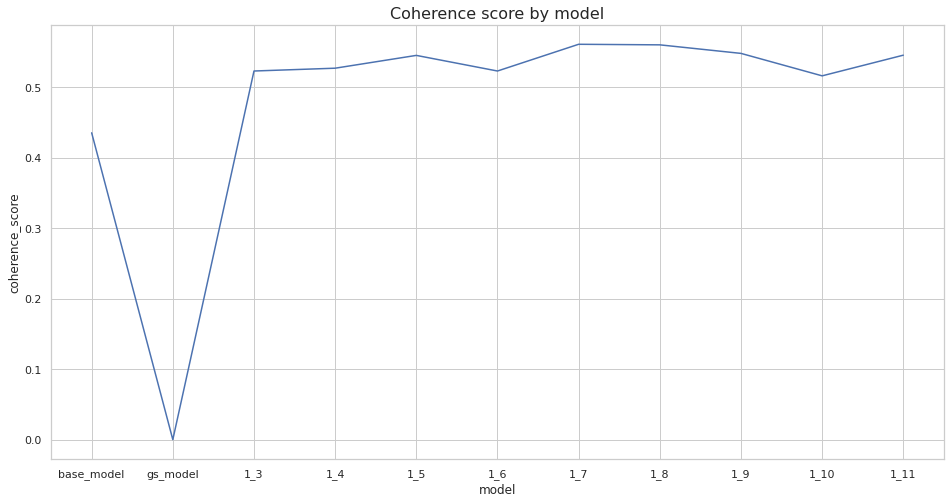

In [239]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(16, 8))

sns.set_color_codes("pastel")
ax = sns.lineplot(data = minimum_probability_track_df, x="model", y="coherence_score")

ax.set_title("Coherence score by model", fontsize=16)

#ax.set_xticklabels(ax.get_xticklabels(), size = 10, rotation=40, ha="right")

#print(len(ax.patches))
#ax.set_box_aspect(5/len(ax.patches)) #change 10 to modify the y/x axis ratio

plt.show()

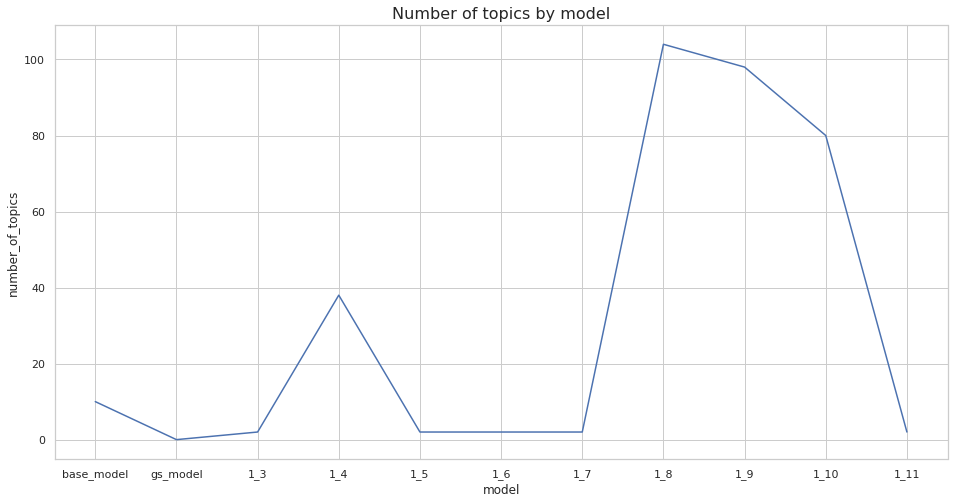

In [240]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(16, 8))

sns.set_color_codes("pastel")
ax = sns.lineplot(data = minimum_probability_track_df, x="model", y="number_of_topics")

ax.set_title("Number of topics by model", fontsize=16)

#ax.set_xticklabels(ax.get_xticklabels(), size = 10, rotation=40, ha="right")

#print(len(ax.patches))
#ax.set_box_aspect(5/len(ax.patches)) #change 10 to modify the y/x axis ratio

plt.show()

In [241]:
#Visualizing our progress
minimum_probability_fig = px.line(minimum_probability_track_df, x="model", y="coherence_score", title='Model comparison',
                    hover_name='number_of_topics')
minimum_probability_fig.show()

<h3 style="background-color:powderblue;">Saving / exporting the chosen model</h3>

In [ ]:
# Save the Model (1_4) to file in the current working directory

#Pkl_Filename = "models/Topic_mode_.pkl"

#with open(Pkl_Filename, 'wb') as file:
#    pickle.dump(df_model_1_9_iterables_num_top_sorted.topics.iloc[0], file)

In [ ]:
#type(df_model_1_4_iterables_num_top_sorted.topics.iloc[0])

In [242]:
df_model_1_4_iterables_num_top_sorted.topics.iloc[0].save('models/topic.model')

INFO - 01:47:13: LdaState lifecycle event {'fname_or_handle': 'models/topic.model.state', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2022-02-14T01:47:13.900819', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-glibc2.31', 'event': 'saving'}
INFO - 01:47:13: saved models/topic.model.state
INFO - 01:47:13: LdaMulticore lifecycle event {'fname_or_handle': 'models/topic.model', 'separately': "['expElogbeta', 'sstats']", 'sep_limit': 10485760, 'ignore': ['id2word', 'dispatcher', 'state'], 'datetime': '2022-02-14T01:47:13.906596', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-glibc2.31', 'event': 'saving'}
INFO - 01:47:13: storing np array 'expElogbeta' to models/topic.model.expElogbeta.npy
INFO - 01:47:13: not storing attribute id2wo

<h3 style="background-color:powderblue;">Loading / importing the chosen model</h3>

In [243]:
lda_model_loaded = LdaModel.load('models/topic.model')

INFO - 01:47:28: loading LdaModel object from models/topic.model
INFO - 01:47:28: loading expElogbeta from models/topic.model.expElogbeta.npy with mmap=None
INFO - 01:47:28: setting ignored attribute id2word to None
INFO - 01:47:28: setting ignored attribute dispatcher to None
INFO - 01:47:28: setting ignored attribute state to None
INFO - 01:47:28: LdaMulticore lifecycle event {'fname': 'models/topic.model', 'datetime': '2022-02-14T01:47:28.621693', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-glibc2.31', 'event': 'loaded'}
INFO - 01:47:28: loading LdaState object from models/topic.model.state
INFO - 01:47:28: LdaState lifecycle event {'fname': 'models/topic.model.state', 'datetime': '2022-02-14T01:47:28.625023', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-gli

In [244]:
type(lda_model_loaded)

gensim.models.ldamulticore.LdaMulticore

<h3 style="background-color:powderblue;">Plotting the chosen Model</h3>

In [ ]:
#lda_model_loaded_df = pd.DataFrame(lda_model_loaded,columns=['id','prob']).sort_values('prob',ascending=False)
#lda_model_loaded_df['topic'] = lda_model_loaded_df['id'].apply(lda_model_loaded_df.print_topic)
#lda_model_loaded_df

In [ ]:
## This is just plotting the topics relevance

In [247]:
pyLDAvis.enable_notebook()
gensimvis_data = gensimvis.prepare(lda_model_loaded, corpus, id2word)
gensimvis_data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
17     0.255899  0.012487       1        1  19.162486
36     0.196582  0.004501       2        1   9.035039
0     -0.078079  0.038814       3        1   8.696699
1     -0.106389  0.045557       4        1   7.835060
4     -0.117100  0.091647       5        1   5.054456
27     0.215380  0.005592       6        1   4.807799
2     -0.009820  0.020270       7        1   3.600576
3      0.041852  0.060693       8        1   3.310504
5      0.041054  0.060195       9        1   2.564333
11    -0.147827  0.053377      10        1   2.224348
8     -0.007712  0.065868      11        1   2.197742
10    -0.168737  0.055720      12        1   2.173238
6     -0.088959  0.043238      13        1   2.084546
7      0.060100 -0.002419      14        1   2.072180
14    -0.206130  0.067762      15        1   2.063153
12    -0.140991 -0.029036      16        1   1.901900
13     0.050017  0.019363      17        1   1.560993
22     0.123583  0.018307      18        1   1.552899
9     -0.004694  0.039549      19        1   1.501347
32     0.101234 -0.061860      20        1   1.428740
15     0.062160  0.065243      21        1   1.308912
19    -0.123695 -0.109584      22        1   1.021289
29    -0.168610 -0.014202      23        1   0.992685
30    -0.037486 -0.034513      24        1   0.988986
21     0.084429  0.028598      25        1   0.982381
25     0.145246 -0.012002      26        1   0.953275
28    -0.095363 -0.034414      27        1   0.919000
20     0.041217  0.017657      28        1   0.914349
18     0.098327 -0.025123      29        1   0.907859
34    -0.169361  0.027361      30        1   0.904861
16     0.009895 -0.117573      31        1   0.901823
23    -0.172280 -0.041421      32        1   0.830787
35     0.058980 -0.046672      33        1   0.740628
26     0.018753 -0.004894      34        1   0.664576
31    -0.178587 -0.196393      35        1   0.616720
33     0.110842 -0.062723      36        1   0.595744
37     0.169870 -0.001497      37        1   0.506851
24     0.136400 -0.047470      38        1   0.421234, topic_info=              Term         Freq        Total Category  logprob  loglift
76       educativo  1052.000000  1052.000000  Default  30.0000  30.0000
825       recibido   769.000000   769.000000  Default  29.0000  29.0000
599        entidad   781.000000   781.000000  Default  28.0000  28.0000
819  aplicabilidad   780.000000   780.000000  Default  27.0000  27.0000
209        recibir   795.000000   795.000000  Default  26.0000  26.0000
..             ...          ...          ...      ...      ...      ...
444      capacidad     1.319148   560.544354  Topic38  -4.8203  -0.5822
820    facilitador     1.306619   535.015333  Topic38  -4.8298  -0.5451
2      aprendizaje     1.272433   558.405909  Topic38  -4.8563  -0.6144
291      instituto     1.175359   259.231526  Topic38  -4.9357   0.0736
308    competencia     1.221057   585.343266  Topic38  -4.8975  -0.7027

[2390 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1303      3  0.354548  -----
497       3  0.428393     ..
497       4  0.085679     ..
497       5  0.085679     ..
497       7  0.085679     ..
...     ...       ...    ...
1198     23  0.448855  éxito
1209      3  0.162308   útil
1209      7  0.162308   útil
1209     14  0.324617   útil
1209     17  0.162308   útil

[6286 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[18, 37, 1, 2, 5, 28, 3, 4, 6, 12, 9, 11, 7, 8, 15, 13, 14, 23, 10, 33, 16, 20, 30, 31, 22, 26, 29, 21, 19, 35, 17, 24, 36, 27, 32, 34, 38, 25])

<h3 style="background-color:powderblue;">Testing the chosen Model</h3>

In [248]:
column_names_test = ["Answer_str_test"]
df_clean_test = pd.DataFrame(columns = column_names_test)

In [249]:
df_clean_test = df_clean_test.append({'Answer_str_test': 'Are We Teaching the Math Kids Need? Every child possesses vast mathematics potential, says Jo Boaler, Stanford University mathematics professor'}, ignore_index=True)

In [251]:
df_clean_test["processed_Answer_str_test"] = df_clean_test["Answer_str_test"].apply(cleaningCorpus.get_token_list)

In [252]:
df_clean_test['processed_Answer_str_test_tokens'] = df_clean_test["processed_Answer_str_test"].apply(cleaningCorpus.get_tokens)

In [253]:
df_clean_test

Answer_str_test  \
0  Are We Teaching the Math Kids Need? Every chil...   

                           processed_Answer_str_test  \
0  teaching math kids child possesses vast mathem...   

                    processed_Answer_str_test_tokens  
0  [teaching, math, kids, child, possesses, vast,...

In [254]:
id2word_test = Dictionary(df_clean_test['processed_Answer_str_test_tokens'])
print(len(id2word_test))

INFO - 01:49:49: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 01:49:49: built Dictionary(13 unique tokens: ['boaler', 'child', 'jo', 'kids', 'math']...) from 1 documents (total 14 corpus positions)
INFO - 01:49:49: Dictionary lifecycle event {'msg': "built Dictionary(13 unique tokens: ['boaler', 'child', 'jo', 'kids', 'math']...) from 1 documents (total 14 corpus positions)", 'datetime': '2022-02-14T01:49:49.069304', 'gensim': '4.1.2', 'python': '3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) \n[GCC 9.4.0]', 'platform': 'Linux-5.13.0-28-generic-x86_64-with-glibc2.31', 'event': 'created'}


13


In [255]:
## Filtering Extremes
##id2word_test.filter_extremes(no_below=2, no_above=.99)
##print(len(id2word_test))

In [256]:
# Creating a corpus object 
corpus_test = [id2word_test.doc2bow(d) for d in df_clean_test['processed_Answer_str_test_tokens']]

In [257]:
#corpus_test

In [258]:
#corpus_test[0]

In [259]:
lda_model_test = lda_model_loaded[corpus_test[0]]
print(type(lda_model_test))
lda_model_test

<class 'list'>


[(0, 0.79578054), (27, 0.14381889)]

In [260]:
lda_model_loaded.print_topics()

INFO - 01:50:03: topic #37 (0.011): 0.031*"educativo" + 0.031*"profesional" + 0.030*"recibir" + 0.030*"transferencia" + 0.030*"entidad" + 0.030*"capacidad" + 0.030*"técnico" + 0.030*"aplicabilidad" + 0.030*"competencia" + 0.030*"recibido"
INFO - 01:50:03: topic #36 (0.012): 0.041*"recibido" + 0.039*"facilitador" + 0.038*"técnico" + 0.038*"capacidad" + 0.038*"competencia" + 0.037*"profesional" + 0.037*"resultado" + 0.037*"metodología" + 0.037*"producción" + 0.034*"calidad"
INFO - 01:50:03: topic #35 (0.012): 0.040*"recibido" + 0.029*"tecnológico" + 0.026*"plataforma" + 0.026*"herramienta" + 0.023*"resultado" + 0.021*"aprender" + 0.020*"atención" + 0.020*"metodología" + 0.020*"acorde" + 0.020*"material"
INFO - 01:50:03: topic #34 (0.012): 0.047*"estudiante" + 0.026*"docente" + 0.021*"herramienta" + 0.018*"aprendizaje" + 0.017*"estrategia" + 0.017*"educativo" + 0.015*"modelo" + 0.015*"utilizar" + 0.014*"tecnológico" + 0.013*"desarrollo"
INFO - 01:50:03: topic #33 (0.013): 0.040*"tecnológi

[(37,
  '0.031*"educativo" + 0.031*"profesional" + 0.030*"recibir" + 0.030*"transferencia" + 0.030*"entidad" + 0.030*"capacidad" + 0.030*"técnico" + 0.030*"aplicabilidad" + 0.030*"competencia" + 0.030*"recibido"'),
 (36,
  '0.041*"recibido" + 0.039*"facilitador" + 0.038*"técnico" + 0.038*"capacidad" + 0.038*"competencia" + 0.037*"profesional" + 0.037*"resultado" + 0.037*"metodología" + 0.037*"producción" + 0.034*"calidad"'),
 (35,
  '0.040*"recibido" + 0.029*"tecnológico" + 0.026*"plataforma" + 0.026*"herramienta" + 0.023*"resultado" + 0.021*"aprender" + 0.020*"atención" + 0.020*"metodología" + 0.020*"acorde" + 0.020*"material"'),
 (34,
  '0.047*"estudiante" + 0.026*"docente" + 0.021*"herramienta" + 0.018*"aprendizaje" + 0.017*"estrategia" + 0.017*"educativo" + 0.015*"modelo" + 0.015*"utilizar" + 0.014*"tecnológico" + 0.013*"desarrollo"'),
 (33,
  '0.040*"tecnológico" + 0.040*"educativo" + 0.037*"herramienta" + 0.036*"práctica" + 0.033*"aplicabilidad" + 0.033*"entidad" + 0.033*"recibir

In [261]:
new = pd.DataFrame(lda_model_test,columns=['id','prob']).sort_values('prob',ascending=False)
new['topic'] = new['id'].apply(lda_model_loaded.print_topic)
new

id      prob                                              topic
0   0  0.795781  0.033*"aprendizaje" + 0.032*"mejorar" + 0.029*...
1  27  0.143819  0.045*"educativo" + 0.042*"práctica" + 0.042*"...

In [262]:
new['topic']

0    0.033*"aprendizaje" + 0.032*"mejorar" + 0.029*...
1    0.045*"educativo" + 0.042*"práctica" + 0.042*"...
Name: topic, dtype: object

In [ ]:
#lda_model_loaded

In [ ]:
#corpus

In [ ]:
#corpus_test

In [ ]:
#id2word

In [ ]:
#id2word_test

In [ ]:
#base_model

In [ ]:
#lda_model_loaded

In [ ]:
#np.sum(lda_model_loaded.transform(docu_term_matrix),axis=1)

In [ ]:
##Creating Topic Distance Visualization 
##gensimvis_data = gensimvis.prepare(lda_model_loaded, corpus_test, id2word_test)
##gensimvis_data